In [1]:
import ROOT as rt
import array as arr
import math

from strangehelper import get_parabola, make_mixed_corrections

Welcome to JupyROOT 6.24/06


In [47]:

rt.gStyle.SetOptStat(0)

In [2]:
# epsilon used to avoid bin edge nightmares (if you pick a value that lies on bin edge, it defaults to right bin)
EPSILON = 0.00001

In [3]:
# UE line method
USE_AVG_4 = 0
USE_AVG_6 = 1
USE_ZYAM = 0
USE_NONEG = 0
assert sum([USE_AVG_4, USE_AVG_6, USE_ZYAM, USE_NONEG]) == 1, "Only select 1 method for UE line please"

In [4]:
DELTA_ETA_MAX = 1.4 - EPSILON

In [5]:
TRIG_PT_LOW = 4
TRIG_PT_HIGH = 8 - EPSILON
ASSOC_PT_LOW = 2 
ASSOC_PT_HIGH = 4 - EPSILON

In [6]:
SIG_MIN = 1.102 
SIG_MAX = 1.128 - EPSILON

In [48]:
c = rt.TCanvas("main_canvas", "Main Canvas", 55, 55, 800, 600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: main_canvas


# 0-20 setup

In [10]:
input_file_0_20 = rt.TFile("~/OneDrive/Research/Output/lambda-over-hadron/data/v0_cent_0_20_fullstat.root")
input_list_0_20 = input_file_0_20.Get("h-lambda")
input_file_0_20.Close()

In [11]:
trig_dist_0_20 = input_list_0_20.FindObject("fTriggerDistEff")
lambda_dist_0_20 = input_list_0_20.FindObject("fTriggeredLambdaDist")

In [12]:
trig_dist_0_20_highest_pt = input_list_0_20.FindObject("fTriggerDistEff_highestPt")

In [13]:
h_h_0_20 = input_list_0_20.FindObject("fDphiHHEff")
h_h_mixed_0_20 = input_list_0_20.FindObject("fDphiHHMixed")

In [14]:
h_h_0_20_highest_pt = input_list_0_20.FindObject("fDphiHHEff_highestPt")
h_h_mixed_0_20_highest_pt = input_list_0_20.FindObject("fDphiHHMixed_highestPt")

In [15]:
h_lambda_0_20 = input_list_0_20.FindObject("fDphiHLambdaEff")
h_lambda_mixed_0_20 = input_list_0_20.FindObject("fDphiHLambdaMixed")

In [16]:
h_lambda_mixed_0_20_highest_pt = input_list_0_20.FindObject("fDphiHLambdaMixed_highestPt")
h_lambda_0_20_highest_pt = input_list_0_20.FindObject("fDphiHLambdaEff_highestPt")

In [17]:
# Setting the trigger Pt (this is never changed again)
trig_dist_0_20.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
trig_dist_0_20_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_0_20.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_0_20_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_mixed_0_20.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_mixed_0_20_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_0_20.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_0_20_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_mixed_0_20.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_mixed_0_20_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)

In [18]:
# Setting the associated Pt (this is never changed again)
lambda_dist_0_20.GetAxis(0).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_0_20.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_0_20_highest_pt.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_mixed_0_20.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_mixed_0_20_highest_pt.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_0_20.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_0_20_highest_pt.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_mixed_0_20.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_mixed_0_20_highest_pt.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)

In [19]:
trig_pt_dist_0_20 = trig_dist_0_20.Projection(0).Clone("trig_pt_dist_0_20")
trig_phi_dist_0_20 = trig_dist_0_20.Projection(1).Clone("trig_phi_dist_0_20")
trig_eta_dist_0_20 = trig_dist_0_20.Projection(2).Clone("trig_eta_dist_0_20")
trig_2d_dist_0_20 = trig_dist_0_20.Projection(0, 3).Clone("trig_2d_dist_0_20")

trig_pt_dist_0_20.SetTitle("Trigger #font[12]{p}_{T} Distribution (red: all, blue: highest)")
trig_pt_dist_0_20.Sumw2()
trig_pt_dist_0_20.SetLineColor(rt.kRed)

trig_phi_dist_0_20.SetTitle("Trigger #varphi Distribution (Hybrid GCG)")
trig_phi_dist_0_20.Sumw2()
trig_phi_dist_0_20.SetLineColor(rt.kRed)

trig_eta_dist_0_20.SetTitle("Trigger #eta Distribution (Hybrid GCG)")
trig_eta_dist_0_20.Sumw2()
trig_eta_dist_0_20.SetLineColor(rt.kRed)

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [20]:
trig_pt_dist_0_20_highest_pt = trig_dist_0_20_highest_pt.Projection(0).Clone("trig_pt_dist_0_20_highest_pt")
trig_phi_dist_0_20_highest_pt = trig_dist_0_20_highest_pt.Projection(1).Clone("trig_phi_dist_0_20_highest_pt")
trig_eta_dist_0_20_highest_pt = trig_dist_0_20_highest_pt.Projection(2).Clone("trig_eta_dist_0_20_highest_pt")
trig_2d_dist_0_20_highest_pt = trig_dist_0_20_highest_pt.Projection(0, 3).Clone("trig_2d_dist_0_20_highest_pt")

trig_pt_dist_0_20_highest_pt.SetTitle("Trigger #font[12]{p}_{T} Distribution (red: all, blue: highest)")
trig_pt_dist_0_20_highest_pt.Sumw2()
trig_pt_dist_0_20_highest_pt.SetLineColor(rt.kRed)

trig_phi_dist_0_20_highest_pt.SetTitle("Trigger #varphi Distribution (Hybrid GCG)")
trig_phi_dist_0_20_highest_pt.Sumw2()
trig_phi_dist_0_20_highest_pt.SetLineColor(rt.kRed)

trig_eta_dist_0_20_highest_pt.SetTitle("Trigger #eta Distribution (Hybrid GCG)")
trig_eta_dist_0_20_highest_pt.Sumw2()
trig_eta_dist_0_20_highest_pt.SetLineColor(rt.kRed)

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [21]:
num_trigs_0_20 = trig_2d_dist_0_20.Integral()
num_trigs_0_20_highest_pt = trig_2d_dist_0_20_highest_pt.Integral()

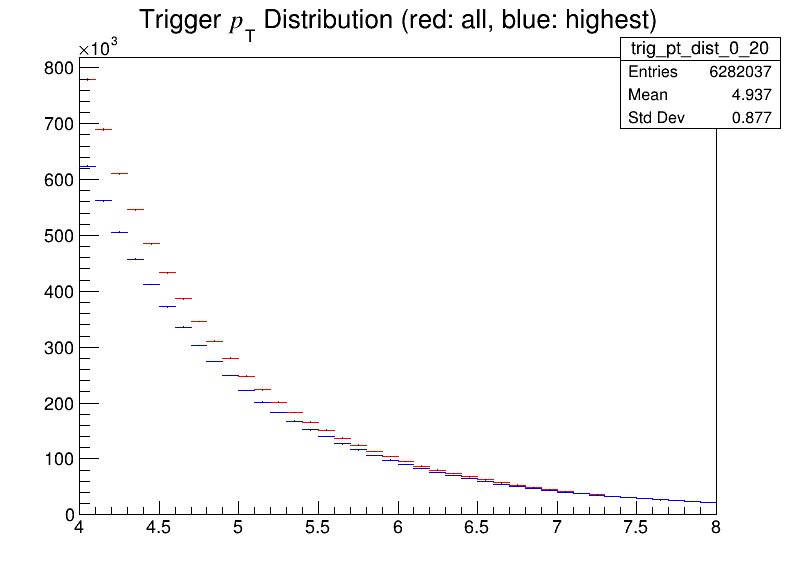

In [22]:
trig_pt_dist_0_20.Draw()
trig_pt_dist_0_20_highest_pt.SetLineColor(rt.kBlue)
trig_pt_dist_0_20_highest_pt.Draw("SAME")
c.Draw()

In [23]:
trig_pt_dist_0_20.Scale(1/num_trigs_0_20)
trig_pt_dist_0_20_highest_pt.Scale(1/num_trigs_0_20_highest_pt)

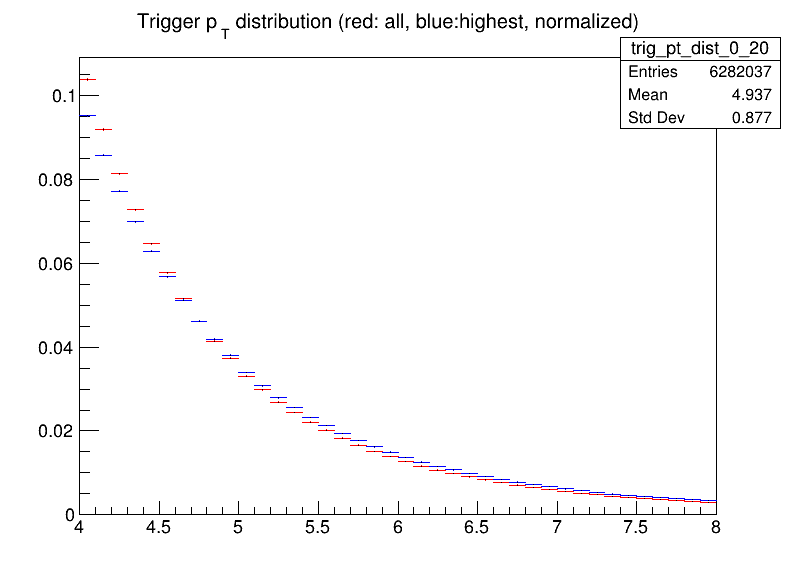

In [24]:
trig_pt_dist_0_20.SetTitle("Trigger p_{T} distribution (red: all, blue:highest, normalized)")
trig_pt_dist_0_20.Draw()
trig_pt_dist_0_20_highest_pt.SetLineColor(rt.kBlue)
trig_pt_dist_0_20_highest_pt.Draw("SAME")
c.Draw()

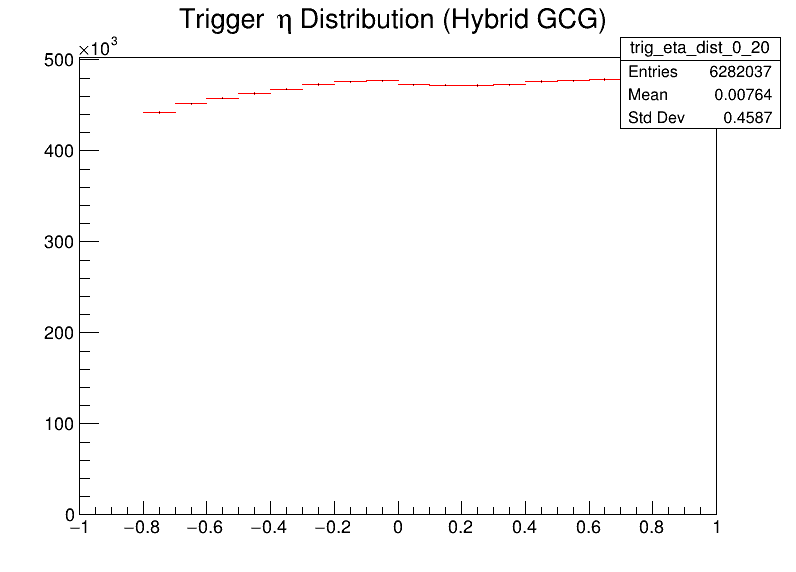

In [25]:
trig_eta_dist_0_20.Draw()
c.Draw()

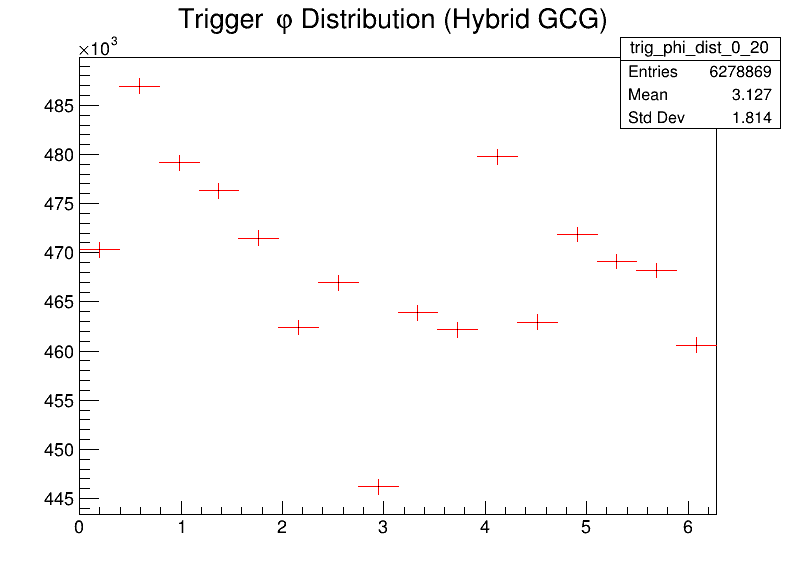

In [26]:
trig_phi_dist_0_20.Draw()
c.Draw()

### Signal analysis section

In [31]:
# eta cuts first
lambda_dist_0_20.GetAxis(2).SetRangeUser(-0.8, 0.8)
lambda_mass_dist_0_20 = lambda_dist_0_20.Projection(3).Clone("lambda_mass_dist_0_20")

Warning in <TROOT::Append>: Replacing existing TH1: fTriggeredLambdaDist_proj_3 (Potential memory leak).


Warning in <TROOT::Append>: Replacing existing TH1: fTriggeredLambdaDist_proj_0 (Potential memory leak).


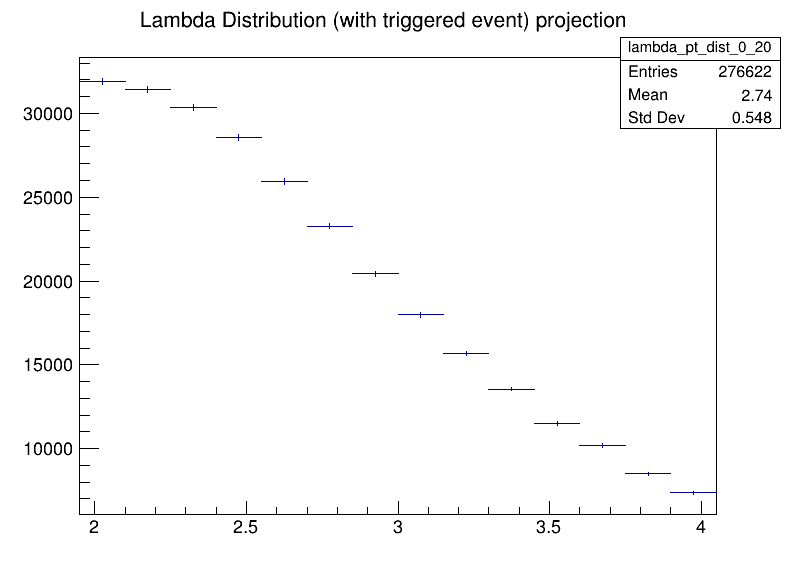

In [32]:
lambda_pt_dist_0_20 = lambda_dist_0_20.Projection(0).Clone("lambda_pt_dist_0_20")
lambda_pt_dist_0_20.Draw()
c.Draw()

In [33]:
lambda_mass_dist_0_20.SetTitle("#Lambda^{0} invariant mass distribution (p-#pi)")
lambda_mass_dist_0_20.Sumw2()
lambda_mass_dist_0_20.SetLineWidth(2)
lambda_mass_dist_0_20.GetXaxis().SetTitle("Mass (GeV/c^{2})")
lambda_mass_dist_0_20.GetYaxis().SetTitle("#frac{dN_{p-#pi}}{dM}")

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


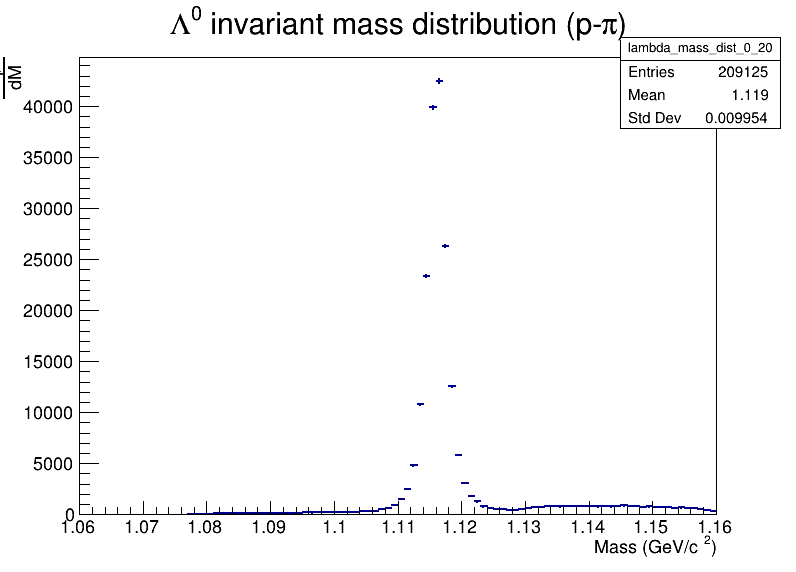

In [34]:
lambda_mass_dist_0_20.Draw()
c.Draw()

In [35]:
bin_1 = lambda_mass_dist_0_20.FindBin(1.09)
bin_2 = lambda_mass_dist_0_20.FindBin(1.15)
bin_3 = lambda_mass_dist_0_20.FindBin(1.16 - EPSILON)
point_one = [1.09, lambda_mass_dist_0_20.GetBinContent(bin_1)]
point_two = [1.15, lambda_mass_dist_0_20.GetBinContent(bin_2)]
point_three = [1.16, lambda_mass_dist_0_20.GetBinContent(bin_3)]
bg_starting_params_0_20 = get_parabola(point_one, point_two, point_three)

In [36]:
lambda_mass_fit_0_20 = rt.TF1("lambda_mass_fit_0_20", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol2(4)", 1.09, 1.155)
lambda_mass_fit_0_20.SetNpx(1000)
lambda_mass_fit_0_20.SetParameter(0, 1.36753e01)
lambda_mass_fit_0_20.FixParameter(1, 1.1162)
lambda_mass_fit_0_20.SetParameter(2, 1.00576e-05 )
lambda_mass_fit_0_20.SetParameter(3, 6.04166e-03)
lambda_mass_fit_0_20.SetParameter(4, bg_starting_params_0_20[0])
lambda_mass_fit_0_20.SetParameter(5, bg_starting_params_0_20[1])
lambda_mass_fit_0_20.SetParameter(6, bg_starting_params_0_20[2])

 FCN=2384.91 FROM MIGRAD    STATUS=CONVERGED     531 CALLS         532 TOTAL
                     EDM=1.74431e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.81638e+02   5.31939e-01  -4.68665e-03   1.53775e-03
   2  p1           1.11620e+00     fixed    
   3  p2           1.23817e-03   9.45958e-06   2.29114e-08   1.07801e+01
   4  p3           1.11485e-03   1.92801e-05  -4.69567e-08   5.06919e-01
   5  p4           2.41687e+05   1.52216e+04  -3.50829e+01   3.45425e-05
   6  p5          -4.43054e+05   2.72072e+04   6.27606e+01   3.85874e-05
   7  p6           2.03118e+05   1.21519e+04  -2.80435e+01   4.31373e-05


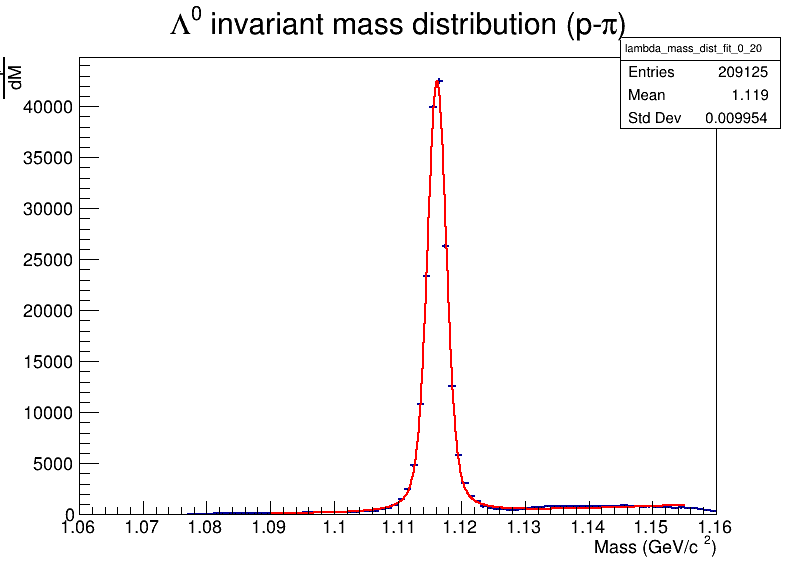

In [37]:
lambda_mass_dist_fit_0_20 = lambda_mass_dist_0_20.Clone("lambda_mass_dist_fit_0_20")
lambda_mass_dist_fit_0_20.Fit(lambda_mass_fit_0_20, "RS")
lambda_mass_dist_fit_0_20.Draw()
c.Draw()

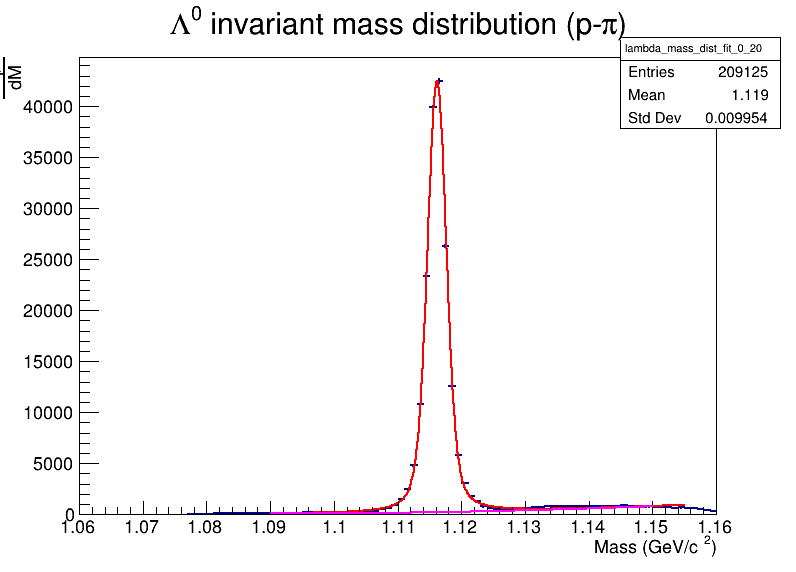

In [38]:
bg_fit_0_20 = rt.TF1("bg_fit_0_20", "pol2", 1.09, 1.15)
bg_fit_0_20.SetParameter(0, lambda_mass_fit_0_20.GetParameter(4))
bg_fit_0_20.SetParameter(1, lambda_mass_fit_0_20.GetParameter(5))
bg_fit_0_20.SetParameter(2, lambda_mass_fit_0_20.GetParameter(6))
bg_fit_0_20.SetNpx(1000)
bg_fit_0_20.SetLineColor(rt.kMagenta)
lambda_mass_dist_fit_0_20.Draw()
bg_fit_0_20.Draw("SAME")
c.Draw()

In [39]:
left_signal_bin_0_20 = lambda_mass_dist_fit_0_20.FindBin(SIG_MIN)
right_signal_bin_0_20 = lambda_mass_dist_fit_0_20.FindBin(SIG_MAX)

lambda_bg_0_20 = 0
lambda_total_0_20 = 0
for bin_num in range(left_signal_bin_0_20, right_signal_bin_0_20 + 1):
    bin_center = lambda_mass_dist_fit_0_20.GetBinCenter(bin_num)
    lambda_bg_0_20 += bg_fit_0_20.Eval(bin_center)
    lambda_total_0_20 += lambda_mass_dist_fit_0_20.GetBinContent(bin_num)

lambda_signal_0_20 = lambda_total_0_20 - lambda_bg_0_20
lambda_signal_total_ratio_0_20 = lambda_signal_0_20/lambda_total_0_20
lambda_signal_bg_ratio_0_20 = lambda_signal_0_20/lambda_bg_0_20
print(f"The 0-20 lambda signal is: {lambda_signal_0_20}")
print(f"The 0-20 lambda background is: {lambda_bg_0_20}")
print(f"The 0-20 lambda S/B is: {lambda_signal_bg_ratio_0_20}")
print(f"The 0-20 lambda S/T is: {lambda_signal_total_ratio_0_20}")
print(f"The 0-20 lambda significance is: {lambda_signal_0_20/math.sqrt(lambda_signal_0_20 + lambda_bg_0_20)}")

The 0-20 lambda signal is: 177167.80889834036
The 0-20 lambda background is: 5574.191101659642
The 0-20 lambda S/B is: 31.78359077886493
The 0-20 lambda S/T is: 0.9694969350140655
The 0-20 lambda significance is: 414.44378112127424


### Mixed event correction section

In [40]:
axes = arr.array('i', [2, 3, 4, 5])
h_lambda_0_20 = h_lambda_0_20.Projection(4, axes)
h_lambda_0_20_highest_pt = h_lambda_0_20_highest_pt.Projection(4, axes)
h_lambda_mixed_0_20 = h_lambda_mixed_0_20.Projection(4, axes)
h_lambda_mixed_0_20_highest_pt = h_lambda_mixed_0_20_highest_pt.Projection(4, axes)

In [41]:
h_h_0_20 = h_h_0_20.Projection(2, 3, 4)
h_h_0_20_highest_pt = h_h_0_20_highest_pt.Projection(2, 3, 4)
h_h_mixed_0_20 = h_h_mixed_0_20.Projection(2, 3, 4)
h_h_mixed_0_20_highest_pt = h_h_mixed_0_20_highest_pt.Projection(2, 3, 4)

In [42]:
# Setting up 2-d correlation plots before the mixed event correction
h_lambda_2d_nomixcor_0_20 = h_lambda_0_20.Projection(0, 1).Clone("h_lambda_2d_nomixcor_0_20")
h_lambda_2d_nomixcor_0_20_highest_pt = h_lambda_0_20_highest_pt.Projection(0, 1).Clone("h_lambda_2d_nomixcor_0_20_highest_pt")
h_lambda_mixed_2d_0_20 = h_lambda_mixed_0_20.Projection(0, 1).Clone("h_lambda_mixed_2d_0_20")
h_lambda_mixed_2d_0_20_highest_pt = h_lambda_mixed_0_20_highest_pt.Projection(0, 1).Clone("h_lambda_mixed_2d_0_20_highest_pt")

In [43]:
h_h_2d_nomixcor_0_20 = h_h_0_20_highest_pt.Project3D("xye").Clone("h_h_2d_nomixcor_0_20")
h_h_2d_nomixcor_0_20_highest_pt = h_h_0_20_highest_pt.Project3D("xye").Clone("h_h_2d_nomixcor_0_20_highest_pt")
h_h_mixed_2d_0_20 = h_h_mixed_0_20.Project3D("xye").Clone("h_h_mixed_2d_0_20")
h_h_mixed_2d_0_20_highest_pt = h_h_mixed_0_20_highest_pt.Project3D("xye").Clone("h_h_mixed_2d_0_20_highest_pt")

In [57]:
h_lambda_2d_nomixcor_0_20.SetTitle("")
h_lambda_2d_nomixcor_0_20.GetYaxis().SetTitle("#Delta#varphi_{h-(p#pi)}")
h_lambda_2d_nomixcor_0_20.GetXaxis().SetTitle("#Delta#eta_{h-(p#pi)}")
h_lambda_2d_nomixcor_0_20.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_0_20.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_nomixcor_0_20.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_0_20.GetYaxis().SetTitleOffset(1.3)

h_lambda_mixed_2d_0_20.SetTitle("")
h_lambda_mixed_2d_0_20.GetYaxis().SetTitle("#Delta#varphi_{h-(p#pi)}")
h_lambda_mixed_2d_0_20.GetXaxis().SetTitle("#Delta#eta_{h-(p#pi)}")
h_lambda_mixed_2d_0_20.GetXaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_0_20.GetXaxis().SetTitleOffset(1.3)
h_lambda_mixed_2d_0_20.GetYaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_0_20.GetYaxis().SetTitleOffset(1.3)

h_lambda_2d_nomixcor_0_20_highest_pt.SetTitle("")
h_lambda_2d_nomixcor_0_20_highest_pt.GetYaxis().SetTitle("#Delta#varphi_{h-(p#pi)}")
h_lambda_2d_nomixcor_0_20_highest_pt.GetXaxis().SetTitle("#Delta#eta_{h-(p#pi)}")
h_lambda_2d_nomixcor_0_20_highest_pt.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_0_20_highest_pt.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_nomixcor_0_20_highest_pt.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_0_20_highest_pt.GetYaxis().SetTitleOffset(1.3)

h_lambda_mixed_2d_0_20_highest_pt.SetTitle("")
h_lambda_mixed_2d_0_20_highest_pt.GetYaxis().SetTitle("#Delta#varphi_{h-(p#pi)}")
h_lambda_mixed_2d_0_20_highest_pt.GetXaxis().SetTitle("#Delta#eta_{h-(p#pi)}")
h_lambda_mixed_2d_0_20_highest_pt.GetXaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_0_20_highest_pt.GetXaxis().SetTitleOffset(1.3)
h_lambda_mixed_2d_0_20_highest_pt.GetYaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_0_20_highest_pt.GetYaxis().SetTitleOffset(1.3)

In [51]:
h_h_2d_nomixcor_0_20.SetTitle("")
h_h_2d_nomixcor_0_20.GetYaxis().SetTitle("#Delta#varphi_{h-h}")
h_h_2d_nomixcor_0_20.GetXaxis().SetTitle("#Delta#eta_{h-h}")
h_h_2d_nomixcor_0_20.GetXaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_0_20.GetXaxis().SetTitleOffset(1.3)
h_h_2d_nomixcor_0_20.GetYaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_0_20.GetYaxis().SetTitleOffset(1.3)

h_h_mixed_2d_0_20.SetTitle("")
h_h_mixed_2d_0_20.GetYaxis().SetTitle("#Delta#varphi_{h-h}")
h_h_mixed_2d_0_20.GetXaxis().SetTitle("#Delta#eta_{h-h}")
h_h_mixed_2d_0_20.GetXaxis().SetTitleSize(0.05)
h_h_mixed_2d_0_20.GetXaxis().SetTitleOffset(1.3)
h_h_mixed_2d_0_20.GetYaxis().SetTitleSize(0.05)
h_h_mixed_2d_0_20.GetYaxis().SetTitleOffset(1.3)

h_h_2d_nomixcor_0_20_highest_pt.SetTitle("")
h_h_2d_nomixcor_0_20_highest_pt.GetYaxis().SetTitle("#Delta#varphi_{h-h}")
h_h_2d_nomixcor_0_20_highest_pt.GetXaxis().SetTitle("#Delta#eta_{h-h}")
h_h_2d_nomixcor_0_20_highest_pt.GetXaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_0_20_highest_pt.GetXaxis().SetTitleOffset(1.3)
h_h_2d_nomixcor_0_20_highest_pt.GetYaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_0_20_highest_pt.GetYaxis().SetTitleOffset(1.3)

h_h_mixed_2d_0_20_highest_pt.SetTitle("")
h_h_mixed_2d_0_20_highest_pt.GetYaxis().SetTitle("#Delta#varphi_{h-h}")
h_h_mixed_2d_0_20_highest_pt.GetXaxis().SetTitle("#Delta#eta_{h-h}")
h_h_mixed_2d_0_20_highest_pt.GetXaxis().SetTitleSize(0.05)
h_h_mixed_2d_0_20_highest_pt.GetXaxis().SetTitleOffset(1.3)
h_h_mixed_2d_0_20_highest_pt.GetYaxis().SetTitleSize(0.05)
h_h_mixed_2d_0_20_highest_pt.GetYaxis().SetTitleOffset(1.3)

Info in <TCanvas::Print>: pdf file figures/h_lambda_2d_nomixcor_0_20.pdf has been created


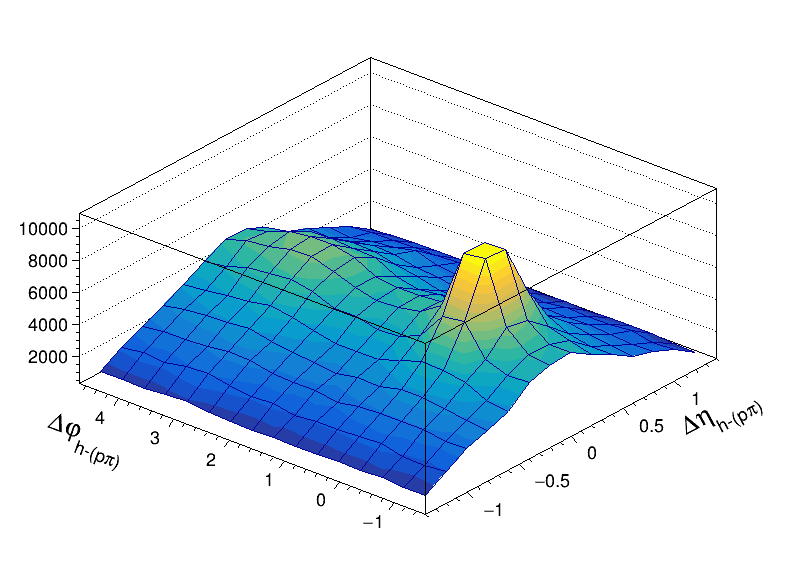

In [58]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_nomixcor_0_20.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_2d_nomixcor_0_20.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_lambda_2d_nomixcor_0_20.pdf")

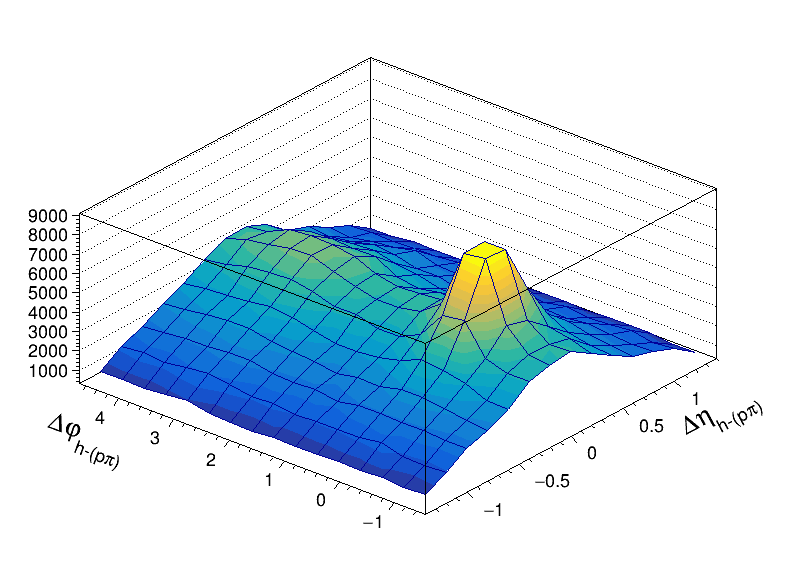

In [59]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_nomixcor_0_20_highest_pt.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_2d_nomixcor_0_20_highest_pt.Draw("SURF1")
c.Draw()

Info in <TCanvas::Print>: pdf file figures/h_lambda_2d_mixed_0_20.pdf has been created


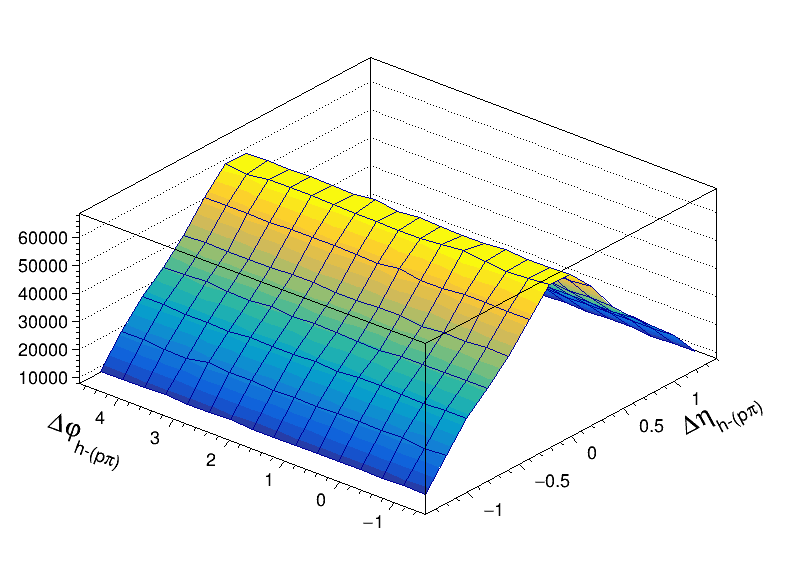

In [60]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_mixed_2d_0_20.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_mixed_2d_0_20.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_lambda_2d_mixed_0_20.pdf")

Info in <TCanvas::Print>: pdf file figures/h_h_2d_nomixcor_0_20.pdf has been created


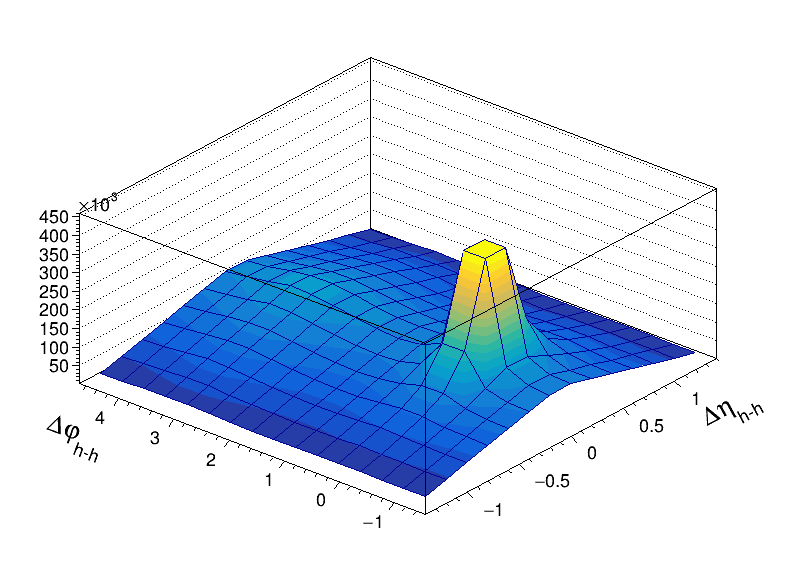

In [61]:
c.SetTheta(50)
c.SetPhi(50)
h_h_2d_nomixcor_0_20.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_2d_nomixcor_0_20.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_h_2d_nomixcor_0_20.pdf")

Info in <TCanvas::Print>: pdf file figures/h_h_2d_mixed_0_20.pdf has been created


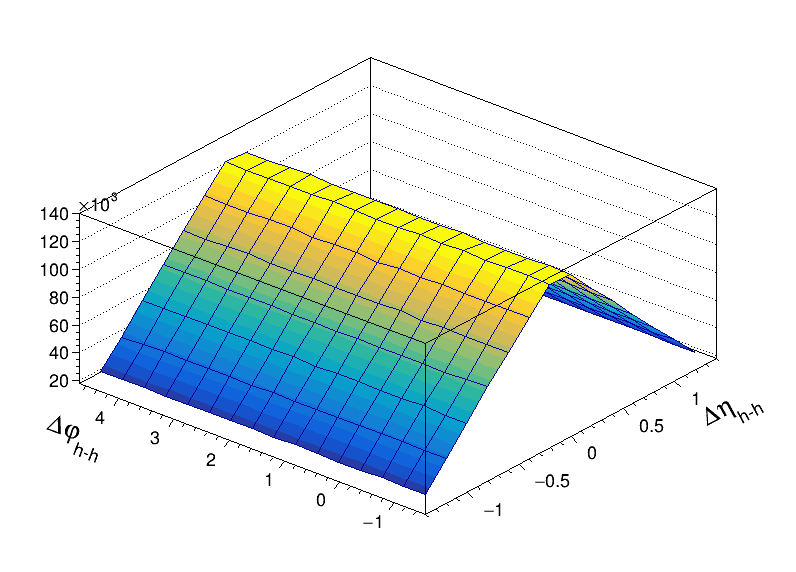

In [62]:
c.SetTheta(50)
c.SetPhi(50)
h_h_mixed_2d_0_20.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_mixed_2d_0_20.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_h_2d_mixed_0_20.pdf")

In [63]:
h_lambda_2d_mixcor_sig_0_20 = make_mixed_corrections(h_lambda_0_20, h_lambda_mixed_0_20, SIG_MIN, SIG_MAX)

Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created


In [64]:
h_lambda_2d_mixcor_sig_0_20_highest_pt = make_mixed_corrections(h_lambda_0_20_highest_pt, h_lambda_mixed_0_20_highest_pt, SIG_MIN, SIG_MAX)

Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created


In [65]:
h_h_2d_mixcor_0_20 = make_mixed_corrections(h_h_0_20, h_h_mixed_0_20, SIG_MIN, SIG_MAX, is_hh=True)
h_h_2d_mixcor_0_20_highest_pt = make_mixed_corrections(h_h_0_20_highest_pt, h_h_mixed_0_20_highest_pt, SIG_MIN, SIG_MAX, is_hh=True)

Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created


In [66]:
h_lambda_2d_mixcor_sig_0_20.SetTitle("")
h_lambda_2d_mixcor_sig_0_20.GetYaxis().SetTitle("#Delta#varphi_{h-(p#pi)}")
h_lambda_2d_mixcor_sig_0_20.GetXaxis().SetTitle("#Delta#eta_{h-(p#pi)}")
h_lambda_2d_mixcor_sig_0_20.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_mixcor_sig_0_20.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_mixcor_sig_0_20.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_mixcor_sig_0_20.GetYaxis().SetTitleOffset(1.3)

In [67]:
h_h_2d_mixcor_0_20.SetTitle("")
h_h_2d_mixcor_0_20.GetYaxis().SetTitle("#Delta#varphi_{h-h}")
h_h_2d_mixcor_0_20.GetXaxis().SetTitle("#Delta#eta_{h-h}")
h_h_2d_mixcor_0_20.GetXaxis().SetTitleSize(0.05)
h_h_2d_mixcor_0_20.GetXaxis().SetTitleOffset(1.3)
h_h_2d_mixcor_0_20.GetYaxis().SetTitleSize(0.05)
h_h_2d_mixcor_0_20.GetYaxis().SetTitleOffset(1.3)

Info in <TCanvas::Print>: pdf file figures/h_lambda_2d_mixcor_0_20.pdf has been created


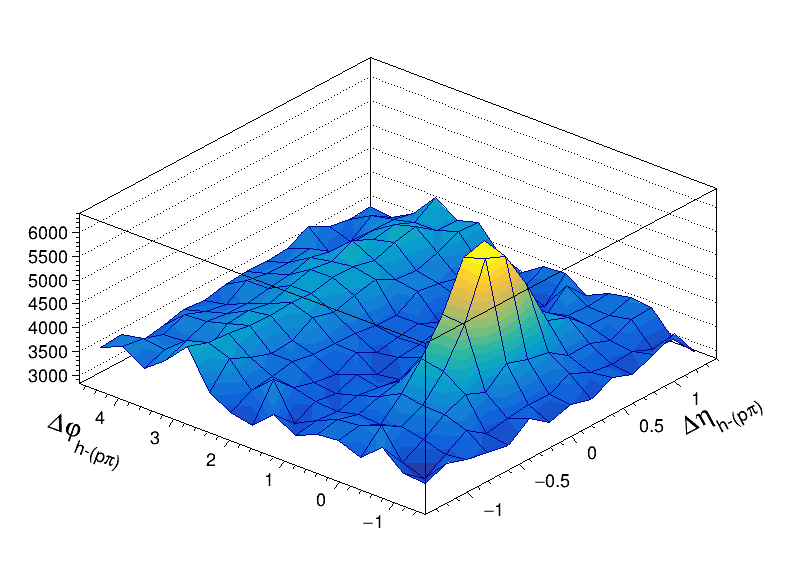

In [68]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_mixcor_sig_0_20.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_2d_mixcor_sig_0_20.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_lambda_2d_mixcor_0_20.pdf")

Info in <TCanvas::Print>: pdf file figures/h_h_2d_mixcor_0_20.pdf has been created


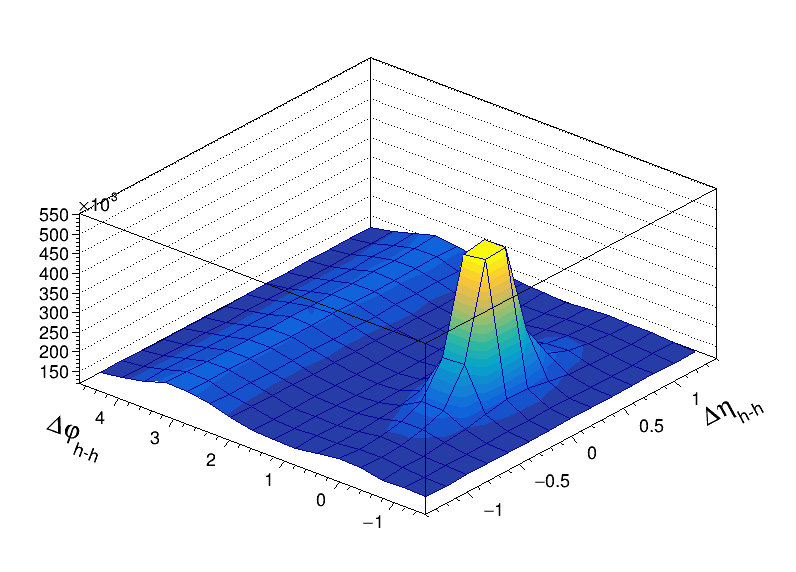

In [69]:
c.SetTheta(50)
c.SetPhi(50)
h_h_2d_mixcor_0_20.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_2d_mixcor_0_20.Draw("SURF1")
c.Draw()
c.SaveAs("figures/h_h_2d_mixcor_0_20.pdf")

In [223]:
h_lambda_2d_mixcor_sig_0_20_highest_pt.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_2d_mixcor_0_20_highest_pt.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)

In [224]:
# per-trigger normalization done here
h_lambda_2d_mixcor_sig_0_20.Scale(1.0/num_trigs_0_20)
h_lambda_2d_mixcor_sig_0_20_highest_pt.Scale(1.0/num_trigs_0_20_highest_pt)
h_h_2d_mixcor_0_20.Scale(1.0/num_trigs_0_20)
h_h_2d_mixcor_0_20_highest_pt.Scale(1.0/num_trigs_0_20_highest_pt)

In [225]:
h_lambda_2d_subtracted_0_20 = h_lambda_2d_mixcor_sig_0_20
h_lambda_2d_subtracted_0_20_highest_pt = h_lambda_2d_mixcor_sig_0_20_highest_pt

### Integral and ratio section

In [226]:
h_lambda_dphi_subtracted_0_20 = h_lambda_2d_subtracted_0_20.ProjectionY("h_lambda_dphi_subtracted_0_20")
h_lambda_dphi_subtracted_0_20.SetTitle("h-#Lambda^{0} #Delta#varphi distribution (0 - 20 multiplicty bin)")
h_lambda_dphi_subtracted_0_20.SetLineColor(rt.kViolet - 6)
h_lambda_dphi_subtracted_0_20.SetLineWidth(3)
h_lambda_dphi_subtracted_0_20.GetYaxis().SetTitle("#frac{dN_{h-#Lambda^{0}}}{d#Delta#varphi}")
h_lambda_dphi_subtracted_0_20.GetXaxis().SetTitleSize(0.05)
h_lambda_dphi_subtracted_0_20.GetXaxis().SetTitleOffset(0.5)

In [227]:
h_lambda_dphi_subtracted_0_20_highest_pt = h_lambda_2d_subtracted_0_20_highest_pt.ProjectionY("h_lambda_dphi_subtracted_0_20_highest_pt")
h_lambda_dphi_subtracted_0_20_highest_pt.SetTitle("h-#Lambda^{0} #Delta#varphi distribution (0 - 20 multiplicty bin)")
h_lambda_dphi_subtracted_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
h_lambda_dphi_subtracted_0_20_highest_pt.SetLineWidth(3)
h_lambda_dphi_subtracted_0_20_highest_pt.GetYaxis().SetTitle("#frac{dN_{h-#Lambda^{0}}}{d#Delta#varphi}")
h_lambda_dphi_subtracted_0_20_highest_pt.GetXaxis().SetTitleSize(0.05)
h_lambda_dphi_subtracted_0_20_highest_pt.GetXaxis().SetTitleOffset(0.5)

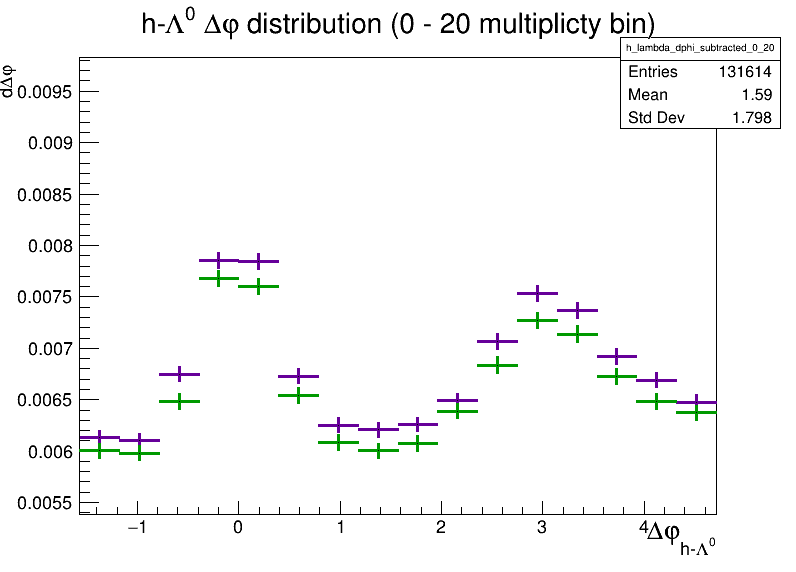

In [228]:
h_lambda_dphi_subtracted_0_20.GetYaxis().SetRangeUser(h_lambda_dphi_subtracted_0_20_highest_pt.GetMinimum()*0.9, 
                                                      h_lambda_dphi_subtracted_0_20.GetMaximum()*1.10)
h_lambda_dphi_subtracted_0_20.Draw()
h_lambda_dphi_subtracted_0_20_highest_pt.SetLineColor(rt.kGreen + 2)
h_lambda_dphi_subtracted_0_20_highest_pt.Draw("SAME")
c.Draw()

In [229]:
if USE_AVG_4:
    ue_line_0_20 = rt.TF1("ue_line_0_20", "pol0", -2, 6)
    ue_upper_line_0_20 = rt.TF1("ue_upper_line_0_20", "pol0", -2, 6)
    ue_lower_line_0_20 = rt.TF1("ue_lower_line_0_20", "pol0", -2, 6)
    zero_line_0_20 = rt.TF1("zero_line_0_20", "pol0", -2, 6)
    zero_upper_line_0_20 = rt.TF1("zero_upper_line_0_20", "pol0", -2, 6)
    zero_lower_line_0_20 = rt.TF1("zero_lower_line_0_20", "pol0", -2, 6)
    ue_avg_0_20 = (h_lambda_dphi_subtracted_0_20.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_0_20.GetBinContent(8)
                   + h_lambda_dphi_subtracted_0_20.GetBinContent(9)
                   + h_lambda_dphi_subtracted_0_20.GetBinContent(16))/4

    ue_avg_error_0_20 = (1/4)*(math.sqrt(h_lambda_dphi_subtracted_0_20.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_0_20.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_0_20.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_0_20.GetBinError(16)**2))


    ue_line_0_20.SetParameter(0, ue_avg_0_20)
    ue_line_0_20.SetLineColor(rt.kViolet - 6)
    ue_line_0_20.SetLineWidth(3)
    ue_line_0_20.SetLineStyle(rt.kSolid)

    ue_upper_line_0_20.SetParameter(0, ue_avg_0_20 + ue_avg_error_0_20)
    ue_upper_line_0_20.SetLineColor(rt.kViolet - 6)
    ue_upper_line_0_20.SetLineStyle(rt.kDashed)

    ue_lower_line_0_20.SetParameter(0, ue_avg_0_20 - ue_avg_error_0_20)
    ue_lower_line_0_20.SetLineColor(rt.kViolet - 6)
    ue_lower_line_0_20.SetLineStyle(rt.kDashed)

    zero_line_0_20.SetParameter(0, 0)
    zero_line_0_20.SetLineColor(rt.kViolet - 6)
    zero_line_0_20.SetLineWidth(3)
    zero_line_0_20.SetLineStyle(rt.kSolid)
    zero_upper_line_0_20.SetParameter(0, ue_avg_error_0_20)
    zero_upper_line_0_20.SetLineColor(rt.kViolet - 6)
    zero_upper_line_0_20.SetLineStyle(rt.kDashed)
    zero_lower_line_0_20.SetParameter(0, -ue_avg_error_0_20)
    zero_lower_line_0_20.SetLineColor(rt.kViolet - 6)
    zero_lower_line_0_20.SetLineStyle(rt.kDashed)

elif USE_AVG_6:
    ue_line_0_20 = rt.TF1("ue_line_0_20", "pol0", -2, 6)
    ue_upper_line_0_20 = rt.TF1("ue_upper_line_0_20", "pol0", -2, 6)
    ue_lower_line_0_20 = rt.TF1("ue_lower_line_0_20", "pol0", -2, 6)
    zero_line_0_20 = rt.TF1("zero_line_0_20", "pol0", -2, 6)
    zero_upper_line_0_20 = rt.TF1("zero_upper_line_0_20", "pol0", -2, 6)
    zero_lower_line_0_20 = rt.TF1("zero_lower_line_0_20", "pol0", -2, 6)
    ue_avg_0_20 = (h_lambda_dphi_subtracted_0_20.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_0_20.GetBinContent(2)
                   + h_lambda_dphi_subtracted_0_20.GetBinContent(7)
                   + h_lambda_dphi_subtracted_0_20.GetBinContent(8)
                   + h_lambda_dphi_subtracted_0_20.GetBinContent(9)
                   + h_lambda_dphi_subtracted_0_20.GetBinContent(16))/6

    ue_avg_error_0_20 = (1/6)*(math.sqrt(h_lambda_dphi_subtracted_0_20.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_0_20.GetBinError(2)**2
                   + h_lambda_dphi_subtracted_0_20.GetBinError(7)**2
                   + h_lambda_dphi_subtracted_0_20.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_0_20.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_0_20.GetBinError(16)**2))


    ue_line_0_20.SetParameter(0, ue_avg_0_20)
    ue_line_0_20.SetLineColor(rt.kViolet - 6)
    ue_line_0_20.SetLineWidth(3)
    ue_line_0_20.SetLineStyle(rt.kSolid)

    ue_upper_line_0_20.SetParameter(0, ue_avg_0_20 + ue_avg_error_0_20)
    ue_upper_line_0_20.SetLineColor(rt.kViolet - 6)
    ue_upper_line_0_20.SetLineStyle(rt.kDashed)

    ue_lower_line_0_20.SetParameter(0, ue_avg_0_20 - ue_avg_error_0_20)
    ue_lower_line_0_20.SetLineColor(rt.kViolet - 6)
    ue_lower_line_0_20.SetLineStyle(rt.kDashed)

    zero_line_0_20.SetParameter(0, 0)
    zero_line_0_20.SetLineColor(rt.kViolet - 6)
    zero_line_0_20.SetLineWidth(3)
    zero_line_0_20.SetLineStyle(rt.kSolid)
    zero_upper_line_0_20.SetParameter(0, ue_avg_error_0_20)
    zero_upper_line_0_20.SetLineColor(rt.kViolet - 6)
    zero_upper_line_0_20.SetLineStyle(rt.kDashed)
    zero_lower_line_0_20.SetParameter(0, -ue_avg_error_0_20)
    zero_lower_line_0_20.SetLineColor(rt.kViolet - 6)
    zero_lower_line_0_20.SetLineStyle(rt.kDashed)

elif USE_ZYAM:
    ue_line_0_20 = rt.TF1("ue_line_0_20", "pol0", -2, 6)
    ue_upper_line_0_20 = rt.TF1("ue_upper_line_0_20", "pol0", -2, 6)
    ue_lower_line_0_20 = rt.TF1("ue_lower_line_0_20", "pol0", -2, 6)
    zero_line_0_20 = rt.TF1("zero_line_0_20", "pol0", -2, 6)
    zero_upper_line_0_20 = rt.TF1("zero_upper_line_0_20", "pol0", -2, 6)
    zero_lower_line_0_20 = rt.TF1("zero_lower_line_0_20", "pol0", -2, 6)
    min_bin = h_lambda_dphi_subtracted_0_20.GetMinimumBin()
    ue_avg_0_20 = h_lambda_dphi_subtracted_0_20.GetBinContent(min_bin)
    ue_avg_error_0_20 = h_lambda_dphi_subtracted_0_20.GetBinError(min_bin)


    ue_line_0_20.SetParameter(0, ue_avg_0_20)
    ue_line_0_20.SetLineColor(rt.kViolet - 6)
    ue_line_0_20.SetLineWidth(3)
    ue_line_0_20.SetLineStyle(rt.kSolid)

    ue_upper_line_0_20.SetParameter(0, ue_avg_0_20 + ue_avg_error_0_20)
    ue_upper_line_0_20.SetLineColor(rt.kViolet - 6)
    ue_upper_line_0_20.SetLineStyle(rt.kDashed)

    ue_lower_line_0_20.SetParameter(0, ue_avg_0_20 - ue_avg_error_0_20)
    ue_lower_line_0_20.SetLineColor(rt.kViolet - 6)
    ue_lower_line_0_20.SetLineStyle(rt.kDashed)

    zero_line_0_20.SetParameter(0, 0)
    zero_line_0_20.SetLineColor(rt.kViolet - 6)
    zero_line_0_20.SetLineWidth(3)
    zero_line_0_20.SetLineStyle(rt.kSolid)
    zero_upper_line_0_20.SetParameter(0, ue_avg_error_0_20)
    zero_upper_line_0_20.SetLineColor(rt.kViolet - 6)
    zero_upper_line_0_20.SetLineStyle(rt.kDashed)
    zero_lower_line_0_20.SetParameter(0, -ue_avg_error_0_20)
    zero_lower_line_0_20.SetLineColor(rt.kViolet - 6)
    zero_lower_line_0_20.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

In [230]:
if USE_AVG_4:
    ue_line_0_20_highest_pt = rt.TF1("ue_line_0_20_highest_pt", "pol0", -2, 6)
    ue_upper_line_0_20_highest_pt = rt.TF1("ue_upper_line_0_20_highest_pt", "pol0", -2, 6)
    ue_lower_line_0_20_highest_pt = rt.TF1("ue_lower_line_0_20_highest_pt", "pol0", -2, 6)
    zero_line_0_20_highest_pt = rt.TF1("zero_line_0_20_highest_pt", "pol0", -2, 6)
    zero_upper_line_0_20_highest_pt = rt.TF1("zero_upper_line_0_20_highest_pt", "pol0", -2, 6)
    zero_lower_line_0_20_highest_pt = rt.TF1("zero_lower_line_0_20_highest_pt", "pol0", -2, 6)
    ue_avg_0_20_highest_pt = (h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(8)
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(9)
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(16))/4

    ue_avg_error_0_20_highest_pt = (1/4)*(math.sqrt(h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(16)**2))


    ue_line_0_20_highest_pt.SetParameter(0, ue_avg_0_20_highest_pt)
    ue_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_line_0_20_highest_pt.SetLineWidth(3)
    ue_line_0_20_highest_pt.SetLineStyle(rt.kSolid)

    ue_upper_line_0_20_highest_pt.SetParameter(0, ue_avg_0_20_highest_pt + ue_avg_error_0_20_highest_pt)
    ue_upper_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_upper_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

    ue_lower_line_0_20_highest_pt.SetParameter(0, ue_avg_0_20_highest_pt - ue_avg_error_0_20_highest_pt)
    ue_lower_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_lower_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

    zero_line_0_20_highest_pt.SetParameter(0, 0)
    zero_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_line_0_20_highest_pt.SetLineWidth(3)
    zero_line_0_20_highest_pt.SetLineStyle(rt.kSolid)
    zero_upper_line_0_20_highest_pt.SetParameter(0, ue_avg_error_0_20_highest_pt)
    zero_upper_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_upper_line_0_20_highest_pt.SetLineStyle(rt.kDashed)
    zero_lower_line_0_20_highest_pt.SetParameter(0, -ue_avg_error_0_20_highest_pt)
    zero_lower_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_lower_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

elif USE_AVG_6:
    ue_line_0_20_highest_pt = rt.TF1("ue_line_0_20_highest_pt", "pol0", -2, 6)
    ue_upper_line_0_20_highest_pt = rt.TF1("ue_upper_line_0_20_highest_pt", "pol0", -2, 6)
    ue_lower_line_0_20_highest_pt = rt.TF1("ue_lower_line_0_20_highest_pt", "pol0", -2, 6)
    zero_line_0_20_highest_pt = rt.TF1("zero_line_0_20_highest_pt", "pol0", -2, 6)
    zero_upper_line_0_20_highest_pt = rt.TF1("zero_upper_line_0_20_highest_pt", "pol0", -2, 6)
    zero_lower_line_0_20_highest_pt = rt.TF1("zero_lower_line_0_20_highest_pt", "pol0", -2, 6)
    ue_avg_0_20_highest_pt = (h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(2)
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(7)
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(8)
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(9)
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(16))/6

    ue_avg_error_0_20_highest_pt = (1/6)*(math.sqrt(h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(2)**2
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(7)**2
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(16)**2))


    ue_line_0_20_highest_pt.SetParameter(0, ue_avg_0_20_highest_pt)
    ue_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_line_0_20_highest_pt.SetLineWidth(3)
    ue_line_0_20_highest_pt.SetLineStyle(rt.kSolid)

    ue_upper_line_0_20_highest_pt.SetParameter(0, ue_avg_0_20_highest_pt + ue_avg_error_0_20_highest_pt)
    ue_upper_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_upper_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

    ue_lower_line_0_20_highest_pt.SetParameter(0, ue_avg_0_20_highest_pt - ue_avg_error_0_20_highest_pt)
    ue_lower_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_lower_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

    zero_line_0_20_highest_pt.SetParameter(0, 0)
    zero_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_line_0_20_highest_pt.SetLineWidth(3)
    zero_line_0_20_highest_pt.SetLineStyle(rt.kSolid)
    zero_upper_line_0_20_highest_pt.SetParameter(0, ue_avg_error_0_20_highest_pt)
    zero_upper_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_upper_line_0_20_highest_pt.SetLineStyle(rt.kDashed)
    zero_lower_line_0_20_highest_pt.SetParameter(0, -ue_avg_error_0_20_highest_pt)
    zero_lower_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_lower_line_0_20_highest_pt.SetLineStyle(rt.kDashed)


elif USE_ZYAM:
    ue_line_0_20_highest_pt = rt.TF1("ue_line_0_20_highest_pt", "pol0", -2, 6)
    ue_upper_line_0_20_highest_pt = rt.TF1("ue_upper_line_0_20_highest_pt", "pol0", -2, 6)
    ue_lower_line_0_20_highest_pt = rt.TF1("ue_lower_line_0_20_highest_pt", "pol0", -2, 6)
    zero_line_0_20_highest_pt = rt.TF1("zero_line_0_20_highest_pt", "pol0", -2, 6)
    zero_upper_line_0_20_highest_pt = rt.TF1("zero_upper_line_0_20_highest_pt", "pol0", -2, 6)
    zero_lower_line_0_20_highest_pt = rt.TF1("zero_lower_line_0_20_highest_pt", "pol0", -2, 6)
    min_bin = h_lambda_dphi_subtracted_0_20_highest_pt.GetMinimumBin()
    ue_avg_0_20_highest_pt = h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(min_bin)
    ue_avg_error_0_20_highest_pt = h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(min_bin)


    ue_line_0_20_highest_pt.SetParameter(0, ue_avg_0_20_highest_pt)
    ue_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_line_0_20_highest_pt.SetLineWidth(3)
    ue_line_0_20_highest_pt.SetLineStyle(rt.kSolid)

    ue_upper_line_0_20_highest_pt.SetParameter(0, ue_avg_0_20_highest_pt + ue_avg_error_0_20_highest_pt)
    ue_upper_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_upper_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

    ue_lower_line_0_20_highest_pt.SetParameter(0, ue_avg_0_20_highest_pt - ue_avg_error_0_20_highest_pt)
    ue_lower_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_lower_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

    zero_line_0_20_highest_pt.SetParameter(0, 0)
    zero_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_line_0_20_highest_pt.SetLineWidth(3)
    zero_line_0_20_highest_pt.SetLineStyle(rt.kSolid)
    zero_upper_line_0_20_highest_pt.SetParameter(0, ue_avg_error_0_20_highest_pt)
    zero_upper_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_upper_line_0_20_highest_pt.SetLineStyle(rt.kDashed)
    zero_lower_line_0_20_highest_pt.SetParameter(0, -ue_avg_error_0_20_highest_pt)
    zero_lower_line_0_20_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_lower_line_0_20_highest_pt.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

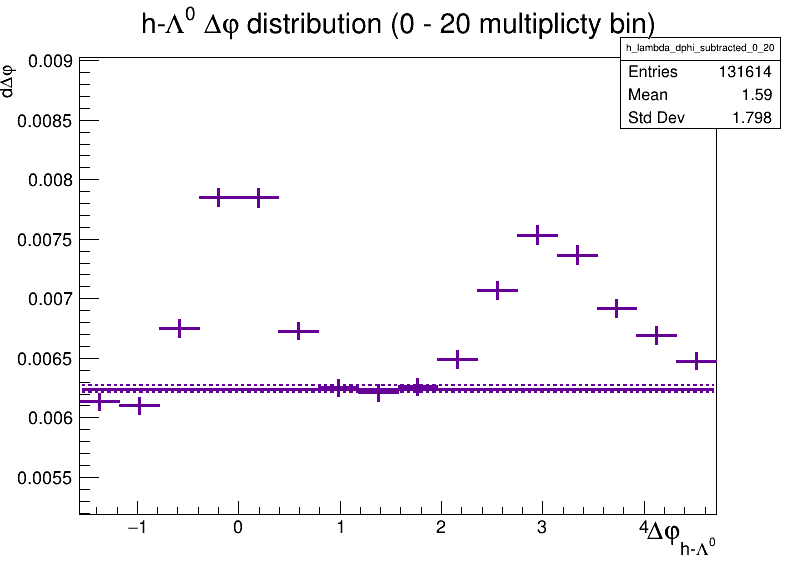

In [231]:
min_bin = h_lambda_dphi_subtracted_0_20.GetMinimumBin()
min_val = h_lambda_dphi_subtracted_0_20.GetBinContent(min_bin)
max_bin = h_lambda_dphi_subtracted_0_20.GetMaximumBin()
max_val = h_lambda_dphi_subtracted_0_20.GetBinContent(max_bin)

h_lambda_dphi_subtracted_0_20.GetYaxis().SetRangeUser(0.85*min_val, 1.15*max_val)
h_lambda_dphi_subtracted_0_20.Draw()
ue_line_0_20.Draw("SAME")
ue_upper_line_0_20.Draw("SAME")
ue_lower_line_0_20.Draw("SAME")
c.Draw()

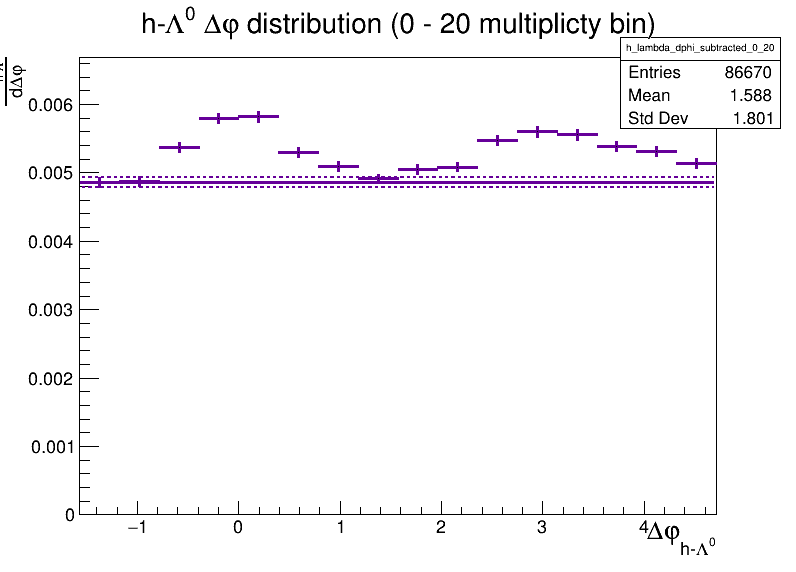

In [536]:
h_lambda_dphi_subtracted_0_20.GetYaxis().SetRangeUser(0, 1.15*max_val)
h_lambda_dphi_subtracted_0_20.Draw()
ue_line_0_20.Draw("SAME")
ue_upper_line_0_20.Draw("SAME")
ue_lower_line_0_20.Draw("SAME")
c.Draw()

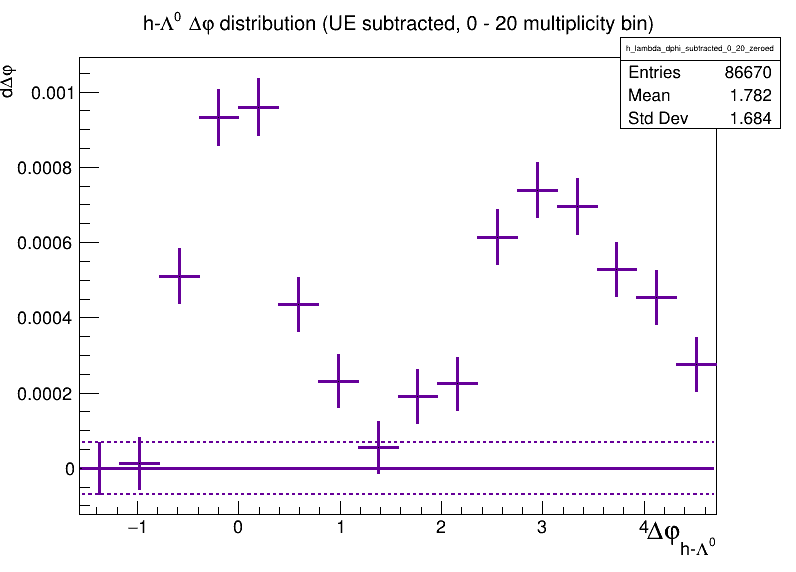

In [537]:
h_lambda_dphi_subtracted_0_20_zeroed = h_lambda_dphi_subtracted_0_20.Clone("h_lambda_dphi_subtracted_0_20_zeroed")
h_lambda_dphi_subtracted_0_20_zeroed.SetTitle("h-#Lambda^{0} #Delta#varphi distribution (UE subtracted, 0 - 20 multiplicity bin)")
h_lambda_dphi_subtracted_0_20_zeroed.Add(ue_line_0_20, -1)
h_lambda_dphi_subtracted_0_20_zeroed.Draw()
zero_line_0_20.Draw("SAME")
zero_upper_line_0_20.Draw("SAME")
zero_lower_line_0_20.Draw("SAME")
c.Draw()

In [538]:
DPHI_BINS = h_lambda_dphi_subtracted_0_20.GetNbinsX()

In [539]:
h_lambda_total_integral_0_20 = 0
h_lambda_near_integral_0_20 = 0
h_lambda_away_integral_0_20 = 0
h_lambda_ue_integral_0_20 = ue_avg_0_20*DPHI_BINS

h_lambda_total_integral_error_0_20 = 0
h_lambda_near_integral_error_0_20 = 0
h_lambda_away_integral_error_0_20 = 0
h_lambda_ue_integral_error_0_20 = ue_avg_error_0_20*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_lambda_total_integral_0_20 += h_lambda_dphi_subtracted_0_20.GetBinContent(bin_num)
    h_lambda_total_integral_error_0_20 += h_lambda_dphi_subtracted_0_20.GetBinError(bin_num)**2
    part = h_lambda_dphi_subtracted_0_20.GetBinContent(bin_num) - ue_avg_0_20
    if part < 0:
        continue
    if bin_num < 9:
        h_lambda_near_integral_0_20 += part
        h_lambda_near_integral_error_0_20 += h_lambda_dphi_subtracted_0_20.GetBinError(bin_num)**2
        h_lambda_near_integral_error_0_20 += ue_avg_error_0_20**2
    else:
        h_lambda_away_integral_0_20 += part
        h_lambda_away_integral_error_0_20 += h_lambda_dphi_subtracted_0_20.GetBinError(bin_num)**2
        h_lambda_away_integral_error_0_20 += ue_avg_error_0_20**2
h_lambda_total_integral_error_0_20 = math.sqrt(h_lambda_total_integral_error_0_20)
h_lambda_near_integral_error_0_20 = math.sqrt(h_lambda_near_integral_error_0_20)
h_lambda_away_integral_error_0_20 = math.sqrt(h_lambda_away_integral_error_0_20)

In [540]:
h_lambda_total_integral_0_20_highest_pt = 0
h_lambda_near_integral_0_20_highest_pt = 0
h_lambda_away_integral_0_20_highest_pt = 0
h_lambda_ue_integral_0_20_highest_pt = ue_avg_0_20_highest_pt*DPHI_BINS

h_lambda_total_integral_error_0_20_highest_pt = 0
h_lambda_near_integral_error_0_20_highest_pt = 0
h_lambda_away_integral_error_0_20_highest_pt = 0
h_lambda_ue_integral_error_0_20_highest_pt = ue_avg_error_0_20_highest_pt*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_lambda_total_integral_0_20_highest_pt += h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(bin_num)
    h_lambda_total_integral_error_0_20_highest_pt += h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(bin_num)**2
    part = h_lambda_dphi_subtracted_0_20_highest_pt.GetBinContent(bin_num) - ue_avg_0_20_highest_pt
    if part < 0:
        continue
    if bin_num < 9:
        h_lambda_near_integral_0_20_highest_pt += part 
        h_lambda_near_integral_error_0_20_highest_pt += h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(bin_num)**2
        h_lambda_near_integral_error_0_20_highest_pt += ue_avg_error_0_20_highest_pt**2
    else:
        h_lambda_away_integral_0_20_highest_pt += part 
        h_lambda_away_integral_error_0_20_highest_pt += h_lambda_dphi_subtracted_0_20_highest_pt.GetBinError(bin_num)**2
        h_lambda_away_integral_error_0_20_highest_pt += ue_avg_error_0_20_highest_pt**2
h_lambda_total_integral_error_0_20_highest_pt = math.sqrt(h_lambda_total_integral_error_0_20_highest_pt)
h_lambda_near_integral_error_0_20_highest_pt = math.sqrt(h_lambda_near_integral_error_0_20_highest_pt)
h_lambda_away_integral_error_0_20_highest_pt = math.sqrt(h_lambda_away_integral_error_0_20_highest_pt)

In [541]:
h_h_dphi_0_20 = h_h_2d_mixcor_0_20.ProjectionY("h_h_dphi_0_20")
h_h_dphi_0_20.SetTitle("h-h #Delta#varphi distribution (0 - 20 multiplicty bin)")
h_h_dphi_0_20.SetLineColor(rt.kBlue)
h_h_dphi_0_20.SetLineWidth(3)
h_h_dphi_0_20.GetYaxis().SetTitle("#frac{dN_{h-h}}{d#Delta#varphi}")
h_h_dphi_0_20.GetXaxis().SetTitleSize(0.05)
h_h_dphi_0_20.GetXaxis().SetTitleOffset(0.5)

In [542]:
h_h_dphi_0_20_highest_pt = h_h_2d_mixcor_0_20_highest_pt.ProjectionY("h_h_dphi_0_20_highest_pt")
h_h_dphi_0_20_highest_pt.SetTitle("h-h #Delta#varphi distribution (0 - 20 multiplicty bin)")
h_h_dphi_0_20_highest_pt.SetLineColor(rt.kBlue)
h_h_dphi_0_20_highest_pt.SetLineWidth(3)
h_h_dphi_0_20_highest_pt.GetYaxis().SetTitle("#frac{dN_{h-h}}{d#Delta#varphi}")
h_h_dphi_0_20_highest_pt.GetXaxis().SetTitleSize(0.05)
h_h_dphi_0_20_highest_pt.GetXaxis().SetTitleOffset(0.5)

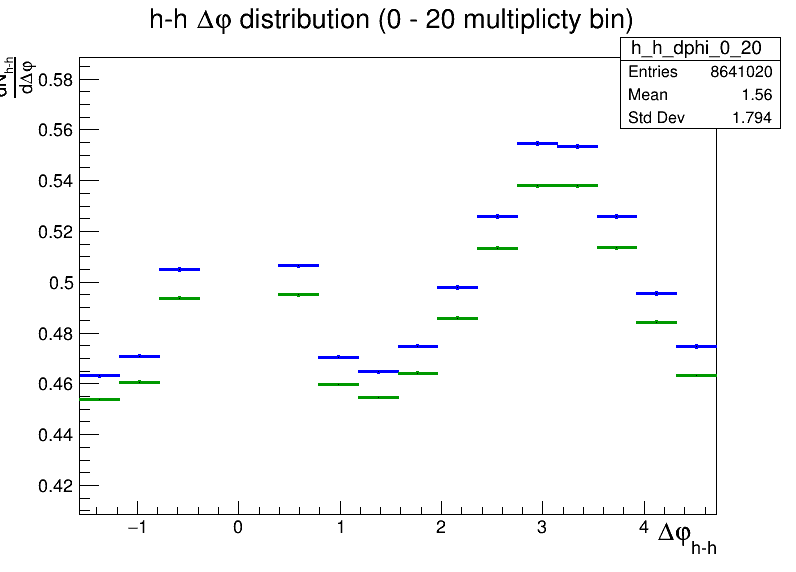

In [543]:
h_h_dphi_0_20.GetYaxis().SetRangeUser(h_h_dphi_0_20_highest_pt.GetMinimum()*0.9, 
                                       h_h_dphi_0_20.GetMaximum()*1.1)
h_h_dphi_0_20_highest_pt.SetLineColor(rt.kGreen + 2)
h_h_dphi_0_20.Draw()
h_h_dphi_0_20_highest_pt.Draw("SAME")
c.Draw()

In [544]:
if USE_AVG_4:
    hh_ue_line_0_20 = rt.TF1("hh_ue_line_0_20", "pol0", -2, 6)
    hh_ue_upper_line_0_20 = rt.TF1("hh_ue_upper_line_0_20", "pol0", -2, 6)
    hh_ue_lower_line_0_20 = rt.TF1("hh_ue_lower_line_0_20", "pol0", -2, 6)
    hh_zero_line_0_20 = rt.TF1("hh_zero_line_0_20", "pol0", -2, 6)
    hh_zero_upper_line_0_20 = rt.TF1("hh_zero_upper_line_0_20", "pol0", -2, 6)
    hh_zero_lower_line_0_20 = rt.TF1("hh_zero_lower_line_0_20", "pol0", -2, 6)
    hh_ue_avg_0_20 = (h_h_dphi_0_20.GetBinContent(1) 
                   + h_h_dphi_0_20.GetBinContent(8)
                   + h_h_dphi_0_20.GetBinContent(9)
                   + h_h_dphi_0_20.GetBinContent(16))/4

    hh_ue_avg_error_0_20 = (1/4)*(math.sqrt(h_h_dphi_0_20.GetBinError(1)**2 
                   + h_h_dphi_0_20.GetBinError(8)**2
                   + h_h_dphi_0_20.GetBinError(9)**2
                   + h_h_dphi_0_20.GetBinError(16)**2))


    hh_ue_line_0_20.SetParameter(0, hh_ue_avg_0_20)
    hh_ue_line_0_20.SetLineColor(rt.kBlue)
    hh_ue_line_0_20.SetLineWidth(3)
    hh_ue_line_0_20.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_0_20.SetParameter(0, hh_ue_avg_0_20 + hh_ue_avg_error_0_20)
    hh_ue_upper_line_0_20.SetLineColor(rt.kBlue)
    hh_ue_upper_line_0_20.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_0_20.SetParameter(0, hh_ue_avg_0_20 - hh_ue_avg_error_0_20)
    hh_ue_lower_line_0_20.SetLineColor(rt.kBlue)
    hh_ue_lower_line_0_20.SetLineStyle(rt.kDashed)

    hh_zero_line_0_20.SetParameter(0, 0)
    hh_zero_line_0_20.SetLineColor(rt.kBlue)
    hh_zero_line_0_20.SetLineWidth(3)
    hh_zero_line_0_20.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_0_20.SetParameter(0, hh_ue_avg_error_0_20)
    hh_zero_upper_line_0_20.SetLineColor(rt.kBlue)
    hh_zero_upper_line_0_20.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_0_20.SetParameter(0, -hh_ue_avg_error_0_20)
    hh_zero_lower_line_0_20.SetLineColor(rt.kBlue)
    hh_zero_lower_line_0_20.SetLineStyle(rt.kDashed)
elif USE_AVG_6:
    hh_ue_line_0_20 = rt.TF1("hh_ue_line_0_20", "pol0", -2, 6)
    hh_ue_upper_line_0_20 = rt.TF1("hh_ue_upper_line_0_20", "pol0", -2, 6)
    hh_ue_lower_line_0_20 = rt.TF1("hh_ue_lower_line_0_20", "pol0", -2, 6)
    hh_zero_line_0_20 = rt.TF1("hh_zero_line_0_20", "pol0", -2, 6)
    hh_zero_upper_line_0_20 = rt.TF1("hh_zero_upper_line_0_20", "pol0", -2, 6)
    hh_zero_lower_line_0_20 = rt.TF1("hh_zero_lower_line_0_20", "pol0", -2, 6)
    hh_ue_avg_0_20 = (h_h_dphi_0_20.GetBinContent(1) 
                   + h_h_dphi_0_20.GetBinContent(2)
                   + h_h_dphi_0_20.GetBinContent(7)
                   + h_h_dphi_0_20.GetBinContent(8)
                   + h_h_dphi_0_20.GetBinContent(9)
                   + h_h_dphi_0_20.GetBinContent(16))/6

    hh_ue_avg_error_0_20 = (1/6)*(math.sqrt(h_h_dphi_0_20.GetBinError(1)**2 
                   + h_h_dphi_0_20.GetBinError(2)**2
                   + h_h_dphi_0_20.GetBinError(7)**2
                   + h_h_dphi_0_20.GetBinError(8)**2
                   + h_h_dphi_0_20.GetBinError(9)**2
                   + h_h_dphi_0_20.GetBinError(16)**2))


    hh_ue_line_0_20.SetParameter(0, hh_ue_avg_0_20)
    hh_ue_line_0_20.SetLineColor(rt.kBlue)
    hh_ue_line_0_20.SetLineWidth(3)
    hh_ue_line_0_20.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_0_20.SetParameter(0, hh_ue_avg_0_20 + hh_ue_avg_error_0_20)
    hh_ue_upper_line_0_20.SetLineColor(rt.kBlue)
    hh_ue_upper_line_0_20.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_0_20.SetParameter(0, hh_ue_avg_0_20 - hh_ue_avg_error_0_20)
    hh_ue_lower_line_0_20.SetLineColor(rt.kBlue)
    hh_ue_lower_line_0_20.SetLineStyle(rt.kDashed)

    hh_zero_line_0_20.SetParameter(0, 0)
    hh_zero_line_0_20.SetLineColor(rt.kBlue)
    hh_zero_line_0_20.SetLineWidth(3)
    hh_zero_line_0_20.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_0_20.SetParameter(0, hh_ue_avg_error_0_20)
    hh_zero_upper_line_0_20.SetLineColor(rt.kBlue)
    hh_zero_upper_line_0_20.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_0_20.SetParameter(0, -hh_ue_avg_error_0_20)
    hh_zero_lower_line_0_20.SetLineColor(rt.kBlue)
    hh_zero_lower_line_0_20.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    hh_ue_line_0_20 = rt.TF1("hh_ue_line_0_20", "pol0", -2, 6)
    hh_ue_upper_line_0_20 = rt.TF1("hh_ue_upper_line_0_20", "pol0", -2, 6)
    hh_ue_lower_line_0_20 = rt.TF1("hh_ue_lower_line_0_20", "pol0", -2, 6)
    hh_zero_line_0_20 = rt.TF1("hh_zero_line_0_20", "pol0", -2, 6)
    hh_zero_upper_line_0_20 = rt.TF1("hh_zero_upper_line_0_20", "pol0", -2, 6)
    hh_zero_lower_line_0_20 = rt.TF1("hh_zero_lower_line_0_20", "pol0", -2, 6)
    
    min_bin = h_h_dphi_0_20.GetMinimumBin()
    hh_ue_avg_0_20 = h_h_dphi_0_20.GetBinContent(min_bin)
    hh_ue_avg_error_0_20 = h_h_dphi_0_20.GetBinError(min_bin)

    hh_ue_line_0_20.SetParameter(0, hh_ue_avg_0_20)
    hh_ue_line_0_20.SetLineColor(rt.kBlue)
    hh_ue_line_0_20.SetLineWidth(3)
    hh_ue_line_0_20.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_0_20.SetParameter(0, hh_ue_avg_0_20 + hh_ue_avg_error_0_20)
    hh_ue_upper_line_0_20.SetLineColor(rt.kBlue)
    hh_ue_upper_line_0_20.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_0_20.SetParameter(0, hh_ue_avg_0_20 - hh_ue_avg_error_0_20)
    hh_ue_lower_line_0_20.SetLineColor(rt.kBlue)
    hh_ue_lower_line_0_20.SetLineStyle(rt.kDashed)

    hh_zero_line_0_20.SetParameter(0, 0)
    hh_zero_line_0_20.SetLineColor(rt.kBlue)
    hh_zero_line_0_20.SetLineWidth(3)
    hh_zero_line_0_20.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_0_20.SetParameter(0, hh_ue_avg_error_0_20)
    hh_zero_upper_line_0_20.SetLineColor(rt.kBlue)
    hh_zero_upper_line_0_20.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_0_20.SetParameter(0, -hh_ue_avg_error_0_20)
    hh_zero_lower_line_0_20.SetLineColor(rt.kBlue)
    hh_zero_lower_line_0_20.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

In [545]:
if USE_AVG_4:
    hh_ue_line_0_20_highest_pt = rt.TF1("hh_ue_line_0_20_highest_pt", "pol0", -2, 6)
    hh_ue_upper_line_0_20_highest_pt = rt.TF1("hh_ue_upper_line_0_20_highest_pt", "pol0", -2, 6)
    hh_ue_lower_line_0_20_highest_pt = rt.TF1("hh_ue_lower_line_0_20_highest_pt", "pol0", -2, 6)
    hh_zero_line_0_20_highest_pt = rt.TF1("hh_zero_line_0_20_highest_pt", "pol0", -2, 6)
    hh_zero_upper_line_0_20_highest_pt = rt.TF1("hh_zero_upper_line_0_20_highest_pt", "pol0", -2, 6)
    hh_zero_lower_line_0_20_highest_pt = rt.TF1("hh_zero_lower_line_0_20_highest_pt", "pol0", -2, 6)
    hh_ue_avg_0_20_highest_pt = (h_h_dphi_0_20_highest_pt.GetBinContent(1) 
                   + h_h_dphi_0_20_highest_pt.GetBinContent(8)
                   + h_h_dphi_0_20_highest_pt.GetBinContent(9)
                   + h_h_dphi_0_20_highest_pt.GetBinContent(16))/4

    hh_ue_avg_error_0_20_highest_pt = (1/4)*(math.sqrt(h_h_dphi_0_20_highest_pt.GetBinError(1)**2 
                   + h_h_dphi_0_20_highest_pt.GetBinError(8)**2
                   + h_h_dphi_0_20_highest_pt.GetBinError(9)**2
                   + h_h_dphi_0_20_highest_pt.GetBinError(16)**2))


    hh_ue_line_0_20_highest_pt.SetParameter(0, hh_ue_avg_0_20_highest_pt)
    hh_ue_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_line_0_20_highest_pt.SetLineWidth(3)
    hh_ue_line_0_20_highest_pt.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_0_20_highest_pt.SetParameter(0, hh_ue_avg_0_20_highest_pt + hh_ue_avg_error_0_20_highest_pt)
    hh_ue_upper_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_upper_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_0_20_highest_pt.SetParameter(0, hh_ue_avg_0_20_highest_pt - hh_ue_avg_error_0_20_highest_pt)
    hh_ue_lower_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_lower_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

    hh_zero_line_0_20_highest_pt.SetParameter(0, 0)
    hh_zero_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_line_0_20_highest_pt.SetLineWidth(3)
    hh_zero_line_0_20_highest_pt.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_0_20_highest_pt.SetParameter(0, hh_ue_avg_error_0_20_highest_pt)
    hh_zero_upper_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_upper_line_0_20_highest_pt.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_0_20_highest_pt.SetParameter(0, -hh_ue_avg_error_0_20_highest_pt)
    hh_zero_lower_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_lower_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

elif USE_AVG_6:
    hh_ue_line_0_20_highest_pt = rt.TF1("hh_ue_line_0_20_highest_pt", "pol0", -2, 6)
    hh_ue_upper_line_0_20_highest_pt = rt.TF1("hh_ue_upper_line_0_20_highest_pt", "pol0", -2, 6)
    hh_ue_lower_line_0_20_highest_pt = rt.TF1("hh_ue_lower_line_0_20_highest_pt", "pol0", -2, 6)
    hh_zero_line_0_20_highest_pt = rt.TF1("hh_zero_line_0_20_highest_pt", "pol0", -2, 6)
    hh_zero_upper_line_0_20_highest_pt = rt.TF1("hh_zero_upper_line_0_20_highest_pt", "pol0", -2, 6)
    hh_zero_lower_line_0_20_highest_pt = rt.TF1("hh_zero_lower_line_0_20_highest_pt", "pol0", -2, 6)
    hh_ue_avg_0_20_highest_pt = (h_h_dphi_0_20_highest_pt.GetBinContent(1) 
                   + h_h_dphi_0_20_highest_pt.GetBinContent(8)
                   + h_h_dphi_0_20_highest_pt.GetBinContent(9)
                   + h_h_dphi_0_20_highest_pt.GetBinContent(16))/4

    hh_ue_avg_error_0_20_highest_pt = (1/4)*(math.sqrt(h_h_dphi_0_20_highest_pt.GetBinError(1)**2 
                   + h_h_dphi_0_20_highest_pt.GetBinError(8)**2
                   + h_h_dphi_0_20_highest_pt.GetBinError(9)**2
                   + h_h_dphi_0_20_highest_pt.GetBinError(16)**2))


    hh_ue_line_0_20_highest_pt.SetParameter(0, hh_ue_avg_0_20_highest_pt)
    hh_ue_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_line_0_20_highest_pt.SetLineWidth(3)
    hh_ue_line_0_20_highest_pt.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_0_20_highest_pt.SetParameter(0, hh_ue_avg_0_20_highest_pt + hh_ue_avg_error_0_20_highest_pt)
    hh_ue_upper_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_upper_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_0_20_highest_pt.SetParameter(0, hh_ue_avg_0_20_highest_pt - hh_ue_avg_error_0_20_highest_pt)
    hh_ue_lower_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_lower_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

    hh_zero_line_0_20_highest_pt.SetParameter(0, 0)
    hh_zero_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_line_0_20_highest_pt.SetLineWidth(3)
    hh_zero_line_0_20_highest_pt.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_0_20_highest_pt.SetParameter(0, hh_ue_avg_error_0_20_highest_pt)
    hh_zero_upper_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_upper_line_0_20_highest_pt.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_0_20_highest_pt.SetParameter(0, -hh_ue_avg_error_0_20_highest_pt)
    hh_zero_lower_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_lower_line_0_20_highest_pt.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    hh_ue_line_0_20_highest_pt = rt.TF1("hh_ue_line_0_20_highest_pt", "pol0", -2, 6)
    hh_ue_upper_line_0_20_highest_pt = rt.TF1("hh_ue_upper_line_0_20_highest_pt", "pol0", -2, 6)
    hh_ue_lower_line_0_20_highest_pt = rt.TF1("hh_ue_lower_line_0_20_highest_pt", "pol0", -2, 6)
    hh_zero_line_0_20_highest_pt = rt.TF1("hh_zero_line_0_20_highest_pt", "pol0", -2, 6)
    hh_zero_upper_line_0_20_highest_pt = rt.TF1("hh_zero_upper_line_0_20_highest_pt", "pol0", -2, 6)
    hh_zero_lower_line_0_20_highest_pt = rt.TF1("hh_zero_lower_line_0_20_highest_pt", "pol0", -2, 6)
    
    min_bin = h_h_dphi_0_20_highest_pt.GetMinimumBin()
    hh_ue_avg_0_20_highest_pt = h_h_dphi_0_20_highest_pt.GetBinContent(min_bin)
    hh_ue_avg_error_0_20_highest_pt = h_h_dphi_0_20_highest_pt.GetBinError(min_bin)

    hh_ue_line_0_20_highest_pt.SetParameter(0, hh_ue_avg_0_20_highest_pt)
    hh_ue_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_line_0_20_highest_pt.SetLineWidth(3)
    hh_ue_line_0_20_highest_pt.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_0_20_highest_pt.SetParameter(0, hh_ue_avg_0_20_highest_pt + hh_ue_avg_error_0_20_highest_pt)
    hh_ue_upper_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_upper_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_0_20_highest_pt.SetParameter(0, hh_ue_avg_0_20_highest_pt - hh_ue_avg_error_0_20_highest_pt)
    hh_ue_lower_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_lower_line_0_20_highest_pt.SetLineStyle(rt.kDashed)

    hh_zero_line_0_20_highest_pt.SetParameter(0, 0)
    hh_zero_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_line_0_20_highest_pt.SetLineWidth(3)
    hh_zero_line_0_20_highest_pt.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_0_20_highest_pt.SetParameter(0, hh_ue_avg_error_0_20_highest_pt)
    hh_zero_upper_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_upper_line_0_20_highest_pt.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_0_20_highest_pt.SetParameter(0, -hh_ue_avg_error_0_20_highest_pt)
    hh_zero_lower_line_0_20_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_lower_line_0_20_highest_pt.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

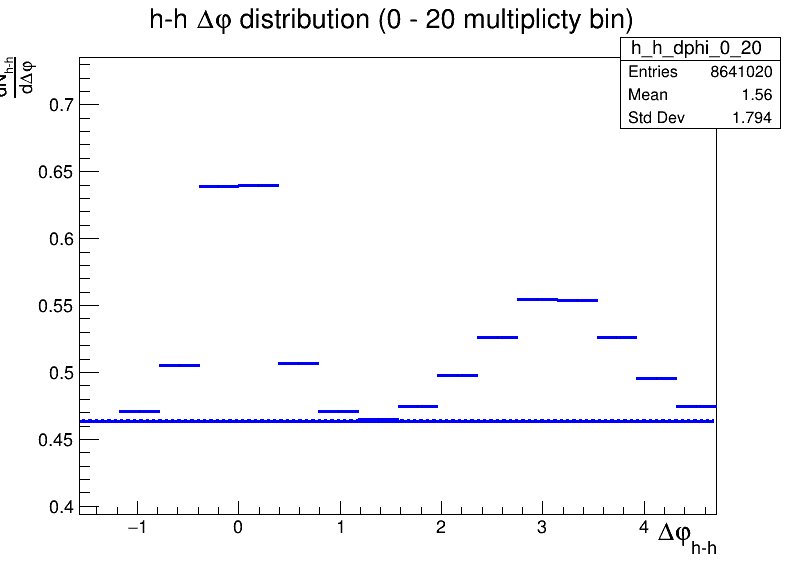

In [546]:
min_bin = h_h_dphi_0_20.GetMinimumBin()
min_val = h_h_dphi_0_20.GetBinContent(min_bin)
max_bin = h_h_dphi_0_20.GetMaximumBin()
max_val = h_h_dphi_0_20.GetBinContent(max_bin)

h_h_dphi_0_20.GetYaxis().SetRangeUser(0.85*min_val, 1.15*max_val)

h_h_dphi_0_20.Draw()
hh_ue_line_0_20.Draw("SAME")
hh_ue_upper_line_0_20.Draw("SAME")
hh_ue_lower_line_0_20.Draw("SAME")
c.Draw()

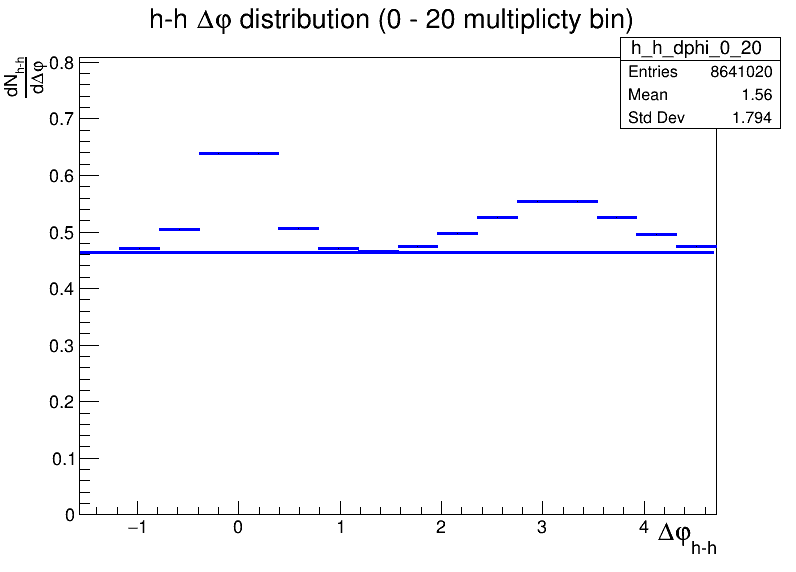

In [547]:
h_h_dphi_0_20.GetYaxis().SetRangeUser(0, h_h_dphi_0_20.GetMaximum()*1.1)
h_h_dphi_0_20.Draw()
hh_ue_line_0_20.Draw("SAME")
hh_ue_upper_line_0_20.Draw("SAME")
hh_ue_lower_line_0_20.Draw("SAME")
c.Draw()

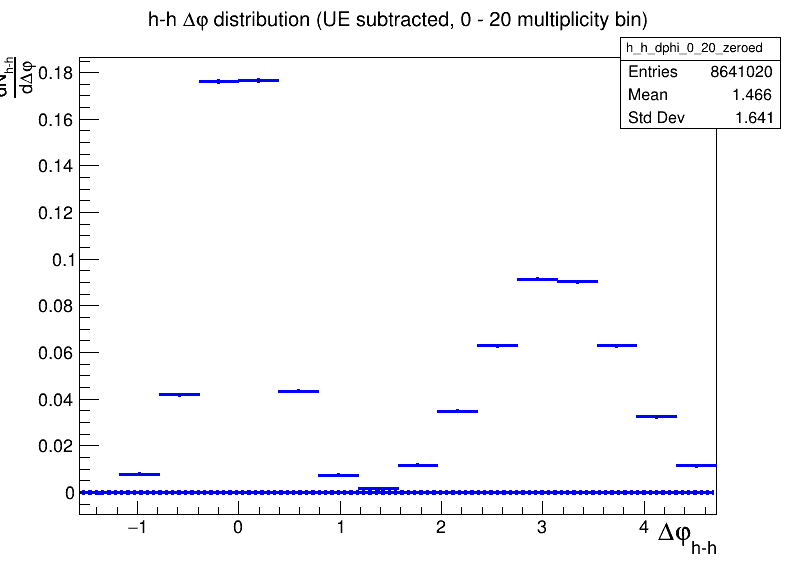

In [548]:
h_h_dphi_0_20_zeroed = h_h_dphi_0_20.Clone("h_h_dphi_0_20_zeroed")
h_h_dphi_0_20_zeroed.SetTitle("h-h #Delta#varphi distribution (UE subtracted, 0 - 20 multiplicity bin)")
h_h_dphi_0_20_zeroed.Add(hh_ue_line_0_20, -1)
h_h_dphi_0_20_zeroed.Draw()
hh_zero_line_0_20.Draw("SAME")
hh_zero_upper_line_0_20.Draw("SAME")
hh_zero_lower_line_0_20.Draw("SAME")
c.Draw()

In [549]:
h_h_total_integral_0_20 = 0
h_h_near_integral_0_20 = 0
h_h_away_integral_0_20 = 0
h_h_ue_integral_0_20 = hh_ue_avg_0_20*DPHI_BINS

h_h_total_integral_error_0_20 = 0
h_h_near_integral_error_0_20 = 0
h_h_away_integral_error_0_20 = 0
h_h_ue_integral_error_0_20 = hh_ue_avg_error_0_20*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_h_total_integral_0_20 += h_h_dphi_0_20.GetBinContent(bin_num)
    h_h_total_integral_error_0_20 += h_h_dphi_0_20.GetBinError(bin_num)**2
    part = h_h_dphi_0_20.GetBinContent(bin_num) - hh_ue_avg_0_20
    if part < 0:
        continue
    if bin_num < 9:
        h_h_near_integral_0_20 += part
        h_h_near_integral_error_0_20 += h_h_dphi_0_20.GetBinError(bin_num)**2
        h_h_near_integral_error_0_20 += hh_ue_avg_error_0_20**2
    else:
        h_h_away_integral_0_20 += part
        h_h_away_integral_error_0_20 += h_h_dphi_0_20.GetBinError(bin_num)**2
        h_h_away_integral_error_0_20 += hh_ue_avg_error_0_20**2
h_h_total_integral_error_0_20 = math.sqrt(h_h_total_integral_error_0_20)
h_h_near_integral_error_0_20 = math.sqrt(h_h_near_integral_error_0_20)
h_h_away_integral_error_0_20 = math.sqrt(h_h_away_integral_error_0_20)

In [550]:
h_h_total_integral_0_20_highest_pt = 0
h_h_near_integral_0_20_highest_pt = 0
h_h_away_integral_0_20_highest_pt = 0
h_h_ue_integral_0_20_highest_pt = hh_ue_avg_0_20_highest_pt*DPHI_BINS

h_h_total_integral_error_0_20_highest_pt = 0
h_h_near_integral_error_0_20_highest_pt = 0
h_h_away_integral_error_0_20_highest_pt = 0
h_h_ue_integral_error_0_20_highest_pt = hh_ue_avg_error_0_20_highest_pt*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_h_total_integral_0_20_highest_pt += h_h_dphi_0_20_highest_pt.GetBinContent(bin_num)
    h_h_total_integral_error_0_20_highest_pt += h_h_dphi_0_20_highest_pt.GetBinError(bin_num)**2
    part = h_h_dphi_0_20_highest_pt.GetBinContent(bin_num) - hh_ue_avg_0_20_highest_pt
    if part < 0:
        continue
    if bin_num < 9:
        h_h_near_integral_0_20_highest_pt += part
        h_h_near_integral_error_0_20_highest_pt += h_h_dphi_0_20_highest_pt.GetBinError(bin_num)**2
        h_h_near_integral_error_0_20_highest_pt += hh_ue_avg_error_0_20_highest_pt**2
    else:
        h_h_away_integral_0_20_highest_pt += part
        h_h_away_integral_error_0_20_highest_pt += h_h_dphi_0_20_highest_pt.GetBinError(bin_num)**2
        h_h_away_integral_error_0_20_highest_pt += hh_ue_avg_error_0_20_highest_pt**2
h_h_total_integral_error_0_20_highest_pt = math.sqrt(h_h_total_integral_error_0_20_highest_pt)
h_h_near_integral_error_0_20_highest_pt = math.sqrt(h_h_near_integral_error_0_20_highest_pt)
h_h_away_integral_error_0_20_highest_pt = math.sqrt(h_h_away_integral_error_0_20_highest_pt)

In [551]:
near_ratio_0_20 = h_lambda_near_integral_0_20/h_h_near_integral_0_20
away_ratio_0_20 = h_lambda_away_integral_0_20/h_h_away_integral_0_20
ue_ratio_0_20 = h_lambda_ue_integral_0_20/h_h_ue_integral_0_20
total_ratio_0_20 = h_lambda_total_integral_0_20/h_h_total_integral_0_20

near_ratio_error_0_20 = near_ratio_0_20*math.sqrt((h_lambda_near_integral_error_0_20/h_lambda_near_integral_0_20)**2
                                                 + (h_h_near_integral_error_0_20/h_h_near_integral_0_20)**2)
away_ratio_error_0_20 = away_ratio_0_20*math.sqrt((h_lambda_away_integral_error_0_20/h_lambda_away_integral_0_20)**2
                                                 + (h_h_away_integral_error_0_20/h_h_away_integral_0_20)**2)
ue_ratio_error_0_20 = ue_ratio_0_20*math.sqrt((h_lambda_ue_integral_error_0_20/h_lambda_ue_integral_0_20)**2
                                                 + (h_h_ue_integral_error_0_20/h_h_ue_integral_0_20)**2)
total_ratio_error_0_20 = total_ratio_0_20*math.sqrt((h_lambda_total_integral_error_0_20/h_lambda_total_integral_0_20)**2
                                                 + (h_h_total_integral_error_0_20/h_h_total_integral_0_20)**2)

In [552]:
near_ratio_0_20_highest_pt = h_lambda_near_integral_0_20_highest_pt/h_h_near_integral_0_20_highest_pt
away_ratio_0_20_highest_pt = h_lambda_away_integral_0_20_highest_pt/h_h_away_integral_0_20_highest_pt
ue_ratio_0_20_highest_pt = h_lambda_ue_integral_0_20_highest_pt/h_h_ue_integral_0_20_highest_pt
total_ratio_0_20_highest_pt = h_lambda_total_integral_0_20_highest_pt/h_h_total_integral_0_20_highest_pt

near_ratio_error_0_20_highest_pt = near_ratio_0_20_highest_pt*math.sqrt((h_lambda_near_integral_error_0_20_highest_pt/h_lambda_near_integral_0_20_highest_pt)**2
                                                 + (h_h_near_integral_error_0_20_highest_pt/h_h_near_integral_0_20_highest_pt)**2)
away_ratio_error_0_20_highest_pt = away_ratio_0_20_highest_pt*math.sqrt((h_lambda_away_integral_error_0_20_highest_pt/h_lambda_away_integral_0_20_highest_pt)**2
                                                 + (h_h_away_integral_error_0_20_highest_pt/h_h_away_integral_0_20_highest_pt)**2)
ue_ratio_error_0_20_highest_pt = ue_ratio_0_20_highest_pt*math.sqrt((h_lambda_ue_integral_error_0_20_highest_pt/h_lambda_ue_integral_0_20_highest_pt)**2
                                                 + (h_h_ue_integral_error_0_20_highest_pt/h_h_ue_integral_0_20_highest_pt)**2)
total_ratio_error_0_20_highest_pt = total_ratio_0_20_highest_pt*math.sqrt((h_lambda_total_integral_error_0_20_highest_pt/h_lambda_total_integral_0_20_highest_pt)**2
                                                 + (h_h_total_integral_error_0_20_highest_pt/h_h_total_integral_0_20_highest_pt)**2)

# 20 - 50 setup

In [553]:
input_file_20_50 = rt.TFile("~/cent_20_50_v0_fullstat.root")
input_list_20_50 = input_file_20_50.Get("h-lambda")
input_file_20_50.Close()

In [554]:
trig_dist_20_50 = input_list_20_50.FindObject("fTriggerDistEff")
lambda_dist_20_50 = input_list_20_50.FindObject("fTriggeredLambdaDist")

In [555]:
trig_dist_20_50_highest_pt = input_list_20_50.FindObject("fTriggerDistEff_highestPt")

In [556]:
h_h_20_50 = input_list_20_50.FindObject("fDphiHHEff")
h_h_mixed_20_50 = input_list_20_50.FindObject("fDphiHHMixed")

In [557]:
h_h_20_50_highest_pt = input_list_20_50.FindObject("fDphiHHEff_highestPt")
h_h_mixed_20_50_highest_pt = input_list_20_50.FindObject("fDphiHHMixed_highestPt")

In [558]:
h_lambda_20_50 = input_list_20_50.FindObject("fDphiHLambdaEff")
h_lambda_mixed_20_50 = input_list_20_50.FindObject("fDphiHLambdaMixed")

In [559]:
h_lambda_mixed_20_50_highest_pt = input_list_20_50.FindObject("fDphiHLambdaMixed_highestPt")
h_lambda_20_50_highest_pt = input_list_20_50.FindObject("fDphiHLambdaEff_highestPt")

In [560]:
# Setting the trigger Pt (this is never changed again)
trig_dist_20_50.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
trig_dist_20_50_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_20_50.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_20_50_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_mixed_20_50.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_mixed_20_50_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_20_50.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_20_50_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_mixed_20_50.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_mixed_20_50_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)

In [561]:
# Setting the associated Pt (this is never changed again)
lambda_dist_20_50.GetAxis(0).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_20_50.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_20_50_highest_pt.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_mixed_20_50_highest_pt.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_20_50.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_20_50_highest_pt.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_mixed_20_50.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_mixed_20_50_highest_pt.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)

In [562]:
trig_pt_dist_20_50 = trig_dist_20_50.Projection(0).Clone("trig_pt_dist_20_50")
trig_phi_dist_20_50 = trig_dist_20_50.Projection(1).Clone("trig_phi_dist_20_50")
trig_eta_dist_20_50 = trig_dist_20_50.Projection(2).Clone("trig_eta_dist_20_50")
trig_2d_dist_20_50 = trig_dist_20_50.Projection(0, 3).Clone("trig_2d_dist_20_50")

trig_pt_dist_20_50.SetTitle("Trigger #font[12]{p}_{T} Distribution (red: all, blue: highest)")
trig_pt_dist_20_50.Sumw2()
trig_pt_dist_20_50.SetLineColor(rt.kRed)

trig_phi_dist_20_50.SetTitle("Trigger #varphi Distribution (Hybrid GCG)")
trig_phi_dist_20_50.Sumw2()
trig_phi_dist_20_50.SetLineColor(rt.kRed)

trig_eta_dist_20_50.SetTitle("Trigger #eta Distribution (Hybrid GCG)")
trig_eta_dist_20_50.Sumw2()
trig_eta_dist_20_50.SetLineColor(rt.kRed)

Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_proj_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_proj_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_proj_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_proj_3_0 (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [563]:
trig_pt_dist_20_50_highest_pt = trig_dist_20_50_highest_pt.Projection(0).Clone("trig_pt_dist_20_50_highest_pt")
trig_phi_dist_20_50_highest_pt = trig_dist_20_50_highest_pt.Projection(1).Clone("trig_phi_dist_20_50_highest_pt")
trig_eta_dist_20_50_highest_pt = trig_dist_20_50_highest_pt.Projection(2).Clone("trig_eta_dist_20_50_highest_pt")
trig_2d_dist_20_50_highest_pt = trig_dist_20_50_highest_pt.Projection(0, 3).Clone("trig_2d_dist_20_50_highest_pt")

trig_pt_dist_20_50_highest_pt.SetTitle("Trigger #font[12]{p}_{T} Distribution (red: all, blue: highest)")
trig_pt_dist_20_50_highest_pt.Sumw2()
trig_pt_dist_20_50_highest_pt.SetLineColor(rt.kRed)

trig_phi_dist_20_50_highest_pt.SetTitle("Trigger #varphi Distribution (Hybrid GCG)")
trig_phi_dist_20_50_highest_pt.Sumw2()
trig_phi_dist_20_50_highest_pt.SetLineColor(rt.kRed)

trig_eta_dist_20_50_highest_pt.SetTitle("Trigger #eta Distribution (Hybrid GCG)")
trig_eta_dist_20_50_highest_pt.Sumw2()
trig_eta_dist_20_50_highest_pt.SetLineColor(rt.kRed)

Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_highestPt_proj_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_highestPt_proj_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_highestPt_proj_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_highestPt_proj_3_0 (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [564]:
num_trigs_20_50 = trig_2d_dist_20_50.Integral()
num_trigs_20_50_highest_pt = trig_2d_dist_20_50_highest_pt.Integral()

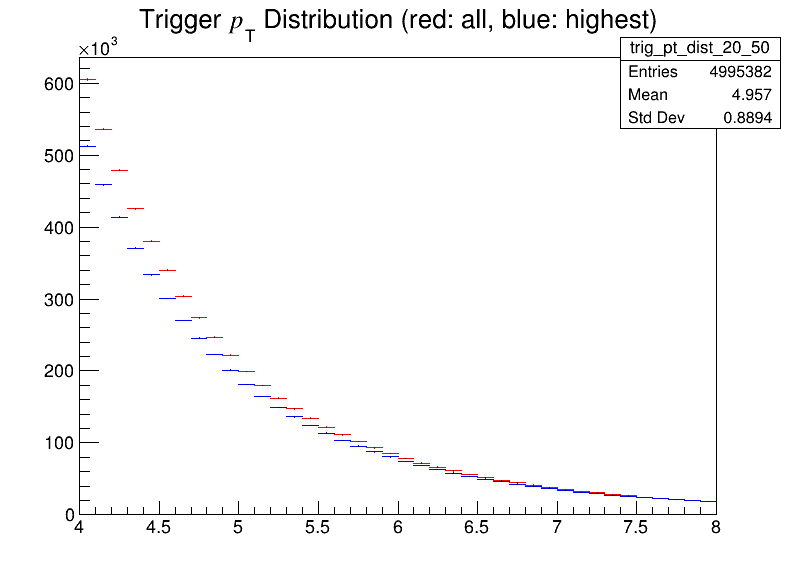

In [565]:
trig_pt_dist_20_50.Draw()
trig_pt_dist_20_50_highest_pt.SetLineColor(rt.kBlue)
trig_pt_dist_20_50_highest_pt.Draw("SAME")
c.Draw()

In [566]:
trig_pt_dist_20_50.Scale(1/num_trigs_20_50)
trig_pt_dist_20_50_highest_pt.Scale(1/num_trigs_20_50_highest_pt)

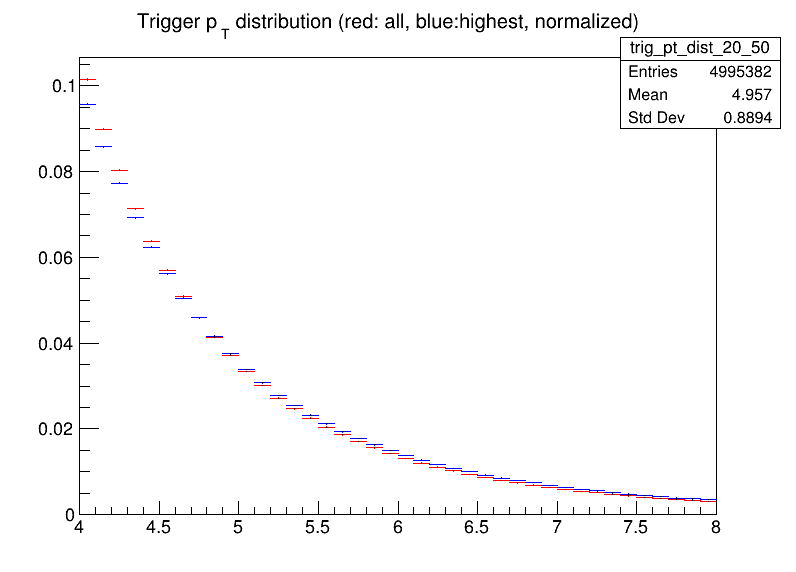

In [567]:
trig_pt_dist_20_50.SetTitle("Trigger p_{T} distribution (red: all, blue:highest, normalized)")
trig_pt_dist_20_50.Draw()
trig_pt_dist_20_50_highest_pt.SetLineColor(rt.kBlue)
trig_pt_dist_20_50_highest_pt.Draw("SAME")
c.Draw()

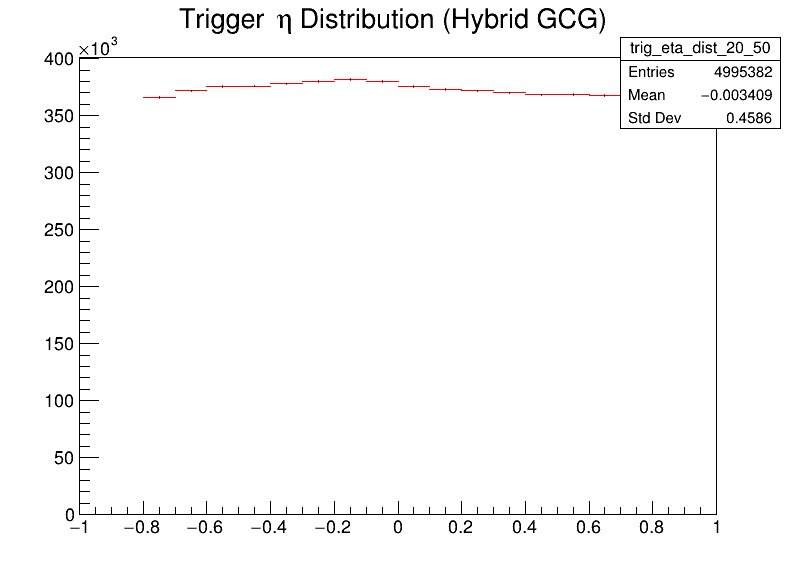

In [568]:
trig_eta_dist_20_50.Draw()
c.Draw()

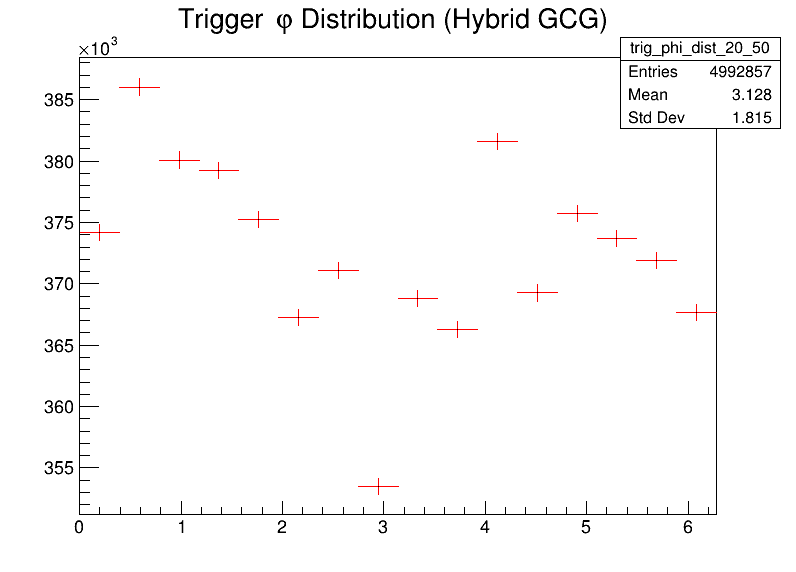

In [569]:
trig_phi_dist_20_50.Draw()
c.Draw()

### Signal analysis section

In [570]:
# eta cuts first
lambda_dist_20_50.GetAxis(2).SetRangeUser(-0.8, 0.8)
lambda_mass_dist_20_50 = lambda_dist_20_50.Projection(3).Clone("lambda_mass_dist_20_50")

Warning in <TROOT::Append>: Replacing existing TH1: fTriggeredLambdaDist_proj_3 (Potential memory leak).


In [571]:
lambda_mass_dist_20_50.SetTitle("#Lambda^{0} invariant mass distribution (p-#pi)")
lambda_mass_dist_20_50.Sumw2()
lambda_mass_dist_20_50.SetLineWidth(2)
lambda_mass_dist_20_50.GetXaxis().SetTitle("Mass (GeV/c^{2})")
lambda_mass_dist_20_50.GetYaxis().SetTitle("#frac{dN_{p-#pi}}{dM}")

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


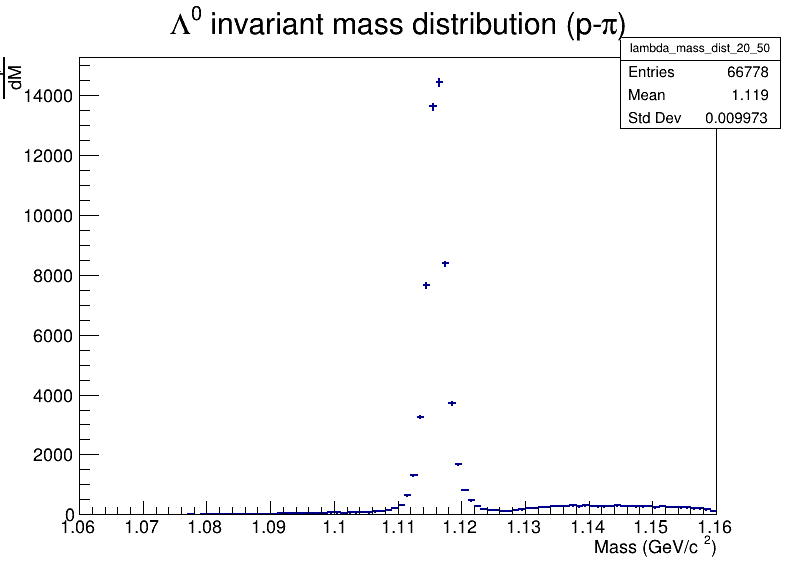

In [572]:
lambda_mass_dist_20_50.Draw()
c.Draw()

In [573]:
bin_1 = lambda_mass_dist_20_50.FindBin(1.09)
bin_2 = lambda_mass_dist_20_50.FindBin(1.15)
bin_3 = lambda_mass_dist_20_50.FindBin(1.16 - EPSILON)
point_one = [1.09, lambda_mass_dist_20_50.GetBinContent(bin_1)]
point_two = [1.15, lambda_mass_dist_20_50.GetBinContent(bin_2)]
point_three = [1.16, lambda_mass_dist_20_50.GetBinContent(bin_3)]
bg_starting_params_20_50 = get_parabola(point_one, point_two, point_three)

In [574]:
lambda_mass_fit_20_50 = rt.TF1("lambda_mass_fit_20_50", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol2(4)", 1.09, 1.155)
lambda_mass_fit_20_50.SetNpx(1000)
lambda_mass_fit_20_50.SetParameter(0, 1.36753e01)
lambda_mass_fit_20_50.FixParameter(1, 1.1162)
lambda_mass_fit_20_50.SetParameter(2, 1.00576e-05 )
lambda_mass_fit_20_50.SetParameter(3, 6.04166e-03)
lambda_mass_fit_20_50.SetParameter(4, bg_starting_params_20_50[0])
lambda_mass_fit_20_50.SetParameter(5, bg_starting_params_20_50[1])
lambda_mass_fit_20_50.SetParameter(6, bg_starting_params_20_50[2])

 FCN=1838.86 FROM MIGRAD    STATUS=FAILED       1276 CALLS        1277 TOTAL
                     EDM=0.131196    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.28405e+01   2.27678e-01  -0.00000e+00  -2.72150e-01
   2  p1           1.11620e+00     fixed    
   3  p2           1.57521e-03   7.40234e-06  -0.00000e+00  -1.88031e+04
   4  p3           2.37536e-08   6.26649e-13   0.00000e+00  -8.01579e+11
   5  p4          -4.64736e+04   6.22008e+03  -0.00000e+00  -2.90701e-02
   6  p5           7.88557e+04   1.11264e+04   0.00000e+00  -3.56731e-02
   7  p6          -3.32229e+04   4.97396e+03  -0.00000e+00  -4.34510e-02


Warning in <Fit>: Abnormal termination of minimization.


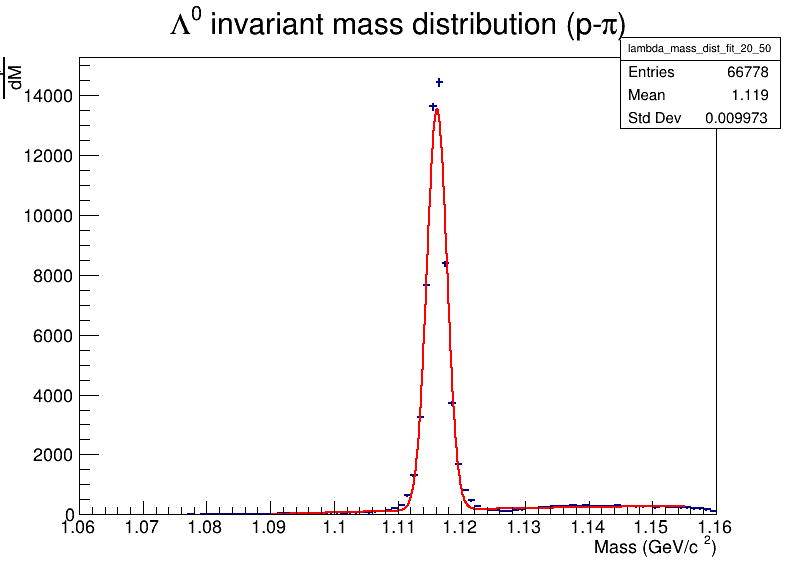

In [575]:
lambda_mass_dist_fit_20_50 = lambda_mass_dist_20_50.Clone("lambda_mass_dist_fit_20_50")
lambda_mass_dist_fit_20_50.Fit(lambda_mass_fit_20_50, "RS")
lambda_mass_dist_fit_20_50.Draw()
c.Draw()

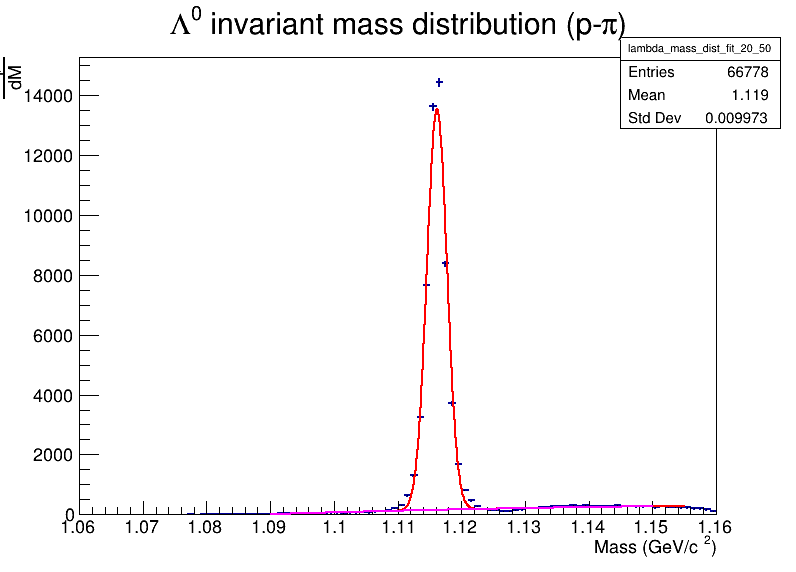

In [576]:
bg_fit_20_50 = rt.TF1("bg_fit_20_50", "pol2", 1.09, 1.15)
bg_fit_20_50.SetParameter(0, lambda_mass_fit_20_50.GetParameter(4))
bg_fit_20_50.SetParameter(1, lambda_mass_fit_20_50.GetParameter(5))
bg_fit_20_50.SetParameter(2, lambda_mass_fit_20_50.GetParameter(6))
bg_fit_20_50.SetNpx(1000)
bg_fit_20_50.SetLineColor(rt.kMagenta)
lambda_mass_dist_fit_20_50.Draw()
bg_fit_20_50.Draw("SAME")
c.Draw()

In [577]:
left_signal_bin_20_50 = lambda_mass_dist_fit_20_50.FindBin(SIG_MIN)
right_signal_bin_20_50 = lambda_mass_dist_fit_20_50.FindBin(SIG_MAX)

lambda_bg_20_50 = 0
lambda_total_20_50 = 0
for bin_num in range(left_signal_bin_20_50, right_signal_bin_20_50 + 1):
    bin_center = lambda_mass_dist_fit_20_50.GetBinCenter(bin_num)
    lambda_bg_20_50 += bg_fit_20_50.Eval(bin_center)
    lambda_total_20_50 += lambda_mass_dist_fit_20_50.GetBinContent(bin_num)

lambda_signal_20_50 = lambda_total_20_50 - lambda_bg_20_50
lambda_signal_total_ratio_20_50 = lambda_signal_20_50/lambda_total_20_50
lambda_signal_bg_ratio_20_50 = lambda_signal_20_50/lambda_bg_20_50
print(f"The 0-20 lambda signal is: {lambda_signal_20_50}")
print(f"The 0-20 lambda background is: {lambda_bg_20_50}")
print(f"The 0-20 lambda S/B is: {lambda_signal_bg_ratio_20_50}")
print(f"The 0-20 lambda S/T is: {lambda_signal_total_ratio_20_50}")
print(f"The 0-20 lambda significance is: {lambda_signal_20_50/math.sqrt(lambda_signal_20_50 + lambda_bg_20_50)}")

The 0-20 lambda signal is: 54753.738291956506
The 0-20 lambda background is: 2416.261708043494
The 0-20 lambda S/B is: 22.660516495248334
The 0-20 lambda S/T is: 0.9577354957487582
The 0-20 lambda significance is: 228.9969403445049


### Mixed event correction section

In [578]:
axes = arr.array('i', [2, 3, 4, 5])
h_lambda_20_50 = h_lambda_20_50.Projection(4, axes)
h_lambda_20_50_highest_pt = h_lambda_20_50_highest_pt.Projection(4, axes)
h_lambda_mixed_20_50 = h_lambda_mixed_20_50.Projection(4, axes)
h_lambda_mixed_20_50_highest_pt = h_lambda_mixed_20_50_highest_pt.Projection(4, axes)

In [579]:
h_h_20_50 = h_h_20_50.Projection(2, 3, 4)
h_h_20_50_highest_pt = h_h_20_50_highest_pt.Projection(2, 3, 4)
h_h_mixed_20_50 = h_h_mixed_20_50.Projection(2, 3, 4)
h_h_mixed_20_50_highest_pt = h_h_mixed_20_50_highest_pt.Projection(2, 3, 4)

Warning in <TROOT::Append>: Replacing existing TH1: fDphiHHEff_proj_2_3_4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHHEff_highestPt_proj_2_3_4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHHMixed_proj_2_3_4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHHMixed_highestPt_proj_2_3_4 (Potential memory leak).


In [580]:
# Setting up 2-d correlation plots before the mixed event correction
h_lambda_2d_nomixcor_20_50 = h_lambda_20_50.Projection(0, 1).Clone("h_lambda_2d_nomixcor_20_50")
h_lambda_2d_nomixcor_20_50_highest_pt = h_lambda_20_50_highest_pt.Projection(0, 1).Clone("h_lambda_2d_nomixcor_20_50_highest_pt")
h_lambda_mixed_2d_20_50 = h_lambda_mixed_20_50.Projection(0, 1).Clone("h_lambda_mixed_2d_20_50")
h_lambda_mixed_2d_20_50_highest_pt = h_lambda_mixed_20_50_highest_pt.Projection(0, 1).Clone("h_lambda_mixed_2d_20_50_highest_pt")

Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaEff_proj_2_3_4_5_proj_1_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaEff_highestPt_proj_2_3_4_5_proj_1_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaMixed_proj_2_3_4_5_proj_1_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaMixed_highestPt_proj_2_3_4_5_proj_1_0 (Potential memory leak).


In [581]:
h_h_2d_nomixcor_20_50 = h_h_20_50_highest_pt.Project3D("xye").Clone("h_h_2d_nomixcor_20_50")
h_h_2d_nomixcor_20_50_highest_pt = h_h_20_50_highest_pt.Project3D("xye").Clone("h_h_2d_nomixcor_20_50_highest_pt")
h_h_mixed_2d_20_50 = h_h_mixed_20_50.Project3D("xye").Clone("h_h_mixed_2d_20_50")
h_h_mixed_2d_20_50_highest_pt = h_h_mixed_20_50_highest_pt.Project3D("xye").Clone("h_h_mixed_2d_20_50_highest_pt")

In [582]:
h_lambda_2d_nomixcor_20_50.SetTitle("h-#Lambda^{0} #Delta#varphi#Delta#eta (no acceptance correction)")
h_lambda_2d_nomixcor_20_50.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_2d_nomixcor_20_50.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_2d_nomixcor_20_50.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_20_50.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_nomixcor_20_50.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_20_50.GetYaxis().SetTitleOffset(1.3)

h_lambda_mixed_2d_20_50.SetTitle("Mixed-event h-#Lambda^{0} #Delta#varphi#Delta#eta")
h_lambda_mixed_2d_20_50.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_mixed_2d_20_50.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_mixed_2d_20_50.GetXaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_20_50.GetXaxis().SetTitleOffset(1.3)
h_lambda_mixed_2d_20_50.GetYaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_20_50.GetYaxis().SetTitleOffset(1.3)

h_lambda_2d_nomixcor_20_50_highest_pt.SetTitle("h-#Lambda^{0} #Delta#varphi#Delta#eta (no acceptance correction, highest p_{t} trigger)")
h_lambda_2d_nomixcor_20_50_highest_pt.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_2d_nomixcor_20_50_highest_pt.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_2d_nomixcor_20_50_highest_pt.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_20_50_highest_pt.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_nomixcor_20_50_highest_pt.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_20_50_highest_pt.GetYaxis().SetTitleOffset(1.3)

h_lambda_mixed_2d_20_50_highest_pt.SetTitle("Mixed-event h-#Lambda^{0} #Delta#varphi#Delta#eta (highest p_{T} trigger)")
h_lambda_mixed_2d_20_50_highest_pt.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_mixed_2d_20_50_highest_pt.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_mixed_2d_20_50_highest_pt.GetXaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_20_50_highest_pt.GetXaxis().SetTitleOffset(1.3)
h_lambda_mixed_2d_20_50_highest_pt.GetYaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_20_50_highest_pt.GetYaxis().SetTitleOffset(1.3)

In [583]:
h_h_2d_nomixcor_20_50.SetTitle("h-h #Delta#varphi#Delta#eta (no acceptance correction)")
h_h_2d_nomixcor_20_50.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_h_2d_nomixcor_20_50.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_h_2d_nomixcor_20_50.GetXaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_20_50.GetXaxis().SetTitleOffset(1.3)
h_h_2d_nomixcor_20_50.GetYaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_20_50.GetYaxis().SetTitleOffset(1.3)

h_h_mixed_2d_20_50.SetTitle("Mixed-event h-h #Delta#varphi#Delta#eta")
h_h_mixed_2d_20_50.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_h_mixed_2d_20_50.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_h_mixed_2d_20_50.GetXaxis().SetTitleSize(0.05)
h_h_mixed_2d_20_50.GetXaxis().SetTitleOffset(1.3)
h_h_mixed_2d_20_50.GetYaxis().SetTitleSize(0.05)
h_h_mixed_2d_20_50.GetYaxis().SetTitleOffset(1.3)

h_h_2d_nomixcor_20_50_highest_pt.SetTitle("h-h #Delta#varphi#Delta#eta (no acceptance correction, highest p_{T} trigger)")
h_h_2d_nomixcor_20_50_highest_pt.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_h_2d_nomixcor_20_50_highest_pt.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_h_2d_nomixcor_20_50_highest_pt.GetXaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_20_50_highest_pt.GetXaxis().SetTitleOffset(1.3)
h_h_2d_nomixcor_20_50_highest_pt.GetYaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_20_50_highest_pt.GetYaxis().SetTitleOffset(1.3)

h_h_mixed_2d_20_50_highest_pt.SetTitle("Mixed-event h-h #Delta#varphi#Delta#eta")
h_h_mixed_2d_20_50_highest_pt.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_h_mixed_2d_20_50_highest_pt.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_h_mixed_2d_20_50_highest_pt.GetXaxis().SetTitleSize(0.05)
h_h_mixed_2d_20_50_highest_pt.GetXaxis().SetTitleOffset(1.3)
h_h_mixed_2d_20_50_highest_pt.GetYaxis().SetTitleSize(0.05)
h_h_mixed_2d_20_50_highest_pt.GetYaxis().SetTitleOffset(1.3)

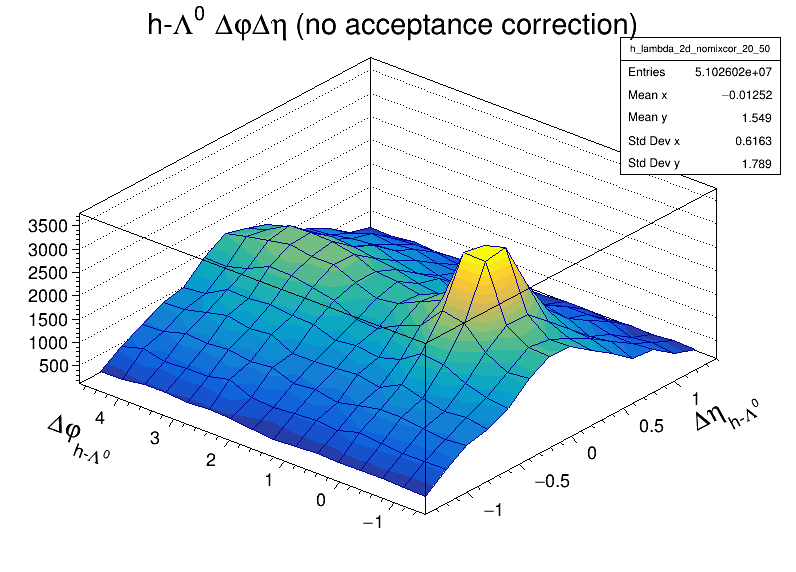

In [584]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_nomixcor_20_50.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_2d_nomixcor_20_50.Draw("SURF1")
c.Draw()

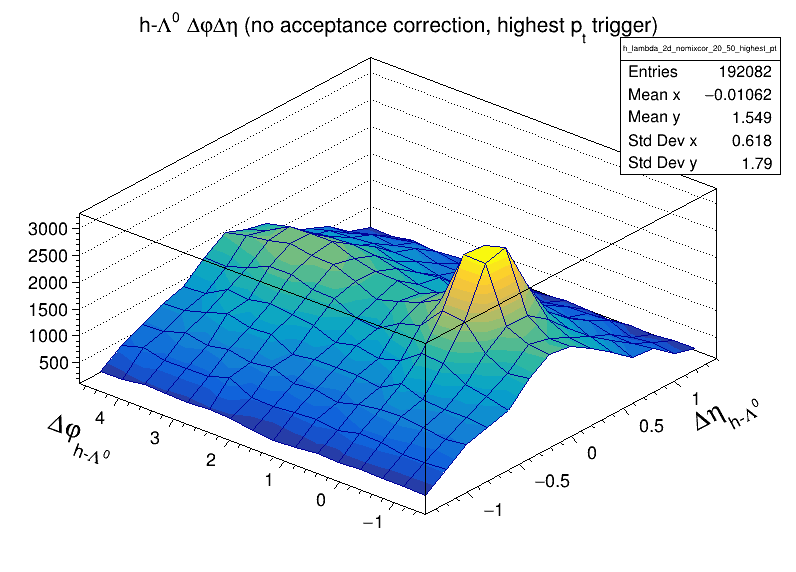

In [585]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_nomixcor_20_50_highest_pt.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_2d_nomixcor_20_50_highest_pt.Draw("SURF1")
c.Draw()

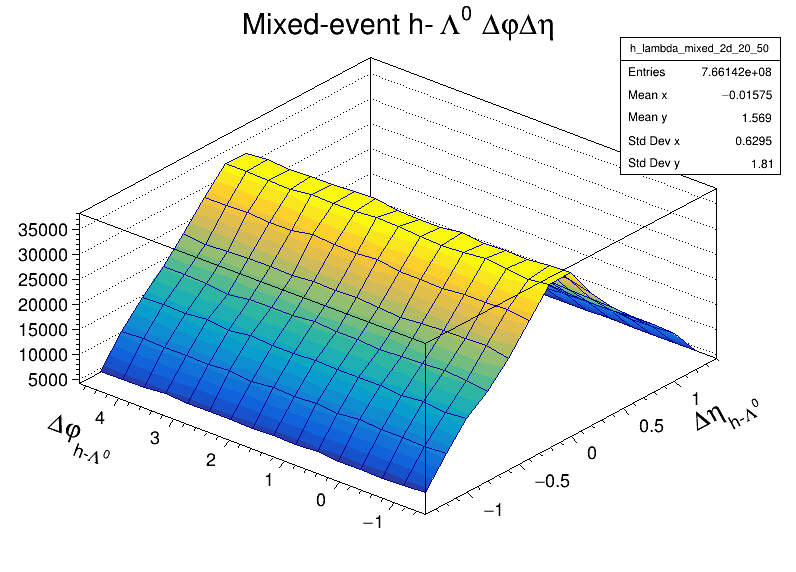

In [586]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_mixed_2d_20_50.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_mixed_2d_20_50.Draw("SURF1")
c.Draw()

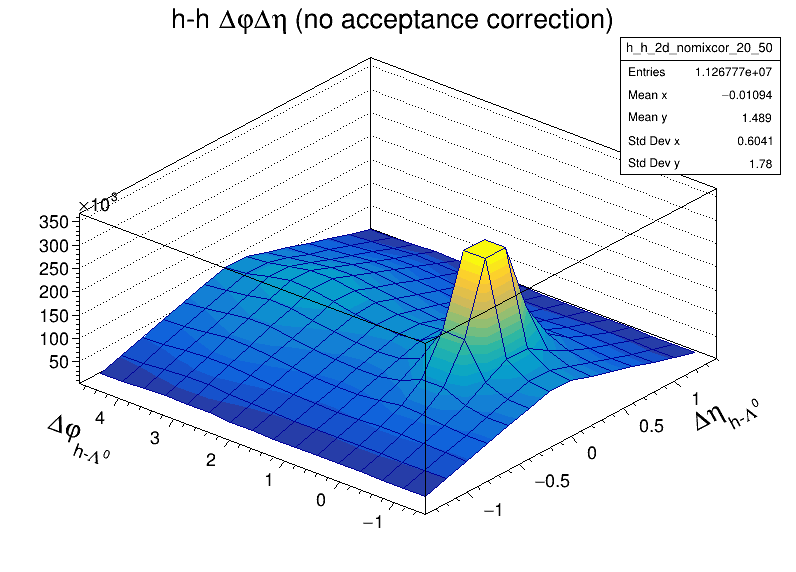

In [587]:
c.SetTheta(50)
c.SetPhi(50)
h_h_2d_nomixcor_20_50.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_2d_nomixcor_20_50.Draw("SURF1")
c.Draw()

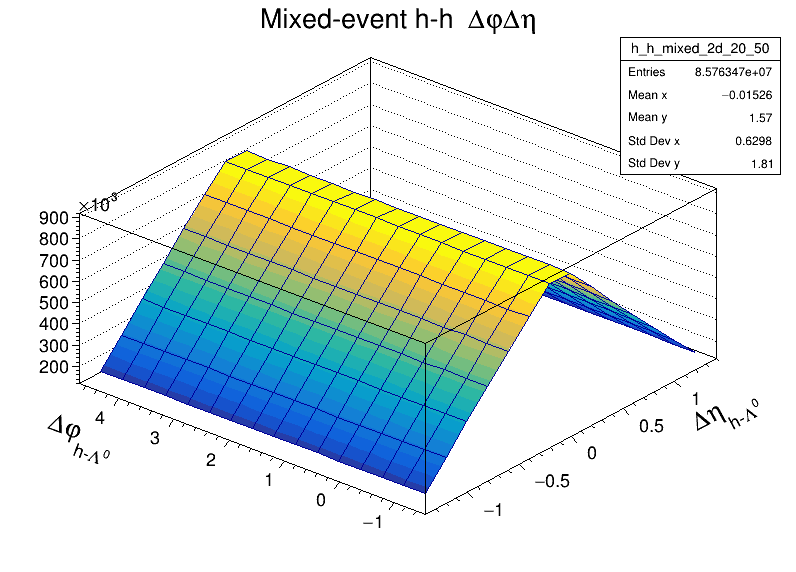

In [588]:
c.SetTheta(50)
c.SetPhi(50)
h_h_mixed_2d_20_50.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_mixed_2d_20_50.Draw("SURF1")
c.Draw()

In [589]:
h_lambda_2d_mixcor_sig_20_50 = make_mixed_corrections(h_lambda_20_50, h_lambda_mixed_20_50, SIG_MIN, SIG_MAX)

Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaEff_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaMixed_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created


In [590]:
h_lambda_2d_mixcor_sig_20_50_highest_pt = make_mixed_corrections(h_lambda_20_50_highest_pt, h_lambda_mixed_20_50_highest_pt, SIG_MIN, SIG_MAX)

Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaEff_highestPt_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaMixed_highestPt_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created


In [591]:
h_h_2d_mixcor_20_50 = make_mixed_corrections(h_h_20_50, h_h_mixed_20_50, SIG_MIN, SIG_MAX, is_hh=True)
h_h_2d_mixcor_20_50_highest_pt = make_mixed_corrections(h_h_20_50_highest_pt, h_h_mixed_20_50_highest_pt, SIG_MIN, SIG_MAX, is_hh=True)

Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created


In [592]:
h_lambda_2d_mixcor_sig_20_50.SetTitle("h-#Lambda^{0} #Delta#varphi#Delta#eta correlation (SIG, acceptance corrected)")
h_lambda_2d_mixcor_sig_20_50.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_2d_mixcor_sig_20_50.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_2d_mixcor_sig_20_50.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_mixcor_sig_20_50.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_mixcor_sig_20_50.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_mixcor_sig_20_50.GetYaxis().SetTitleOffset(1.3)

In [593]:
h_h_2d_mixcor_20_50.SetTitle("h-h #Delta#varphi#Delta#eta correlation (acceptance corrected)")
h_h_2d_mixcor_20_50.GetYaxis().SetTitle("#Delta#varphi_{h-h}")
h_h_2d_mixcor_20_50.GetXaxis().SetTitle("#Delta#eta_{h-h}")
h_h_2d_mixcor_20_50.GetXaxis().SetTitleSize(0.05)
h_h_2d_mixcor_20_50.GetXaxis().SetTitleOffset(1.3)
h_h_2d_mixcor_20_50.GetYaxis().SetTitleSize(0.05)
h_h_2d_mixcor_20_50.GetYaxis().SetTitleOffset(1.3)

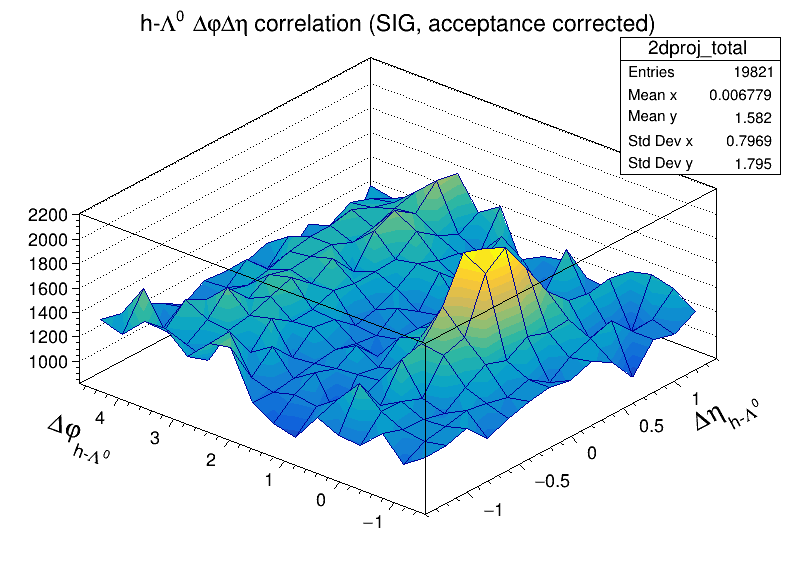

In [594]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_mixcor_sig_20_50.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_2d_mixcor_sig_20_50.Draw("SURF1")
c.Draw()

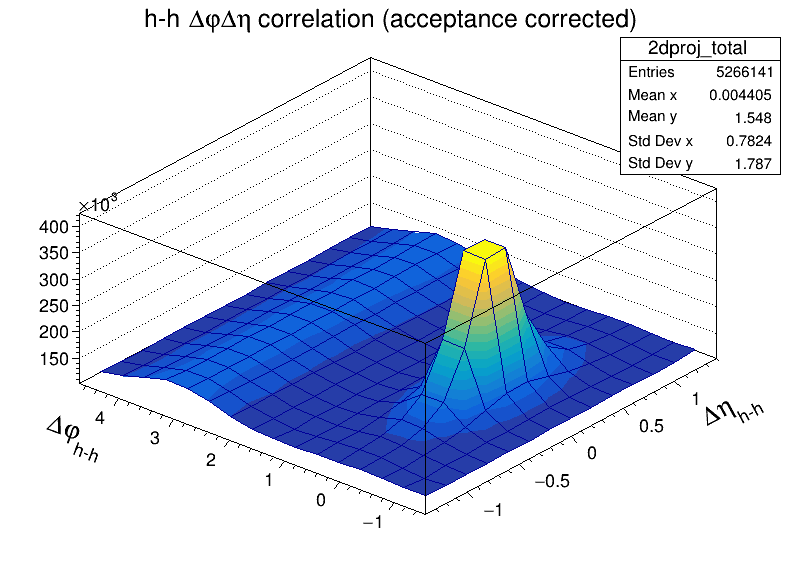

In [595]:
c.SetTheta(50)
c.SetPhi(50)
h_h_2d_mixcor_20_50.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_2d_mixcor_20_50.Draw("SURF1")
c.Draw()

In [596]:
h_lambda_2d_mixcor_sig_20_50_highest_pt.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_2d_mixcor_20_50_highest_pt.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)

In [597]:
# per-trigger normalization done here
h_lambda_2d_mixcor_sig_20_50.Scale(1.0/num_trigs_20_50)
h_lambda_2d_mixcor_sig_20_50_highest_pt.Scale(1.0/num_trigs_20_50_highest_pt)
h_h_2d_mixcor_20_50.Scale(1.0/num_trigs_20_50)
h_h_2d_mixcor_20_50_highest_pt.Scale(1.0/num_trigs_20_50_highest_pt)

In [598]:
h_lambda_2d_subtracted_20_50 = h_lambda_2d_mixcor_sig_20_50
h_lambda_2d_subtracted_20_50_highest_pt = h_lambda_2d_mixcor_sig_20_50_highest_pt

### Integral and ratio section

In [599]:
h_lambda_dphi_subtracted_20_50 = h_lambda_2d_subtracted_20_50.ProjectionY("h_lambda_dphi_subtracted_20_50")
h_lambda_dphi_subtracted_20_50.SetTitle("h-#Lambda^{0} #Delta#varphi distribution (20 - 50 multiplicty bin)")
h_lambda_dphi_subtracted_20_50.SetLineColor(rt.kViolet - 6)
h_lambda_dphi_subtracted_20_50.SetLineWidth(3)
h_lambda_dphi_subtracted_20_50.GetYaxis().SetTitle("#frac{dN_{h-#Lambda^{0}}}{d#Delta#varphi}")
h_lambda_dphi_subtracted_20_50.GetXaxis().SetTitleSize(0.05)
h_lambda_dphi_subtracted_20_50.GetXaxis().SetTitleOffset(0.5)

In [600]:
h_lambda_dphi_subtracted_20_50_highest_pt = h_lambda_2d_subtracted_20_50_highest_pt.ProjectionY("h_lambda_dphi_subtracted_20_50_highest_pt")
h_lambda_dphi_subtracted_20_50_highest_pt.SetTitle("h-#Lambda^{0} #Delta#varphi distribution (20 - 50 multiplicty bin)")
h_lambda_dphi_subtracted_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
h_lambda_dphi_subtracted_20_50_highest_pt.SetLineWidth(3)
h_lambda_dphi_subtracted_20_50_highest_pt.GetYaxis().SetTitle("#frac{dN_{h-#Lambda^{0}}}{d#Delta#varphi}")
h_lambda_dphi_subtracted_20_50_highest_pt.GetXaxis().SetTitleSize(0.05)
h_lambda_dphi_subtracted_20_50_highest_pt.GetXaxis().SetTitleOffset(0.5)

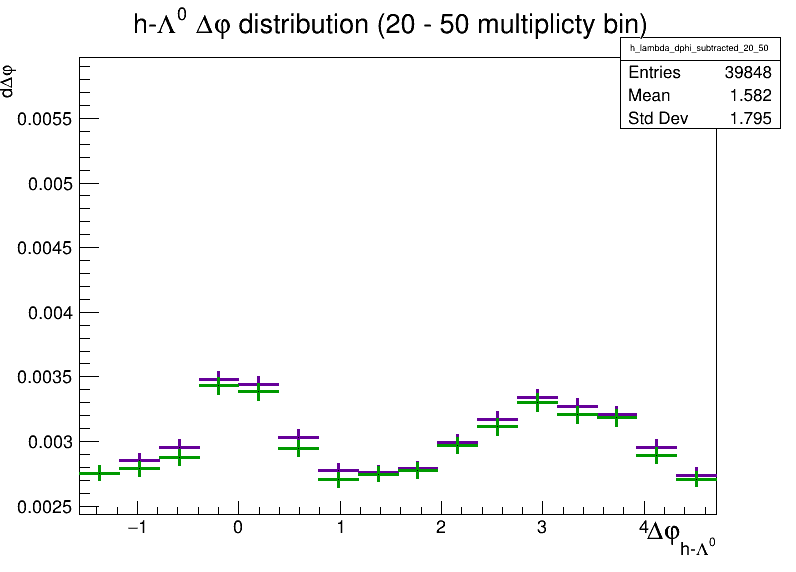

In [601]:
h_lambda_dphi_subtracted_20_50.GetYaxis().SetRangeUser(h_lambda_dphi_subtracted_20_50_highest_pt.GetMinimum()*0.9, 
                                                      h_lambda_dphi_subtracted_20_50.GetMaximum()*1.10)
h_lambda_dphi_subtracted_20_50.Draw()
h_lambda_dphi_subtracted_20_50_highest_pt.SetLineColor(rt.kGreen + 2)
h_lambda_dphi_subtracted_20_50_highest_pt.Draw("SAME")
c.Draw()

In [602]:
if USE_AVG_4:
    ue_line_20_50 = rt.TF1("ue_line_20_50", "pol0", -2, 6)
    ue_upper_line_20_50 = rt.TF1("ue_upper_line_20_50", "pol0", -2, 6)
    ue_lower_line_20_50 = rt.TF1("ue_lower_line_20_50", "pol0", -2, 6)
    zero_line_20_50 = rt.TF1("zero_line_20_50", "pol0", -2, 6)
    zero_upper_line_20_50 = rt.TF1("zero_upper_line_20_50", "pol0", -2, 6)
    zero_lower_line_20_50 = rt.TF1("zero_lower_line_20_50", "pol0", -2, 6)
    ue_avg_20_50 = (h_lambda_dphi_subtracted_20_50.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_20_50.GetBinContent(8)
                   + h_lambda_dphi_subtracted_20_50.GetBinContent(9)
                   + h_lambda_dphi_subtracted_20_50.GetBinContent(16))/4

    ue_avg_error_20_50 = (1/4)*(math.sqrt(h_lambda_dphi_subtracted_20_50.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_20_50.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_20_50.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_20_50.GetBinError(16)**2))


    ue_line_20_50.SetParameter(0, ue_avg_20_50)
    ue_line_20_50.SetLineColor(rt.kViolet - 6)
    ue_line_20_50.SetLineWidth(3)
    ue_line_20_50.SetLineStyle(rt.kSolid)

    ue_upper_line_20_50.SetParameter(0, ue_avg_20_50 + ue_avg_error_20_50)
    ue_upper_line_20_50.SetLineColor(rt.kViolet - 6)
    ue_upper_line_20_50.SetLineStyle(rt.kDashed)

    ue_lower_line_20_50.SetParameter(0, ue_avg_20_50 - ue_avg_error_20_50)
    ue_lower_line_20_50.SetLineColor(rt.kViolet - 6)
    ue_lower_line_20_50.SetLineStyle(rt.kDashed)

    zero_line_20_50.SetParameter(0, 0)
    zero_line_20_50.SetLineColor(rt.kViolet - 6)
    zero_line_20_50.SetLineWidth(3)
    zero_line_20_50.SetLineStyle(rt.kSolid)
    zero_upper_line_20_50.SetParameter(0, ue_avg_error_20_50)
    zero_upper_line_20_50.SetLineColor(rt.kViolet - 6)
    zero_upper_line_20_50.SetLineStyle(rt.kDashed)
    zero_lower_line_20_50.SetParameter(0, -ue_avg_error_20_50)
    zero_lower_line_20_50.SetLineColor(rt.kViolet - 6)
    zero_lower_line_20_50.SetLineStyle(rt.kDashed)
elif USE_AVG_6:
    ue_line_20_50 = rt.TF1("ue_line_20_50", "pol0", -2, 6)
    ue_upper_line_20_50 = rt.TF1("ue_upper_line_20_50", "pol0", -2, 6)
    ue_lower_line_20_50 = rt.TF1("ue_lower_line_20_50", "pol0", -2, 6)
    zero_line_20_50 = rt.TF1("zero_line_20_50", "pol0", -2, 6)
    zero_upper_line_20_50 = rt.TF1("zero_upper_line_20_50", "pol0", -2, 6)
    zero_lower_line_20_50 = rt.TF1("zero_lower_line_20_50", "pol0", -2, 6)
    ue_avg_20_50 = (h_lambda_dphi_subtracted_20_50.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_20_50.GetBinContent(2)
                   + h_lambda_dphi_subtracted_20_50.GetBinContent(7)
                   + h_lambda_dphi_subtracted_20_50.GetBinContent(8)
                   + h_lambda_dphi_subtracted_20_50.GetBinContent(9)
                   + h_lambda_dphi_subtracted_20_50.GetBinContent(16))/6

    ue_avg_error_20_50 = (1/6)*(math.sqrt(h_lambda_dphi_subtracted_20_50.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_20_50.GetBinError(2)**2
                   + h_lambda_dphi_subtracted_20_50.GetBinError(7)**2
                   + h_lambda_dphi_subtracted_20_50.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_20_50.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_20_50.GetBinError(16)**2))


    ue_line_20_50.SetParameter(0, ue_avg_20_50)
    ue_line_20_50.SetLineColor(rt.kViolet - 6)
    ue_line_20_50.SetLineWidth(3)
    ue_line_20_50.SetLineStyle(rt.kSolid)

    ue_upper_line_20_50.SetParameter(0, ue_avg_20_50 + ue_avg_error_20_50)
    ue_upper_line_20_50.SetLineColor(rt.kViolet - 6)
    ue_upper_line_20_50.SetLineStyle(rt.kDashed)

    ue_lower_line_20_50.SetParameter(0, ue_avg_20_50 - ue_avg_error_20_50)
    ue_lower_line_20_50.SetLineColor(rt.kViolet - 6)
    ue_lower_line_20_50.SetLineStyle(rt.kDashed)

    zero_line_20_50.SetParameter(0, 0)
    zero_line_20_50.SetLineColor(rt.kViolet - 6)
    zero_line_20_50.SetLineWidth(3)
    zero_line_20_50.SetLineStyle(rt.kSolid)
    zero_upper_line_20_50.SetParameter(0, ue_avg_error_20_50)
    zero_upper_line_20_50.SetLineColor(rt.kViolet - 6)
    zero_upper_line_20_50.SetLineStyle(rt.kDashed)
    zero_lower_line_20_50.SetParameter(0, -ue_avg_error_20_50)
    zero_lower_line_20_50.SetLineColor(rt.kViolet - 6)
    zero_lower_line_20_50.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    ue_line_20_50 = rt.TF1("ue_line_20_50", "pol0", -2, 6)
    ue_upper_line_20_50 = rt.TF1("ue_upper_line_20_50", "pol0", -2, 6)
    ue_lower_line_20_50 = rt.TF1("ue_lower_line_20_50", "pol0", -2, 6)
    zero_line_20_50 = rt.TF1("zero_line_20_50", "pol0", -2, 6)
    zero_upper_line_20_50 = rt.TF1("zero_upper_line_20_50", "pol0", -2, 6)
    zero_lower_line_20_50 = rt.TF1("zero_lower_line_20_50", "pol0", -2, 6)
    min_bin = h_lambda_dphi_subtracted_20_50.GetMinimumBin()
    ue_avg_20_50 = h_lambda_dphi_subtracted_20_50.GetBinContent(min_bin)
    ue_avg_error_20_50 = h_lambda_dphi_subtracted_20_50.GetBinError(min_bin)


    ue_line_20_50.SetParameter(0, ue_avg_20_50)
    ue_line_20_50.SetLineColor(rt.kViolet - 6)
    ue_line_20_50.SetLineWidth(3)
    ue_line_20_50.SetLineStyle(rt.kSolid)

    ue_upper_line_20_50.SetParameter(0, ue_avg_20_50 + ue_avg_error_20_50)
    ue_upper_line_20_50.SetLineColor(rt.kViolet - 6)
    ue_upper_line_20_50.SetLineStyle(rt.kDashed)

    ue_lower_line_20_50.SetParameter(0, ue_avg_20_50 - ue_avg_error_20_50)
    ue_lower_line_20_50.SetLineColor(rt.kViolet - 6)
    ue_lower_line_20_50.SetLineStyle(rt.kDashed)

    zero_line_20_50.SetParameter(0, 0)
    zero_line_20_50.SetLineColor(rt.kViolet - 6)
    zero_line_20_50.SetLineWidth(3)
    zero_line_20_50.SetLineStyle(rt.kSolid)
    zero_upper_line_20_50.SetParameter(0, ue_avg_error_20_50)
    zero_upper_line_20_50.SetLineColor(rt.kViolet - 6)
    zero_upper_line_20_50.SetLineStyle(rt.kDashed)
    zero_lower_line_20_50.SetParameter(0, -ue_avg_error_20_50)
    zero_lower_line_20_50.SetLineColor(rt.kViolet - 6)
    zero_lower_line_20_50.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

In [603]:
if USE_AVG_4:
    ue_line_20_50_highest_pt = rt.TF1("ue_line_20_50_highest_pt", "pol0", -2, 6)
    ue_upper_line_20_50_highest_pt = rt.TF1("ue_upper_line_20_50_highest_pt", "pol0", -2, 6)
    ue_lower_line_20_50_highest_pt = rt.TF1("ue_lower_line_20_50_highest_pt", "pol0", -2, 6)
    zero_line_20_50_highest_pt = rt.TF1("zero_line_20_50_highest_pt", "pol0", -2, 6)
    zero_upper_line_20_50_highest_pt = rt.TF1("zero_upper_line_20_50_highest_pt", "pol0", -2, 6)
    zero_lower_line_20_50_highest_pt = rt.TF1("zero_lower_line_20_50_highest_pt", "pol0", -2, 6)
    ue_avg_20_50_highest_pt = (h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(8)
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(9)
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(16))/4

    ue_avg_error_20_50_highest_pt = (1/4)*(math.sqrt(h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(16)**2))


    ue_line_20_50_highest_pt.SetParameter(0, ue_avg_20_50_highest_pt)
    ue_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_line_20_50_highest_pt.SetLineWidth(3)
    ue_line_20_50_highest_pt.SetLineStyle(rt.kSolid)

    ue_upper_line_20_50_highest_pt.SetParameter(0, ue_avg_20_50_highest_pt + ue_avg_error_20_50_highest_pt)
    ue_upper_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_upper_line_20_50_highest_pt.SetLineStyle(rt.kDashed)

    ue_lower_line_20_50_highest_pt.SetParameter(0, ue_avg_20_50_highest_pt - ue_avg_error_20_50_highest_pt)
    ue_lower_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_lower_line_20_50_highest_pt.SetLineStyle(rt.kDashed)

    zero_line_20_50_highest_pt.SetParameter(0, 0)
    zero_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_line_20_50_highest_pt.SetLineWidth(3)
    zero_line_20_50_highest_pt.SetLineStyle(rt.kSolid)
    zero_upper_line_20_50_highest_pt.SetParameter(0, ue_avg_error_20_50_highest_pt)
    zero_upper_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_upper_line_20_50_highest_pt.SetLineStyle(rt.kDashed)
    zero_lower_line_20_50_highest_pt.SetParameter(0, -ue_avg_error_20_50_highest_pt)
    zero_lower_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_lower_line_20_50_highest_pt.SetLineStyle(rt.kDashed)
elif USE_AVG_6:
    ue_line_20_50_highest_pt = rt.TF1("ue_line_20_50_highest_pt", "pol0", -2, 6)
    ue_upper_line_20_50_highest_pt = rt.TF1("ue_upper_line_20_50_highest_pt", "pol0", -2, 6)
    ue_lower_line_20_50_highest_pt = rt.TF1("ue_lower_line_20_50_highest_pt", "pol0", -2, 6)
    zero_line_20_50_highest_pt = rt.TF1("zero_line_20_50_highest_pt", "pol0", -2, 6)
    zero_upper_line_20_50_highest_pt = rt.TF1("zero_upper_line_20_50_highest_pt", "pol0", -2, 6)
    zero_lower_line_20_50_highest_pt = rt.TF1("zero_lower_line_20_50_highest_pt", "pol0", -2, 6)
    ue_avg_20_50_highest_pt = (h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(2)
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(7)
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(8)
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(9)
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(16))/6

    ue_avg_error_20_50_highest_pt = (1/6)*(math.sqrt(h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(2)**2
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(7)**2
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(16)**2))


    ue_line_20_50_highest_pt.SetParameter(0, ue_avg_20_50_highest_pt)
    ue_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_line_20_50_highest_pt.SetLineWidth(3)
    ue_line_20_50_highest_pt.SetLineStyle(rt.kSolid)

    ue_upper_line_20_50_highest_pt.SetParameter(0, ue_avg_20_50_highest_pt + ue_avg_error_20_50_highest_pt)
    ue_upper_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_upper_line_20_50_highest_pt.SetLineStyle(rt.kDashed)

    ue_lower_line_20_50_highest_pt.SetParameter(0, ue_avg_20_50_highest_pt - ue_avg_error_20_50_highest_pt)
    ue_lower_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_lower_line_20_50_highest_pt.SetLineStyle(rt.kDashed)

    zero_line_20_50_highest_pt.SetParameter(0, 0)
    zero_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_line_20_50_highest_pt.SetLineWidth(3)
    zero_line_20_50_highest_pt.SetLineStyle(rt.kSolid)
    zero_upper_line_20_50_highest_pt.SetParameter(0, ue_avg_error_20_50_highest_pt)
    zero_upper_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_upper_line_20_50_highest_pt.SetLineStyle(rt.kDashed)
    zero_lower_line_20_50_highest_pt.SetParameter(0, -ue_avg_error_20_50_highest_pt)
    zero_lower_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_lower_line_20_50_highest_pt.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    ue_line_20_50_highest_pt = rt.TF1("ue_line_20_50_highest_pt", "pol0", -2, 6)
    ue_upper_line_20_50_highest_pt = rt.TF1("ue_upper_line_20_50_highest_pt", "pol0", -2, 6)
    ue_lower_line_20_50_highest_pt = rt.TF1("ue_lower_line_20_50_highest_pt", "pol0", -2, 6)
    zero_line_20_50_highest_pt = rt.TF1("zero_line_20_50_highest_pt", "pol0", -2, 6)
    zero_upper_line_20_50_highest_pt = rt.TF1("zero_upper_line_20_50_highest_pt", "pol0", -2, 6)
    zero_lower_line_20_50_highest_pt = rt.TF1("zero_lower_line_20_50_highest_pt", "pol0", -2, 6)
    min_bin = h_lambda_dphi_subtracted_20_50_highest_pt.GetMinimumBin()
    ue_avg_20_50_highest_pt = h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(min_bin)
    ue_avg_error_20_50_highest_pt = h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(min_bin)


    ue_line_20_50_highest_pt.SetParameter(0, ue_avg_20_50_highest_pt)
    ue_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_line_20_50_highest_pt.SetLineWidth(3)
    ue_line_20_50_highest_pt.SetLineStyle(rt.kSolid)

    ue_upper_line_20_50_highest_pt.SetParameter(0, ue_avg_20_50_highest_pt + ue_avg_error_20_50_highest_pt)
    ue_upper_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_upper_line_20_50_highest_pt.SetLineStyle(rt.kDashed)

    ue_lower_line_20_50_highest_pt.SetParameter(0, ue_avg_20_50_highest_pt - ue_avg_error_20_50_highest_pt)
    ue_lower_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_lower_line_20_50_highest_pt.SetLineStyle(rt.kDashed)

    zero_line_20_50_highest_pt.SetParameter(0, 0)
    zero_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_line_20_50_highest_pt.SetLineWidth(3)
    zero_line_20_50_highest_pt.SetLineStyle(rt.kSolid)
    zero_upper_line_20_50_highest_pt.SetParameter(0, ue_avg_error_20_50_highest_pt)
    zero_upper_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_upper_line_20_50_highest_pt.SetLineStyle(rt.kDashed)
    zero_lower_line_20_50_highest_pt.SetParameter(0, -ue_avg_error_20_50_highest_pt)
    zero_lower_line_20_50_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_lower_line_20_50_highest_pt.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

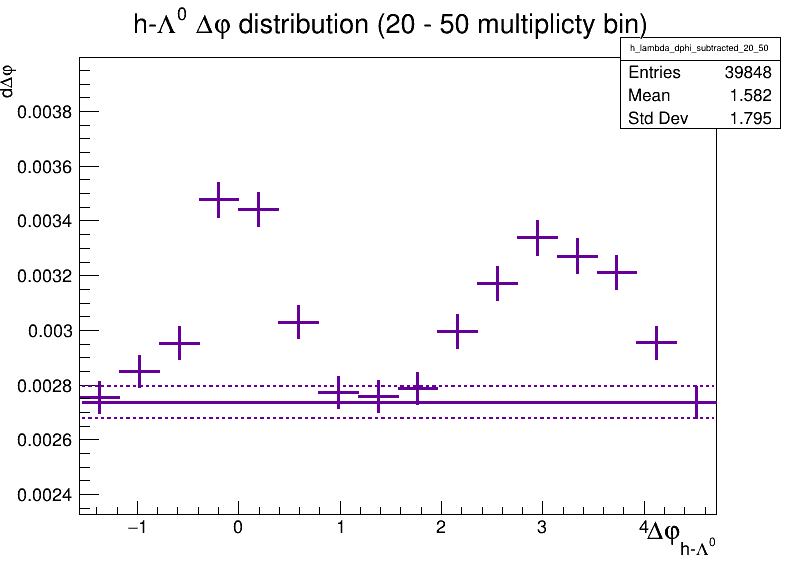

In [604]:
min_bin = h_lambda_dphi_subtracted_20_50.GetMinimumBin()
min_val = h_lambda_dphi_subtracted_20_50.GetBinContent(min_bin)
max_bin = h_lambda_dphi_subtracted_20_50.GetMaximumBin()
max_val = h_lambda_dphi_subtracted_20_50.GetBinContent(max_bin)

h_lambda_dphi_subtracted_20_50.GetYaxis().SetRangeUser(0.85*min_val, 1.15*max_val)
h_lambda_dphi_subtracted_20_50.Draw()
ue_line_20_50.Draw("SAME")
ue_upper_line_20_50.Draw("SAME")
ue_lower_line_20_50.Draw("SAME")
c.Draw()

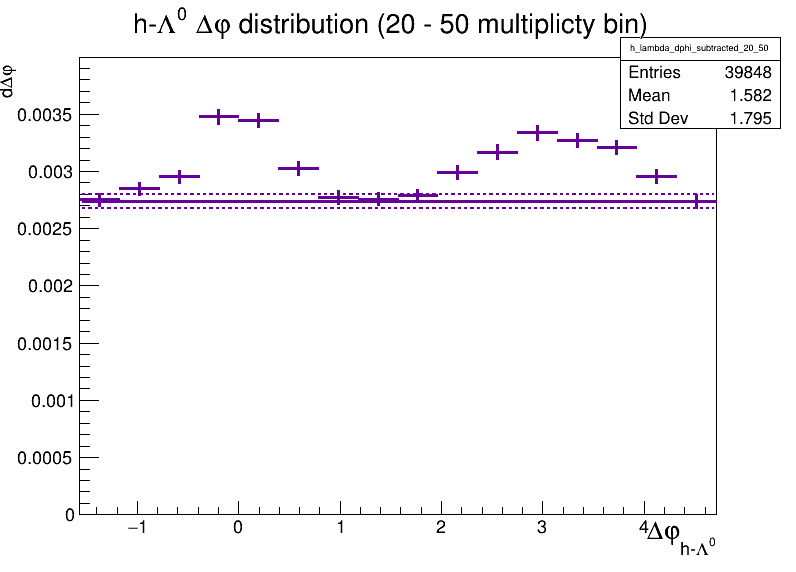

In [605]:
h_lambda_dphi_subtracted_20_50.GetYaxis().SetRangeUser(0, 1.15*max_val)
h_lambda_dphi_subtracted_20_50.Draw()
ue_line_20_50.Draw("SAME")
ue_upper_line_20_50.Draw("SAME")
ue_lower_line_20_50.Draw("SAME")
c.Draw()

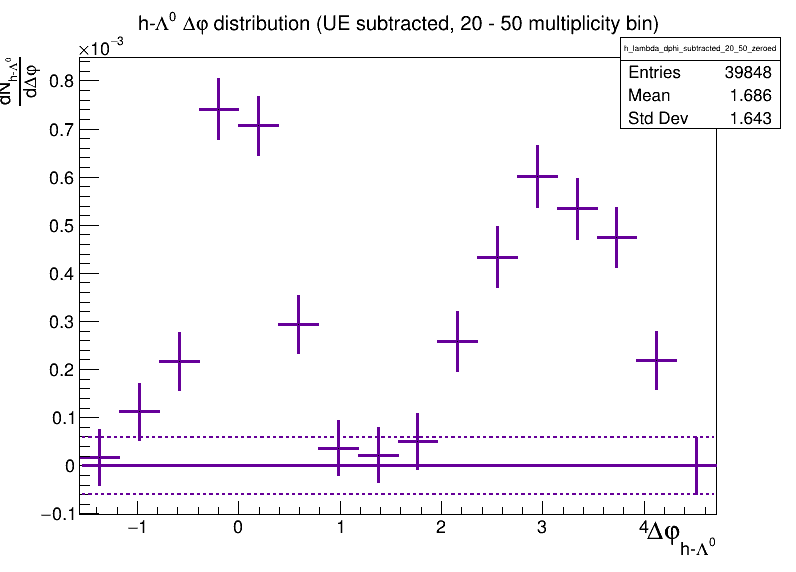

In [606]:
h_lambda_dphi_subtracted_20_50_zeroed = h_lambda_dphi_subtracted_20_50.Clone("h_lambda_dphi_subtracted_20_50_zeroed")
h_lambda_dphi_subtracted_20_50_zeroed.SetTitle("h-#Lambda^{0} #Delta#varphi distribution (UE subtracted, 20 - 50 multiplicity bin)")
h_lambda_dphi_subtracted_20_50_zeroed.Add(ue_line_20_50, -1)
h_lambda_dphi_subtracted_20_50_zeroed.Draw()
zero_line_20_50.Draw("SAME")
zero_upper_line_20_50.Draw("SAME")
zero_lower_line_20_50.Draw("SAME")
c.Draw()

In [607]:
DPHI_BINS = h_lambda_dphi_subtracted_20_50.GetNbinsX()

In [608]:
h_lambda_total_integral_20_50 = 0
h_lambda_near_integral_20_50 = 0
h_lambda_away_integral_20_50 = 0
h_lambda_ue_integral_20_50 = ue_avg_20_50*DPHI_BINS

h_lambda_total_integral_error_20_50 = 0
h_lambda_near_integral_error_20_50 = 0
h_lambda_away_integral_error_20_50 = 0
h_lambda_ue_integral_error_20_50 = ue_avg_error_20_50*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_lambda_total_integral_20_50 += h_lambda_dphi_subtracted_20_50.GetBinContent(bin_num)
    h_lambda_total_integral_error_20_50 += h_lambda_dphi_subtracted_20_50.GetBinError(bin_num)**2
    part = h_lambda_dphi_subtracted_20_50.GetBinContent(bin_num) - ue_avg_20_50
    if part < 0:
        continue
    if bin_num < 9:
        h_lambda_near_integral_20_50 += part
        h_lambda_near_integral_error_20_50 += h_lambda_dphi_subtracted_20_50.GetBinError(bin_num)**2
        h_lambda_near_integral_error_20_50 += ue_avg_error_20_50**2
    else:
        h_lambda_away_integral_20_50 += part
        h_lambda_away_integral_error_20_50 += h_lambda_dphi_subtracted_20_50.GetBinError(bin_num)**2
        h_lambda_away_integral_error_20_50 += ue_avg_error_20_50**2
h_lambda_total_integral_error_20_50 = math.sqrt(h_lambda_total_integral_error_20_50)
h_lambda_near_integral_error_20_50 = math.sqrt(h_lambda_near_integral_error_20_50)
h_lambda_away_integral_error_20_50 = math.sqrt(h_lambda_away_integral_error_20_50)

In [609]:
h_lambda_total_integral_20_50_highest_pt = 0
h_lambda_near_integral_20_50_highest_pt = 0
h_lambda_away_integral_20_50_highest_pt = 0
h_lambda_ue_integral_20_50_highest_pt = ue_avg_20_50_highest_pt*DPHI_BINS

h_lambda_total_integral_error_20_50_highest_pt = 0
h_lambda_near_integral_error_20_50_highest_pt = 0
h_lambda_away_integral_error_20_50_highest_pt = 0
h_lambda_ue_integral_error_20_50_highest_pt = ue_avg_error_20_50_highest_pt*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_lambda_total_integral_20_50_highest_pt += h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(bin_num)
    h_lambda_total_integral_error_20_50_highest_pt += h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(bin_num)**2
    part = h_lambda_dphi_subtracted_20_50_highest_pt.GetBinContent(bin_num) - ue_avg_20_50_highest_pt
    if part < 0:
        continue
    if bin_num < 9:
        h_lambda_near_integral_20_50_highest_pt += part 
        h_lambda_near_integral_error_20_50_highest_pt += h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(bin_num)**2
        h_lambda_near_integral_error_20_50_highest_pt += ue_avg_error_20_50_highest_pt**2
    else:
        h_lambda_away_integral_20_50_highest_pt += part 
        h_lambda_away_integral_error_20_50_highest_pt += h_lambda_dphi_subtracted_20_50_highest_pt.GetBinError(bin_num)**2
        h_lambda_away_integral_error_20_50_highest_pt += ue_avg_error_20_50_highest_pt**2
h_lambda_total_integral_error_20_50_highest_pt = math.sqrt(h_lambda_total_integral_error_20_50_highest_pt)
h_lambda_near_integral_error_20_50_highest_pt = math.sqrt(h_lambda_near_integral_error_20_50_highest_pt)
h_lambda_away_integral_error_20_50_highest_pt = math.sqrt(h_lambda_away_integral_error_20_50_highest_pt)

In [610]:
h_h_dphi_20_50 = h_h_2d_mixcor_20_50.ProjectionY("h_h_dphi_20_50")
h_h_dphi_20_50.SetTitle("h-h #Delta#varphi distribution (20 - 50 multiplicty bin)")
h_h_dphi_20_50.SetLineColor(rt.kBlue)
h_h_dphi_20_50.SetLineWidth(3)
h_h_dphi_20_50.GetYaxis().SetTitle("#frac{dN_{h-h}}{d#Delta#varphi}")
h_h_dphi_20_50.GetXaxis().SetTitleSize(0.05)
h_h_dphi_20_50.GetXaxis().SetTitleOffset(0.5)

In [611]:
h_h_dphi_20_50_highest_pt = h_h_2d_mixcor_20_50_highest_pt.ProjectionY("h_h_dphi_20_50_highest_pt")
h_h_dphi_20_50_highest_pt.SetTitle("h-h #Delta#varphi distribution (20 - 50 multiplicty bin)")
h_h_dphi_20_50_highest_pt.SetLineColor(rt.kBlue)
h_h_dphi_20_50_highest_pt.SetLineWidth(3)
h_h_dphi_20_50_highest_pt.GetYaxis().SetTitle("#frac{dN_{h-h}}{d#Delta#varphi}")
h_h_dphi_20_50_highest_pt.GetXaxis().SetTitleSize(0.05)
h_h_dphi_20_50_highest_pt.GetXaxis().SetTitleOffset(0.5)

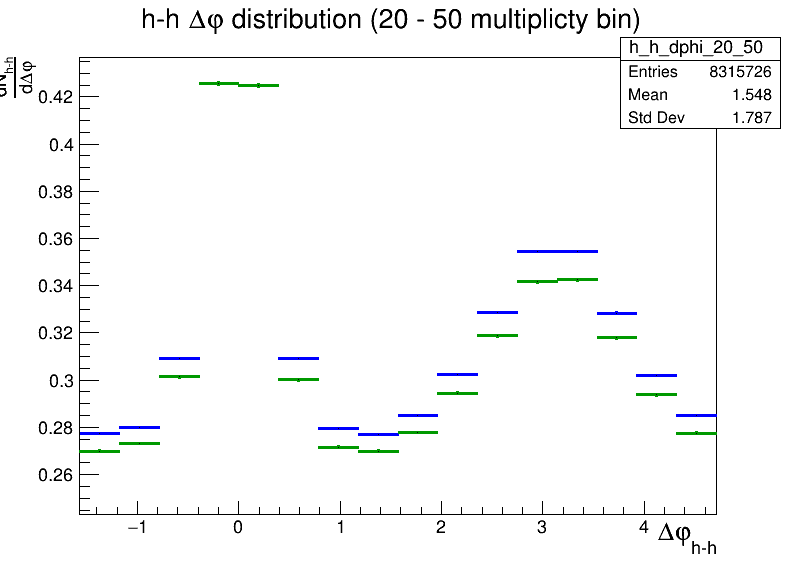

In [612]:
h_h_dphi_20_50.GetYaxis().SetRangeUser(h_h_dphi_20_50_highest_pt.GetMinimum()*0.9, 
                                       h_h_dphi_20_50.GetMaximum()*1.1)
h_h_dphi_20_50_highest_pt.SetLineColor(rt.kGreen + 2)
h_h_dphi_20_50.Draw()
h_h_dphi_20_50_highest_pt.Draw("SAME")
c.Draw()

In [613]:
if USE_AVG_4:
    hh_ue_line_20_50 = rt.TF1("hh_ue_line_20_50", "pol0", -2, 6)
    hh_ue_upper_line_20_50 = rt.TF1("hh_ue_upper_line_20_50", "pol0", -2, 6)
    hh_ue_lower_line_20_50 = rt.TF1("hh_ue_lower_line_20_50", "pol0", -2, 6)
    hh_zero_line_20_50 = rt.TF1("hh_zero_line_20_50", "pol0", -2, 6)
    hh_zero_upper_line_20_50 = rt.TF1("hh_zero_upper_line_20_50", "pol0", -2, 6)
    hh_zero_lower_line_20_50 = rt.TF1("hh_zero_lower_line_20_50", "pol0", -2, 6)
    hh_ue_avg_20_50 = (h_h_dphi_20_50.GetBinContent(1) 
                   + h_h_dphi_20_50.GetBinContent(8)
                   + h_h_dphi_20_50.GetBinContent(9)
                   + h_h_dphi_20_50.GetBinContent(16))/4

    hh_ue_avg_error_20_50 = (1/4)*(math.sqrt(h_h_dphi_20_50.GetBinError(1)**2 
                   + h_h_dphi_20_50.GetBinError(8)**2
                   + h_h_dphi_20_50.GetBinError(9)**2
                   + h_h_dphi_20_50.GetBinError(16)**2))


    hh_ue_line_20_50.SetParameter(0, hh_ue_avg_20_50)
    hh_ue_line_20_50.SetLineColor(rt.kBlue)
    hh_ue_line_20_50.SetLineWidth(3)
    hh_ue_line_20_50.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_20_50.SetParameter(0, hh_ue_avg_20_50 + hh_ue_avg_error_20_50)
    hh_ue_upper_line_20_50.SetLineColor(rt.kBlue)
    hh_ue_upper_line_20_50.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_20_50.SetParameter(0, hh_ue_avg_20_50 - hh_ue_avg_error_20_50)
    hh_ue_lower_line_20_50.SetLineColor(rt.kBlue)
    hh_ue_lower_line_20_50.SetLineStyle(rt.kDashed)

    hh_zero_line_20_50.SetParameter(0, 0)
    hh_zero_line_20_50.SetLineColor(rt.kBlue)
    hh_zero_line_20_50.SetLineWidth(3)
    hh_zero_line_20_50.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_20_50.SetParameter(0, hh_ue_avg_error_20_50)
    hh_zero_upper_line_20_50.SetLineColor(rt.kBlue)
    hh_zero_upper_line_20_50.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_20_50.SetParameter(0, -hh_ue_avg_error_20_50)
    hh_zero_lower_line_20_50.SetLineColor(rt.kBlue)
    hh_zero_lower_line_20_50.SetLineStyle(rt.kDashed)
elif USE_AVG_6:
    hh_ue_line_20_50 = rt.TF1("hh_ue_line_20_50", "pol0", -2, 6)
    hh_ue_upper_line_20_50 = rt.TF1("hh_ue_upper_line_20_50", "pol0", -2, 6)
    hh_ue_lower_line_20_50 = rt.TF1("hh_ue_lower_line_20_50", "pol0", -2, 6)
    hh_zero_line_20_50 = rt.TF1("hh_zero_line_20_50", "pol0", -2, 6)
    hh_zero_upper_line_20_50 = rt.TF1("hh_zero_upper_line_20_50", "pol0", -2, 6)
    hh_zero_lower_line_20_50 = rt.TF1("hh_zero_lower_line_20_50", "pol0", -2, 6)
    hh_ue_avg_20_50 = (h_h_dphi_20_50.GetBinContent(1) 
                   + h_h_dphi_20_50.GetBinContent(2)
                   + h_h_dphi_20_50.GetBinContent(7)
                   + h_h_dphi_20_50.GetBinContent(8)
                   + h_h_dphi_20_50.GetBinContent(9)
                   + h_h_dphi_20_50.GetBinContent(16))/6

    hh_ue_avg_error_20_50 = (1/6)*(math.sqrt(h_h_dphi_20_50.GetBinError(1)**2 
                   + h_h_dphi_20_50.GetBinError(2)**2
                   + h_h_dphi_20_50.GetBinError(7)**2
                   + h_h_dphi_20_50.GetBinError(8)**2
                   + h_h_dphi_20_50.GetBinError(9)**2
                   + h_h_dphi_20_50.GetBinError(16)**2))


    hh_ue_line_20_50.SetParameter(0, hh_ue_avg_20_50)
    hh_ue_line_20_50.SetLineColor(rt.kBlue)
    hh_ue_line_20_50.SetLineWidth(3)
    hh_ue_line_20_50.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_20_50.SetParameter(0, hh_ue_avg_20_50 + hh_ue_avg_error_20_50)
    hh_ue_upper_line_20_50.SetLineColor(rt.kBlue)
    hh_ue_upper_line_20_50.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_20_50.SetParameter(0, hh_ue_avg_20_50 - hh_ue_avg_error_20_50)
    hh_ue_lower_line_20_50.SetLineColor(rt.kBlue)
    hh_ue_lower_line_20_50.SetLineStyle(rt.kDashed)

    hh_zero_line_20_50.SetParameter(0, 0)
    hh_zero_line_20_50.SetLineColor(rt.kBlue)
    hh_zero_line_20_50.SetLineWidth(3)
    hh_zero_line_20_50.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_20_50.SetParameter(0, hh_ue_avg_error_20_50)
    hh_zero_upper_line_20_50.SetLineColor(rt.kBlue)
    hh_zero_upper_line_20_50.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_20_50.SetParameter(0, -hh_ue_avg_error_20_50)
    hh_zero_lower_line_20_50.SetLineColor(rt.kBlue)
    hh_zero_lower_line_20_50.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    hh_ue_line_20_50 = rt.TF1("hh_ue_line_20_50", "pol0", -2, 6)
    hh_ue_upper_line_20_50 = rt.TF1("hh_ue_upper_line_20_50", "pol0", -2, 6)
    hh_ue_lower_line_20_50 = rt.TF1("hh_ue_lower_line_20_50", "pol0", -2, 6)
    hh_zero_line_20_50 = rt.TF1("hh_zero_line_20_50", "pol0", -2, 6)
    hh_zero_upper_line_20_50 = rt.TF1("hh_zero_upper_line_20_50", "pol0", -2, 6)
    hh_zero_lower_line_20_50 = rt.TF1("hh_zero_lower_line_20_50", "pol0", -2, 6)
    
    min_bin = h_h_dphi_20_50.GetMinimumBin()
    hh_ue_avg_20_50 = h_h_dphi_20_50.GetBinContent(min_bin)
    hh_ue_avg_error_20_50 = h_h_dphi_20_50.GetBinError(min_bin)

    hh_ue_line_20_50.SetParameter(0, hh_ue_avg_20_50)
    hh_ue_line_20_50.SetLineColor(rt.kBlue)
    hh_ue_line_20_50.SetLineWidth(3)
    hh_ue_line_20_50.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_20_50.SetParameter(0, hh_ue_avg_20_50 + hh_ue_avg_error_20_50)
    hh_ue_upper_line_20_50.SetLineColor(rt.kBlue)
    hh_ue_upper_line_20_50.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_20_50.SetParameter(0, hh_ue_avg_20_50 - hh_ue_avg_error_20_50)
    hh_ue_lower_line_20_50.SetLineColor(rt.kBlue)
    hh_ue_lower_line_20_50.SetLineStyle(rt.kDashed)

    hh_zero_line_20_50.SetParameter(0, 0)
    hh_zero_line_20_50.SetLineColor(rt.kBlue)
    hh_zero_line_20_50.SetLineWidth(3)
    hh_zero_line_20_50.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_20_50.SetParameter(0, hh_ue_avg_error_20_50)
    hh_zero_upper_line_20_50.SetLineColor(rt.kBlue)
    hh_zero_upper_line_20_50.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_20_50.SetParameter(0, -hh_ue_avg_error_20_50)
    hh_zero_lower_line_20_50.SetLineColor(rt.kBlue)
    hh_zero_lower_line_20_50.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

In [614]:
if USE_AVG_4:
    hh_ue_line_20_50_highest_pt = rt.TF1("hh_ue_line_20_50_highest_pt", "pol0", -2, 6)
    hh_ue_upper_line_20_50_highest_pt = rt.TF1("hh_ue_upper_line_20_50_highest_pt", "pol0", -2, 6)
    hh_ue_lower_line_20_50_highest_pt = rt.TF1("hh_ue_lower_line_20_50_highest_pt", "pol0", -2, 6)
    hh_zero_line_20_50_highest_pt = rt.TF1("hh_zero_line_20_50_highest_pt", "pol0", -2, 6)
    hh_zero_upper_line_20_50_highest_pt = rt.TF1("hh_zero_upper_line_20_50_highest_pt", "pol0", -2, 6)
    hh_zero_lower_line_20_50_highest_pt = rt.TF1("hh_zero_lower_line_20_50_highest_pt", "pol0", -2, 6)
    hh_ue_avg_20_50_highest_pt = (h_h_dphi_20_50_highest_pt.GetBinContent(1) 
                   + h_h_dphi_20_50_highest_pt.GetBinContent(8)
                   + h_h_dphi_20_50_highest_pt.GetBinContent(9)
                   + h_h_dphi_20_50_highest_pt.GetBinContent(16))/4

    hh_ue_avg_error_20_50_highest_pt = (1/4)*(math.sqrt(h_h_dphi_20_50_highest_pt.GetBinError(1)**2 
                   + h_h_dphi_20_50_highest_pt.GetBinError(8)**2
                   + h_h_dphi_20_50_highest_pt.GetBinError(9)**2
                   + h_h_dphi_20_50_highest_pt.GetBinError(16)**2))


    hh_ue_line_20_50_highest_pt.SetParameter(0, hh_ue_avg_20_50_highest_pt)
    hh_ue_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_line_20_50_highest_pt.SetLineWidth(3)
    hh_ue_line_20_50_highest_pt.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_20_50_highest_pt.SetParameter(0, hh_ue_avg_20_50_highest_pt + hh_ue_avg_error_20_50_highest_pt)
    hh_ue_upper_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_upper_line_20_50_highest_pt.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_20_50_highest_pt.SetParameter(0, hh_ue_avg_20_50_highest_pt - hh_ue_avg_error_20_50_highest_pt)
    hh_ue_lower_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_lower_line_20_50_highest_pt.SetLineStyle(rt.kDashed)

    hh_zero_line_20_50_highest_pt.SetParameter(0, 0)
    hh_zero_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_line_20_50_highest_pt.SetLineWidth(3)
    hh_zero_line_20_50_highest_pt.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_20_50_highest_pt.SetParameter(0, hh_ue_avg_error_20_50_highest_pt)
    hh_zero_upper_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_upper_line_20_50_highest_pt.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_20_50_highest_pt.SetParameter(0, -hh_ue_avg_error_20_50_highest_pt)
    hh_zero_lower_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_lower_line_20_50_highest_pt.SetLineStyle(rt.kDashed)
elif USE_AVG_6:
    hh_ue_line_20_50_highest_pt = rt.TF1("hh_ue_line_20_50_highest_pt", "pol0", -2, 6)
    hh_ue_upper_line_20_50_highest_pt = rt.TF1("hh_ue_upper_line_20_50_highest_pt", "pol0", -2, 6)
    hh_ue_lower_line_20_50_highest_pt = rt.TF1("hh_ue_lower_line_20_50_highest_pt", "pol0", -2, 6)
    hh_zero_line_20_50_highest_pt = rt.TF1("hh_zero_line_20_50_highest_pt", "pol0", -2, 6)
    hh_zero_upper_line_20_50_highest_pt = rt.TF1("hh_zero_upper_line_20_50_highest_pt", "pol0", -2, 6)
    hh_zero_lower_line_20_50_highest_pt = rt.TF1("hh_zero_lower_line_20_50_highest_pt", "pol0", -2, 6)
    hh_ue_avg_20_50_highest_pt = (h_h_dphi_20_50_highest_pt.GetBinContent(1) 
                   + h_h_dphi_20_50_highest_pt.GetBinContent(2)
                   + h_h_dphi_20_50_highest_pt.GetBinContent(7)
                   + h_h_dphi_20_50_highest_pt.GetBinContent(8)
                   + h_h_dphi_20_50_highest_pt.GetBinContent(9)
                   + h_h_dphi_20_50_highest_pt.GetBinContent(16))/6

    hh_ue_avg_error_20_50_highest_pt = (1/6)*(math.sqrt(h_h_dphi_20_50_highest_pt.GetBinError(1)**2 
                   + h_h_dphi_20_50_highest_pt.GetBinError(8)**2
                   + h_h_dphi_20_50_highest_pt.GetBinError(2)**2
                   + h_h_dphi_20_50_highest_pt.GetBinError(7)**2
                   + h_h_dphi_20_50_highest_pt.GetBinError(9)**2
                   + h_h_dphi_20_50_highest_pt.GetBinError(16)**2))


    hh_ue_line_20_50_highest_pt.SetParameter(0, hh_ue_avg_20_50_highest_pt)
    hh_ue_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_line_20_50_highest_pt.SetLineWidth(3)
    hh_ue_line_20_50_highest_pt.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_20_50_highest_pt.SetParameter(0, hh_ue_avg_20_50_highest_pt + hh_ue_avg_error_20_50_highest_pt)
    hh_ue_upper_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_upper_line_20_50_highest_pt.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_20_50_highest_pt.SetParameter(0, hh_ue_avg_20_50_highest_pt - hh_ue_avg_error_20_50_highest_pt)
    hh_ue_lower_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_lower_line_20_50_highest_pt.SetLineStyle(rt.kDashed)

    hh_zero_line_20_50_highest_pt.SetParameter(0, 0)
    hh_zero_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_line_20_50_highest_pt.SetLineWidth(3)
    hh_zero_line_20_50_highest_pt.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_20_50_highest_pt.SetParameter(0, hh_ue_avg_error_20_50_highest_pt)
    hh_zero_upper_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_upper_line_20_50_highest_pt.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_20_50_highest_pt.SetParameter(0, -hh_ue_avg_error_20_50_highest_pt)
    hh_zero_lower_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_lower_line_20_50_highest_pt.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    hh_ue_line_20_50_highest_pt = rt.TF1("hh_ue_line_20_50_highest_pt", "pol0", -2, 6)
    hh_ue_upper_line_20_50_highest_pt = rt.TF1("hh_ue_upper_line_20_50_highest_pt", "pol0", -2, 6)
    hh_ue_lower_line_20_50_highest_pt = rt.TF1("hh_ue_lower_line_20_50_highest_pt", "pol0", -2, 6)
    hh_zero_line_20_50_highest_pt = rt.TF1("hh_zero_line_20_50_highest_pt", "pol0", -2, 6)
    hh_zero_upper_line_20_50_highest_pt = rt.TF1("hh_zero_upper_line_20_50_highest_pt", "pol0", -2, 6)
    hh_zero_lower_line_20_50_highest_pt = rt.TF1("hh_zero_lower_line_20_50_highest_pt", "pol0", -2, 6)
    
    min_bin = h_h_dphi_20_50_highest_pt.GetMinimumBin()
    hh_ue_avg_20_50_highest_pt = h_h_dphi_20_50_highest_pt.GetBinContent(min_bin)
    hh_ue_avg_error_20_50_highest_pt = h_h_dphi_20_50_highest_pt.GetBinError(min_bin)

    hh_ue_line_20_50_highest_pt.SetParameter(0, hh_ue_avg_20_50_highest_pt)
    hh_ue_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_line_20_50_highest_pt.SetLineWidth(3)
    hh_ue_line_20_50_highest_pt.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_20_50_highest_pt.SetParameter(0, hh_ue_avg_20_50_highest_pt + hh_ue_avg_error_20_50_highest_pt)
    hh_ue_upper_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_upper_line_20_50_highest_pt.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_20_50_highest_pt.SetParameter(0, hh_ue_avg_20_50_highest_pt - hh_ue_avg_error_20_50_highest_pt)
    hh_ue_lower_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_lower_line_20_50_highest_pt.SetLineStyle(rt.kDashed)

    hh_zero_line_20_50_highest_pt.SetParameter(0, 0)
    hh_zero_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_line_20_50_highest_pt.SetLineWidth(3)
    hh_zero_line_20_50_highest_pt.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_20_50_highest_pt.SetParameter(0, hh_ue_avg_error_20_50_highest_pt)
    hh_zero_upper_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_upper_line_20_50_highest_pt.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_20_50_highest_pt.SetParameter(0, -hh_ue_avg_error_20_50_highest_pt)
    hh_zero_lower_line_20_50_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_lower_line_20_50_highest_pt.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

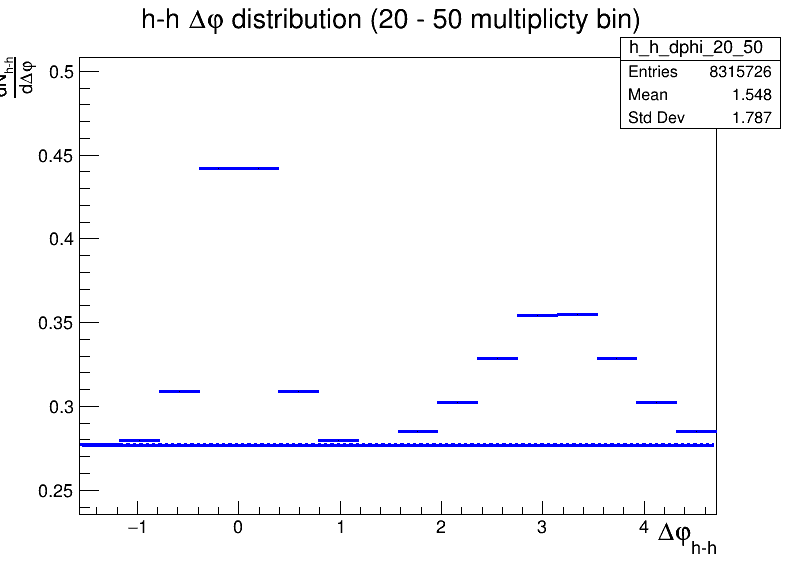

In [615]:
min_bin = h_h_dphi_20_50.GetMinimumBin()
min_val = h_h_dphi_20_50.GetBinContent(min_bin)
max_bin = h_h_dphi_20_50.GetMaximumBin()
max_val = h_h_dphi_20_50.GetBinContent(max_bin)

h_h_dphi_20_50.GetYaxis().SetRangeUser(0.85*min_val, 1.15*max_val)

h_h_dphi_20_50.Draw()
hh_ue_line_20_50.Draw("SAME")
hh_ue_upper_line_20_50.Draw("SAME")
hh_ue_lower_line_20_50.Draw("SAME")
c.Draw()

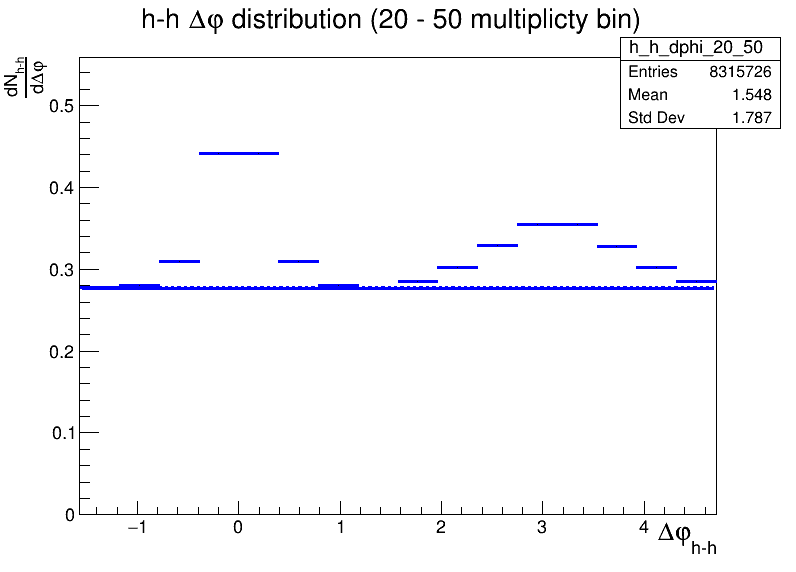

In [616]:
h_h_dphi_20_50.GetYaxis().SetRangeUser(0, h_h_dphi_20_50.GetMaximum()*1.1)
h_h_dphi_20_50.Draw()
hh_ue_line_20_50.Draw("SAME")
hh_ue_upper_line_20_50.Draw("SAME")
hh_ue_lower_line_20_50.Draw("SAME")
c.Draw()

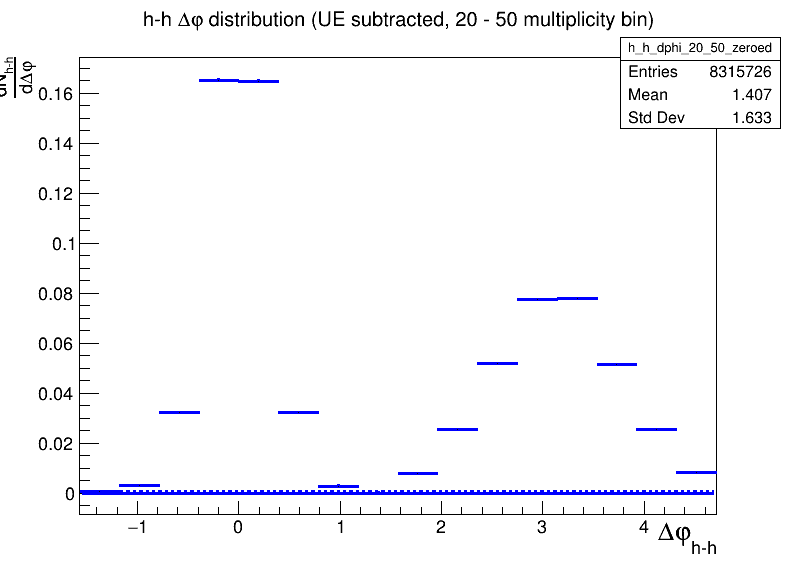

In [617]:
h_h_dphi_20_50_zeroed = h_h_dphi_20_50.Clone("h_h_dphi_20_50_zeroed")
h_h_dphi_20_50_zeroed.SetTitle("h-h #Delta#varphi distribution (UE subtracted, 20 - 50 multiplicity bin)")
h_h_dphi_20_50_zeroed.Add(hh_ue_line_20_50, -1)
h_h_dphi_20_50_zeroed.Draw()
hh_zero_line_20_50.Draw("SAME")
hh_zero_upper_line_20_50.Draw("SAME")
hh_zero_lower_line_20_50.Draw("SAME")
c.Draw()

In [618]:
h_h_total_integral_20_50 = 0
h_h_near_integral_20_50 = 0
h_h_away_integral_20_50 = 0
h_h_ue_integral_20_50 = hh_ue_avg_20_50*DPHI_BINS

h_h_total_integral_error_20_50 = 0
h_h_near_integral_error_20_50 = 0
h_h_away_integral_error_20_50 = 0
h_h_ue_integral_error_20_50 = hh_ue_avg_error_20_50*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_h_total_integral_20_50 += h_h_dphi_20_50.GetBinContent(bin_num)
    h_h_total_integral_error_20_50 += h_h_dphi_20_50.GetBinError(bin_num)**2
    part = h_h_dphi_20_50.GetBinContent(bin_num) - hh_ue_avg_20_50
    if part < 0:
        continue
    if bin_num < 9:
        h_h_near_integral_20_50 += part
        h_h_near_integral_error_20_50 += h_h_dphi_20_50.GetBinError(bin_num)**2
        h_h_near_integral_error_20_50 += hh_ue_avg_error_20_50**2
    else:
        h_h_away_integral_20_50 += part
        h_h_away_integral_error_20_50 += h_h_dphi_20_50.GetBinError(bin_num)**2
        h_h_away_integral_error_20_50 += hh_ue_avg_error_20_50**2
h_h_total_integral_error_20_50 = math.sqrt(h_h_total_integral_error_20_50)
h_h_near_integral_error_20_50 = math.sqrt(h_h_near_integral_error_20_50)
h_h_away_integral_error_20_50 = math.sqrt(h_h_away_integral_error_20_50)

In [619]:
h_h_total_integral_20_50_highest_pt = 0
h_h_near_integral_20_50_highest_pt = 0
h_h_away_integral_20_50_highest_pt = 0
h_h_ue_integral_20_50_highest_pt = hh_ue_avg_20_50_highest_pt*DPHI_BINS

h_h_total_integral_error_20_50_highest_pt = 0
h_h_near_integral_error_20_50_highest_pt = 0
h_h_away_integral_error_20_50_highest_pt = 0
h_h_ue_integral_error_20_50_highest_pt = hh_ue_avg_error_20_50_highest_pt*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_h_total_integral_20_50_highest_pt += h_h_dphi_20_50_highest_pt.GetBinContent(bin_num)
    h_h_total_integral_error_20_50_highest_pt += h_h_dphi_20_50_highest_pt.GetBinError(bin_num)**2
    part = h_h_dphi_20_50_highest_pt.GetBinContent(bin_num) - hh_ue_avg_20_50_highest_pt
    if part < 0:
        continue
    if bin_num < 9:
        h_h_near_integral_20_50_highest_pt += part
        h_h_near_integral_error_20_50_highest_pt += h_h_dphi_20_50_highest_pt.GetBinError(bin_num)**2
        h_h_near_integral_error_20_50_highest_pt += hh_ue_avg_error_20_50_highest_pt**2
    else:
        h_h_away_integral_20_50_highest_pt += part
        h_h_away_integral_error_20_50_highest_pt += h_h_dphi_20_50_highest_pt.GetBinError(bin_num)**2
        h_h_away_integral_error_20_50_highest_pt += hh_ue_avg_error_20_50_highest_pt**2
h_h_total_integral_error_20_50_highest_pt = math.sqrt(h_h_total_integral_error_20_50_highest_pt)
h_h_near_integral_error_20_50_highest_pt = math.sqrt(h_h_near_integral_error_20_50_highest_pt)
h_h_away_integral_error_20_50_highest_pt = math.sqrt(h_h_away_integral_error_20_50_highest_pt)

In [620]:
near_ratio_20_50 = h_lambda_near_integral_20_50/h_h_near_integral_20_50
away_ratio_20_50 = h_lambda_away_integral_20_50/h_h_away_integral_20_50
ue_ratio_20_50 = h_lambda_ue_integral_20_50/h_h_ue_integral_20_50
total_ratio_20_50 = h_lambda_total_integral_20_50/h_h_total_integral_20_50

near_ratio_error_20_50 = near_ratio_20_50*math.sqrt((h_lambda_near_integral_error_20_50/h_lambda_near_integral_20_50)**2
                                                 + (h_h_near_integral_error_20_50/h_h_near_integral_20_50)**2)
away_ratio_error_20_50 = away_ratio_20_50*math.sqrt((h_lambda_away_integral_error_20_50/h_lambda_away_integral_20_50)**2
                                                 + (h_h_away_integral_error_20_50/h_h_away_integral_20_50)**2)
ue_ratio_error_20_50 = ue_ratio_20_50*math.sqrt((h_lambda_ue_integral_error_20_50/h_lambda_ue_integral_20_50)**2
                                                 + (h_h_ue_integral_error_20_50/h_h_ue_integral_20_50)**2)
total_ratio_error_20_50 = total_ratio_20_50*math.sqrt((h_lambda_total_integral_error_20_50/h_lambda_total_integral_20_50)**2
                                                 + (h_h_total_integral_error_20_50/h_h_total_integral_20_50)**2)

In [621]:
near_ratio_20_50_highest_pt = h_lambda_near_integral_20_50_highest_pt/h_h_near_integral_20_50_highest_pt
away_ratio_20_50_highest_pt = h_lambda_away_integral_20_50_highest_pt/h_h_away_integral_20_50_highest_pt
ue_ratio_20_50_highest_pt = h_lambda_ue_integral_20_50_highest_pt/h_h_ue_integral_20_50_highest_pt
total_ratio_20_50_highest_pt = h_lambda_total_integral_20_50_highest_pt/h_h_total_integral_20_50_highest_pt

near_ratio_error_20_50_highest_pt = near_ratio_20_50_highest_pt*math.sqrt((h_lambda_near_integral_error_20_50_highest_pt/h_lambda_near_integral_20_50_highest_pt)**2
                                                 + (h_h_near_integral_error_20_50_highest_pt/h_h_near_integral_20_50_highest_pt)**2)
away_ratio_error_20_50_highest_pt = away_ratio_20_50_highest_pt*math.sqrt((h_lambda_away_integral_error_20_50_highest_pt/h_lambda_away_integral_20_50_highest_pt)**2
                                                 + (h_h_away_integral_error_20_50_highest_pt/h_h_away_integral_20_50_highest_pt)**2)
ue_ratio_error_20_50_highest_pt = ue_ratio_20_50_highest_pt*math.sqrt((h_lambda_ue_integral_error_20_50_highest_pt/h_lambda_ue_integral_20_50_highest_pt)**2
                                                 + (h_h_ue_integral_error_20_50_highest_pt/h_h_ue_integral_20_50_highest_pt)**2)
total_ratio_error_20_50_highest_pt = total_ratio_20_50_highest_pt*math.sqrt((h_lambda_total_integral_error_20_50_highest_pt/h_lambda_total_integral_20_50_highest_pt)**2
                                                 + (h_h_total_integral_error_20_50_highest_pt/h_h_total_integral_20_50_highest_pt)**2)

# 50 - 80 setup

In [622]:
input_file_50_80 = rt.TFile("~/cent_50_80_v0_fullstat.root")
input_list_50_80 = input_file_50_80.Get("h-lambda")
input_file_50_80.Close()

In [623]:
trig_dist_50_80 = input_list_50_80.FindObject("fTriggerDistEff")
lambda_dist_50_80 = input_list_50_80.FindObject("fTriggeredLambdaDist")

In [624]:
trig_dist_50_80_highest_pt = input_list_50_80.FindObject("fTriggerDistEff_highestPt")

In [625]:
h_h_50_80 = input_list_50_80.FindObject("fDphiHHEff")
h_h_mixed_50_80 = input_list_50_80.FindObject("fDphiHHMixed")

In [626]:
h_h_50_80_highest_pt = input_list_50_80.FindObject("fDphiHHEff_highestPt")
h_h_mixed_50_80_highest_pt = input_list_50_80.FindObject("fDphiHHMixed_highestPt")

In [627]:
h_lambda_50_80 = input_list_50_80.FindObject("fDphiHLambdaEff")
h_lambda_mixed_50_80 = input_list_50_80.FindObject("fDphiHLambdaMixed")

In [628]:
h_lambda_mixed_50_80_highest_pt = input_list_50_80.FindObject("fDphiHLambdaMixed_highestPt")
h_lambda_50_80_highest_pt = input_list_50_80.FindObject("fDphiHLambdaEff_highestPt")

In [629]:
# Setting the trigger Pt (this is never changed again)
trig_dist_50_80.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
trig_dist_50_80_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_50_80.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_50_80_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_mixed_50_80.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_mixed_50_80_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_50_80.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_50_80_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_mixed_50_80.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_mixed_50_80_highest_pt.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)

In [630]:
# Setting the associated Pt (this is never changed again)
lambda_dist_50_80.GetAxis(0).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_50_80.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_50_80_highest_pt.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_mixed_50_80_highest_pt.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_50_80.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_50_80_highest_pt.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_mixed_50_80.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_mixed_50_80_highest_pt.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)

In [631]:
trig_pt_dist_50_80 = trig_dist_50_80.Projection(0).Clone("trig_pt_dist_50_80")
trig_phi_dist_50_80 = trig_dist_50_80.Projection(1).Clone("trig_phi_dist_50_80")
trig_eta_dist_50_80 = trig_dist_50_80.Projection(2).Clone("trig_eta_dist_50_80")
trig_2d_dist_50_80 = trig_dist_50_80.Projection(0, 3).Clone("trig_2d_dist_50_80")

trig_pt_dist_50_80.SetTitle("Trigger #font[12]{p}_{T} Distribution (red: all, blue: highest)")
trig_pt_dist_50_80.Sumw2()
trig_pt_dist_50_80.SetLineColor(rt.kRed)

trig_phi_dist_50_80.SetTitle("Trigger #varphi Distribution (Hybrid GCG)")
trig_phi_dist_50_80.Sumw2()
trig_phi_dist_50_80.SetLineColor(rt.kRed)

trig_eta_dist_50_80.SetTitle("Trigger #eta Distribution (Hybrid GCG)")
trig_eta_dist_50_80.Sumw2()
trig_eta_dist_50_80.SetLineColor(rt.kRed)

Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_proj_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_proj_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_proj_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_proj_3_0 (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [632]:
trig_pt_dist_50_80_highest_pt = trig_dist_50_80_highest_pt.Projection(0).Clone("trig_pt_dist_50_80_highest_pt")
trig_phi_dist_50_80_highest_pt = trig_dist_50_80_highest_pt.Projection(1).Clone("trig_phi_dist_50_80_highest_pt")
trig_eta_dist_50_80_highest_pt = trig_dist_50_80_highest_pt.Projection(2).Clone("trig_eta_dist_50_80_highest_pt")
trig_2d_dist_50_80_highest_pt = trig_dist_50_80_highest_pt.Projection(0, 3).Clone("trig_2d_dist_50_80_highest_pt")

trig_pt_dist_50_80_highest_pt.SetTitle("Trigger #font[12]{p}_{T} Distribution (red: all, blue: highest)")
trig_pt_dist_50_80_highest_pt.Sumw2()
trig_pt_dist_50_80_highest_pt.SetLineColor(rt.kRed)

trig_phi_dist_50_80_highest_pt.SetTitle("Trigger #varphi Distribution (Hybrid GCG)")
trig_phi_dist_50_80_highest_pt.Sumw2()
trig_phi_dist_50_80_highest_pt.SetLineColor(rt.kRed)

trig_eta_dist_50_80_highest_pt.SetTitle("Trigger #eta Distribution (Hybrid GCG)")
trig_eta_dist_50_80_highest_pt.Sumw2()
trig_eta_dist_50_80_highest_pt.SetLineColor(rt.kRed)

Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_highestPt_proj_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_highestPt_proj_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_highestPt_proj_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fTriggerDistEff_highestPt_proj_3_0 (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [633]:
num_trigs_50_80 = trig_2d_dist_50_80.Integral()
num_trigs_50_80_highest_pt = trig_2d_dist_50_80_highest_pt.Integral()

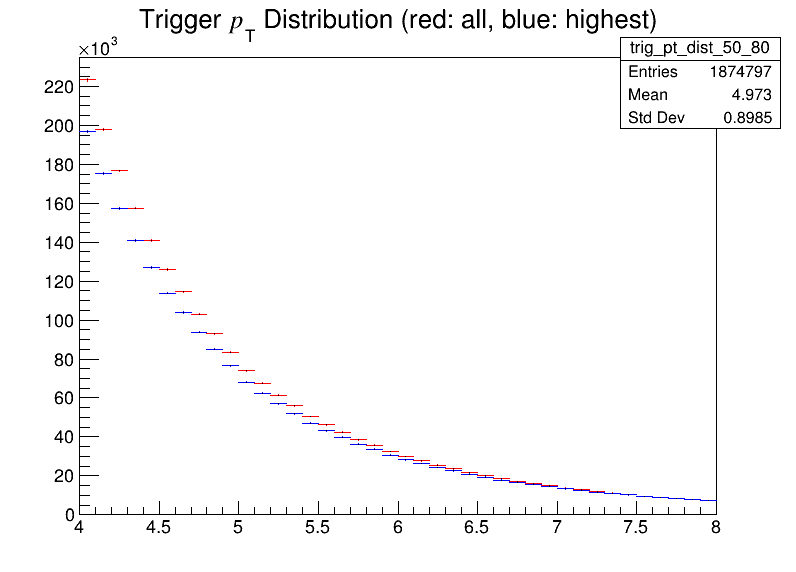

In [634]:
trig_pt_dist_50_80.Draw()
trig_pt_dist_50_80_highest_pt.SetLineColor(rt.kBlue)
trig_pt_dist_50_80_highest_pt.Draw("SAME")
c.Draw()

In [635]:
trig_pt_dist_50_80.Scale(1/num_trigs_50_80)
trig_pt_dist_50_80_highest_pt.Scale(1/num_trigs_50_80_highest_pt)

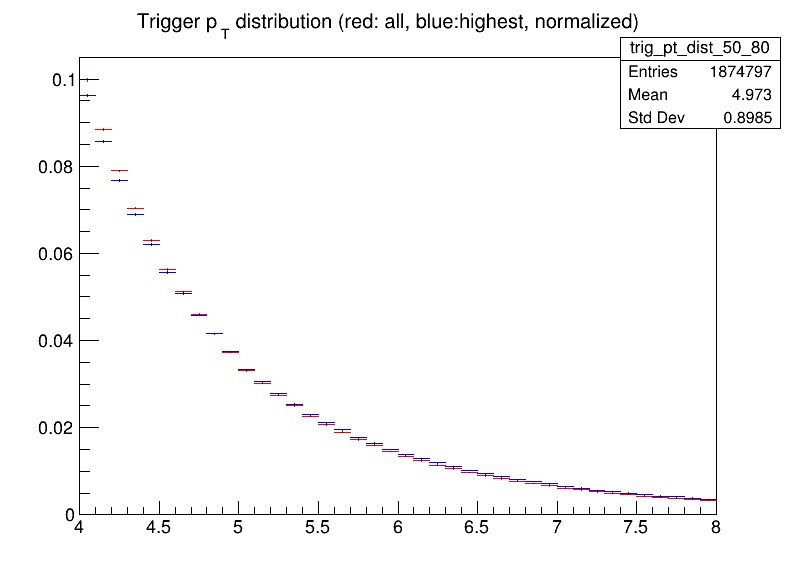

In [636]:
trig_pt_dist_50_80.SetTitle("Trigger p_{T} distribution (red: all, blue:highest, normalized)")
trig_pt_dist_50_80.Draw()
trig_pt_dist_50_80_highest_pt.SetLineColor(rt.kBlue)
trig_pt_dist_50_80_highest_pt.Draw("SAME")
c.Draw()

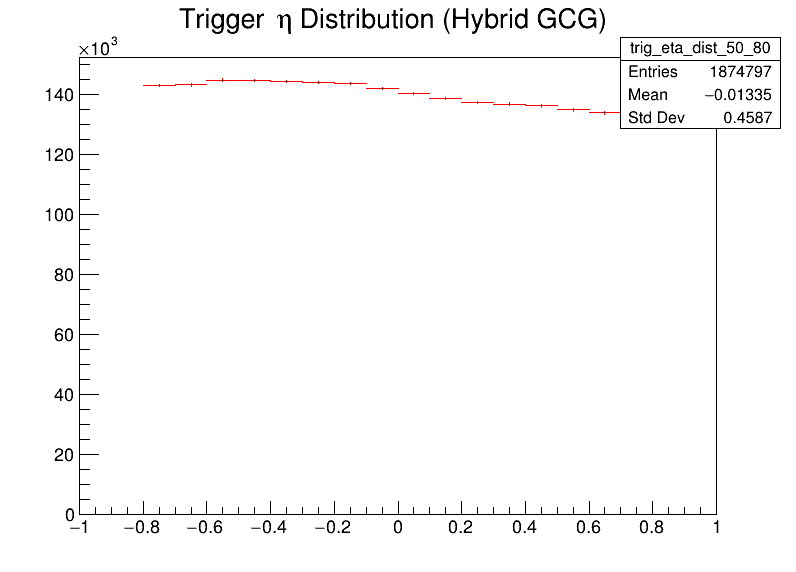

In [637]:
trig_eta_dist_50_80.Draw()
c.Draw()

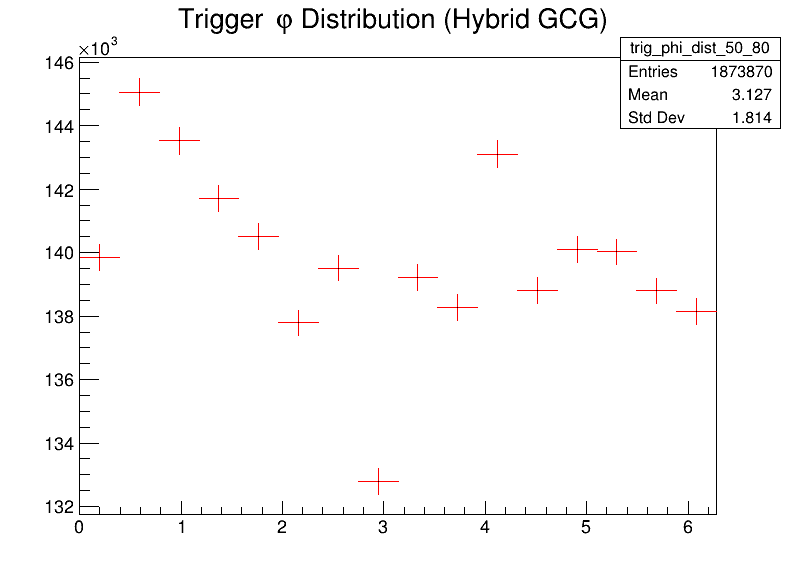

In [638]:
trig_phi_dist_50_80.Draw()
c.Draw()

### Signal analysis section

In [639]:
# eta cuts first
lambda_dist_50_80.GetAxis(2).SetRangeUser(-0.8, 0.8)
lambda_mass_dist_50_80 = lambda_dist_50_80.Projection(3).Clone("lambda_mass_dist_50_80")

Warning in <TROOT::Append>: Replacing existing TH1: fTriggeredLambdaDist_proj_3 (Potential memory leak).


In [640]:
lambda_mass_dist_50_80.SetTitle("#Lambda^{0} invariant mass distribution (p-#pi)")
lambda_mass_dist_50_80.Sumw2()
lambda_mass_dist_50_80.SetLineWidth(2)
lambda_mass_dist_50_80.GetXaxis().SetTitle("Mass (GeV/c^{2})")
lambda_mass_dist_50_80.GetYaxis().SetTitle("#frac{dN_{p-#pi}}{dM}")

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


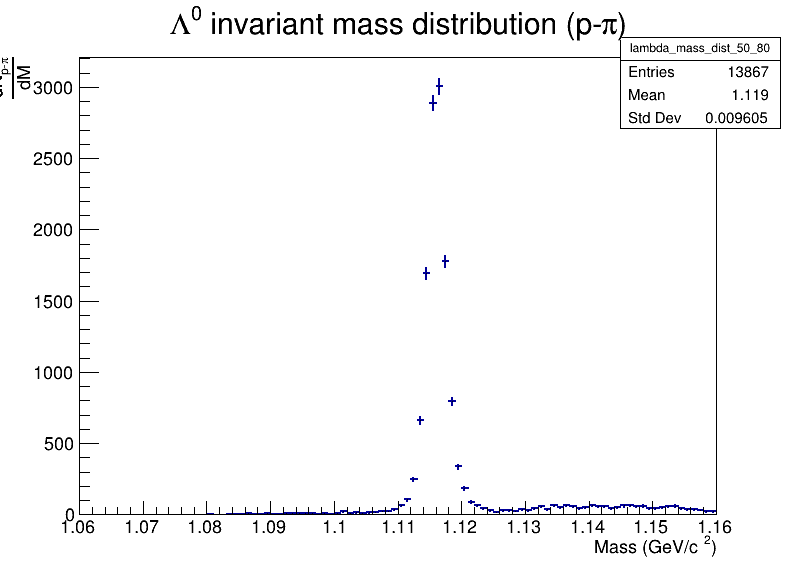

In [641]:
lambda_mass_dist_50_80.Draw()
c.Draw()

In [642]:
bin_1 = lambda_mass_dist_50_80.FindBin(1.09)
bin_2 = lambda_mass_dist_50_80.FindBin(1.15)
bin_3 = lambda_mass_dist_50_80.FindBin(1.16 - EPSILON)
point_one = [1.09, lambda_mass_dist_50_80.GetBinContent(bin_1)]
point_two = [1.15, lambda_mass_dist_50_80.GetBinContent(bin_2)]
point_three = [1.16, lambda_mass_dist_50_80.GetBinContent(bin_3)]
bg_starting_params_50_80 = get_parabola(point_one, point_two, point_three)

In [643]:
lambda_mass_fit_50_80 = rt.TF1("lambda_mass_fit_50_80", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol2(4)", 1.09, 1.155)
lambda_mass_fit_50_80.SetNpx(1000)
lambda_mass_fit_50_80.SetParameter(0, 1.36753e01)
lambda_mass_fit_50_80.FixParameter(1, 1.1162)
lambda_mass_fit_50_80.SetParameter(2, 1.00576e-05 )
lambda_mass_fit_50_80.SetParameter(3, 6.04166e-03)
lambda_mass_fit_50_80.SetParameter(4, bg_starting_params_50_80[0])
lambda_mass_fit_50_80.SetParameter(5, bg_starting_params_50_80[1])
lambda_mass_fit_50_80.SetParameter(6, bg_starting_params_50_80[2])

 FCN=11519.1 FROM MIGRAD    STATUS=FAILED        449 CALLS         450 TOTAL
                     EDM=0.000331025    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.36753e+01   8.20518e+00  -0.00000e+00   0.00000e+00
   2  p1           1.11620e+00     fixed    
   3  p2          -2.56211e-04   1.41421e+00  -0.00000e+00   0.00000e+00
   4  p3           6.04166e-03   1.41421e+00  -0.00000e+00   0.00000e+00
   5  p4          -6.02280e+04   5.40475e-01   0.00000e+00  -2.13221e-02
   6  p5           1.06844e+05   4.88523e-01   0.00000e+00  -1.70831e-02
   7  p6          -4.73403e+04   4.41340e-01   0.00000e+00  -2.56922e-02


Warning in <Fit>: Abnormal termination of minimization.


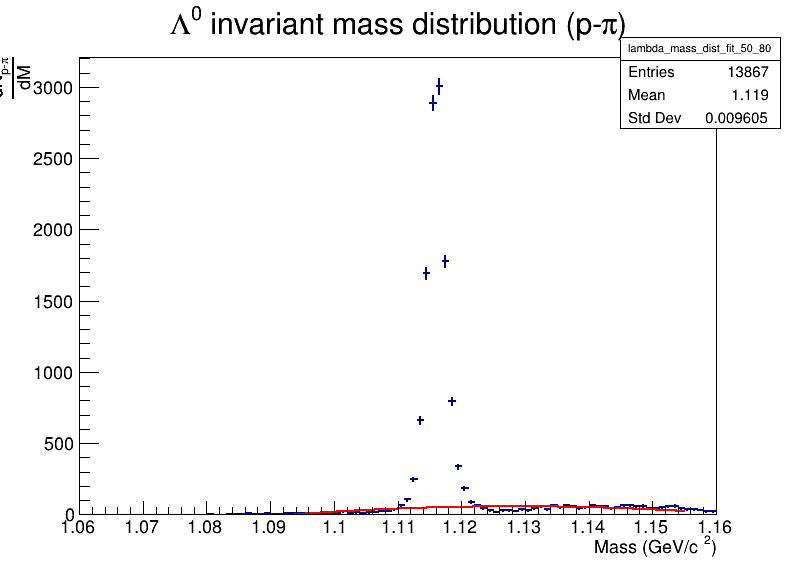

In [644]:
lambda_mass_dist_fit_50_80 = lambda_mass_dist_50_80.Clone("lambda_mass_dist_fit_50_80")
lambda_mass_dist_fit_50_80.Fit(lambda_mass_fit_50_80, "RS")
lambda_mass_dist_fit_50_80.Draw()
c.Draw()

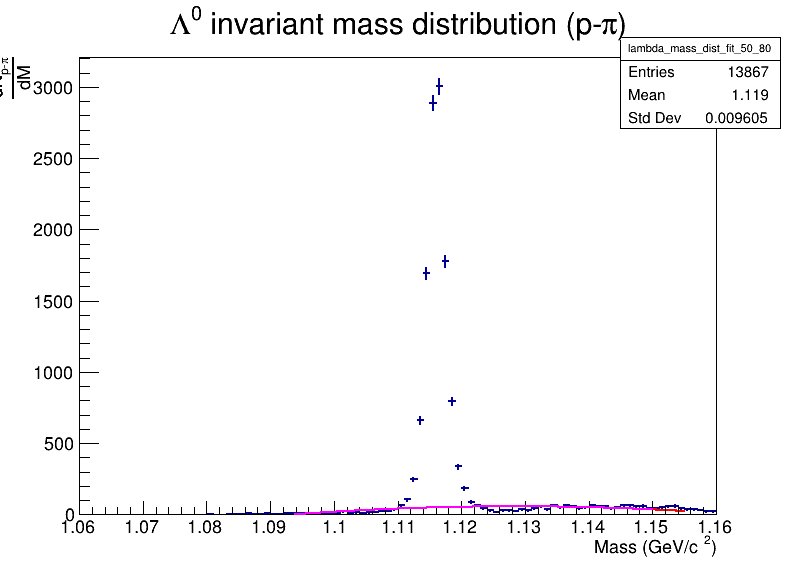

In [645]:
bg_fit_50_80 = rt.TF1("bg_fit_50_80", "pol2", 1.09, 1.15)
bg_fit_50_80.SetParameter(0, lambda_mass_fit_50_80.GetParameter(4))
bg_fit_50_80.SetParameter(1, lambda_mass_fit_50_80.GetParameter(5))
bg_fit_50_80.SetParameter(2, lambda_mass_fit_50_80.GetParameter(6))
bg_fit_50_80.SetNpx(1000)
bg_fit_50_80.SetLineColor(rt.kMagenta)
lambda_mass_dist_fit_50_80.Draw()
bg_fit_50_80.Draw("SAME")
c.Draw()

In [646]:
left_signal_bin_50_80 = lambda_mass_dist_fit_50_80.FindBin(SIG_MIN)
right_signal_bin_50_80 = lambda_mass_dist_fit_50_80.FindBin(SIG_MAX)

lambda_bg_50_80 = 0
lambda_total_50_80 = 0
for bin_num in range(left_signal_bin_50_80, right_signal_bin_50_80 + 1):
    bin_center = lambda_mass_dist_fit_50_80.GetBinCenter(bin_num)
    lambda_bg_50_80 += bg_fit_50_80.Eval(bin_center)
    lambda_total_50_80 += lambda_mass_dist_fit_50_80.GetBinContent(bin_num)

lambda_signal_50_80 = lambda_total_50_80 - lambda_bg_50_80
lambda_signal_total_ratio_50_80 = lambda_signal_50_80/lambda_total_50_80
lambda_signal_bg_ratio_50_80 = lambda_signal_50_80/lambda_bg_50_80
print(f"The 0-20 lambda signal is: {lambda_signal_50_80}")
print(f"The 0-20 lambda background is: {lambda_bg_50_80}")
print(f"The 0-20 lambda S/B is: {lambda_signal_bg_ratio_50_80}")
print(f"The 0-20 lambda S/T is: {lambda_signal_total_ratio_50_80}")
print(f"The 0-20 lambda significance is: {lambda_signal_50_80/math.sqrt(lambda_signal_50_80 + lambda_bg_50_80)}")

The 0-20 lambda signal is: 11246.495293879052
The 0-20 lambda background is: 776.504706120948
The 0-20 lambda S/B is: 14.483486326903606
The 0-20 lambda S/T is: 0.9354150622872038
The 0-20 lambda significance is: 102.56773905978731


### Mixed event correction section

In [647]:
axes = arr.array('i', [2, 3, 4, 5])
h_lambda_50_80 = h_lambda_50_80.Projection(4, axes)
h_lambda_50_80_highest_pt = h_lambda_50_80_highest_pt.Projection(4, axes)
h_lambda_mixed_50_80 = h_lambda_mixed_50_80.Projection(4, axes)
h_lambda_mixed_50_80_highest_pt = h_lambda_mixed_50_80_highest_pt.Projection(4, axes)

In [648]:
h_h_50_80 = h_h_50_80.Projection(2, 3, 4)
h_h_50_80_highest_pt = h_h_50_80_highest_pt.Projection(2, 3, 4)
h_h_mixed_50_80 = h_h_mixed_50_80.Projection(2, 3, 4)
h_h_mixed_50_80_highest_pt = h_h_mixed_50_80_highest_pt.Projection(2, 3, 4)

Warning in <TROOT::Append>: Replacing existing TH1: fDphiHHEff_proj_2_3_4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHHEff_highestPt_proj_2_3_4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHHMixed_proj_2_3_4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHHMixed_highestPt_proj_2_3_4 (Potential memory leak).


In [649]:
# Setting up 2-d correlation plots before the mixed event correction
h_lambda_2d_nomixcor_50_80 = h_lambda_50_80.Projection(0, 1).Clone("h_lambda_2d_nomixcor_50_80")
h_lambda_2d_nomixcor_50_80_highest_pt = h_lambda_50_80_highest_pt.Projection(0, 1).Clone("h_lambda_2d_nomixcor_50_80_highest_pt")
h_lambda_mixed_2d_50_80 = h_lambda_mixed_50_80.Projection(0, 1).Clone("h_lambda_mixed_2d_50_80")
h_lambda_mixed_2d_50_80_highest_pt = h_lambda_mixed_50_80_highest_pt.Projection(0, 1).Clone("h_lambda_mixed_2d_50_80_highest_pt")

Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaEff_proj_2_3_4_5_proj_1_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaEff_highestPt_proj_2_3_4_5_proj_1_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaMixed_proj_2_3_4_5_proj_1_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaMixed_highestPt_proj_2_3_4_5_proj_1_0 (Potential memory leak).


In [650]:
h_h_2d_nomixcor_50_80 = h_h_50_80_highest_pt.Project3D("xye").Clone("h_h_2d_nomixcor_50_80")
h_h_2d_nomixcor_50_80_highest_pt = h_h_50_80_highest_pt.Project3D("xye").Clone("h_h_2d_nomixcor_50_80_highest_pt")
h_h_mixed_2d_50_80 = h_h_mixed_50_80.Project3D("xye").Clone("h_h_mixed_2d_50_80")
h_h_mixed_2d_50_80_highest_pt = h_h_mixed_50_80_highest_pt.Project3D("xye").Clone("h_h_mixed_2d_50_80_highest_pt")

In [651]:
h_lambda_2d_nomixcor_50_80.SetTitle("h-#Lambda^{0} #Delta#varphi#Delta#eta (no acceptance correction)")
h_lambda_2d_nomixcor_50_80.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_2d_nomixcor_50_80.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_2d_nomixcor_50_80.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_50_80.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_nomixcor_50_80.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_50_80.GetYaxis().SetTitleOffset(1.3)

h_lambda_mixed_2d_50_80.SetTitle("Mixed-event h-#Lambda^{0} #Delta#varphi#Delta#eta")
h_lambda_mixed_2d_50_80.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_mixed_2d_50_80.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_mixed_2d_50_80.GetXaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_50_80.GetXaxis().SetTitleOffset(1.3)
h_lambda_mixed_2d_50_80.GetYaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_50_80.GetYaxis().SetTitleOffset(1.3)

h_lambda_2d_nomixcor_50_80_highest_pt.SetTitle("h-#Lambda^{0} #Delta#varphi#Delta#eta (no acceptance correction, highest p_{t} trigger)")
h_lambda_2d_nomixcor_50_80_highest_pt.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_2d_nomixcor_50_80_highest_pt.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_2d_nomixcor_50_80_highest_pt.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_50_80_highest_pt.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_nomixcor_50_80_highest_pt.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_nomixcor_50_80_highest_pt.GetYaxis().SetTitleOffset(1.3)

h_lambda_mixed_2d_50_80_highest_pt.SetTitle("Mixed-event h-#Lambda^{0} #Delta#varphi#Delta#eta (highest p_{T} trigger)")
h_lambda_mixed_2d_50_80_highest_pt.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_mixed_2d_50_80_highest_pt.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_mixed_2d_50_80_highest_pt.GetXaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_50_80_highest_pt.GetXaxis().SetTitleOffset(1.3)
h_lambda_mixed_2d_50_80_highest_pt.GetYaxis().SetTitleSize(0.05)
h_lambda_mixed_2d_50_80_highest_pt.GetYaxis().SetTitleOffset(1.3)

In [652]:
h_h_2d_nomixcor_50_80.SetTitle("h-h #Delta#varphi#Delta#eta (no acceptance correction)")
h_h_2d_nomixcor_50_80.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_h_2d_nomixcor_50_80.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_h_2d_nomixcor_50_80.GetXaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_50_80.GetXaxis().SetTitleOffset(1.3)
h_h_2d_nomixcor_50_80.GetYaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_50_80.GetYaxis().SetTitleOffset(1.3)

h_h_mixed_2d_50_80.SetTitle("Mixed-event h-h #Delta#varphi#Delta#eta")
h_h_mixed_2d_50_80.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_h_mixed_2d_50_80.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_h_mixed_2d_50_80.GetXaxis().SetTitleSize(0.05)
h_h_mixed_2d_50_80.GetXaxis().SetTitleOffset(1.3)
h_h_mixed_2d_50_80.GetYaxis().SetTitleSize(0.05)
h_h_mixed_2d_50_80.GetYaxis().SetTitleOffset(1.3)

h_h_2d_nomixcor_50_80_highest_pt.SetTitle("h-h #Delta#varphi#Delta#eta (no acceptance correction, highest p_{T} trigger)")
h_h_2d_nomixcor_50_80_highest_pt.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_h_2d_nomixcor_50_80_highest_pt.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_h_2d_nomixcor_50_80_highest_pt.GetXaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_50_80_highest_pt.GetXaxis().SetTitleOffset(1.3)
h_h_2d_nomixcor_50_80_highest_pt.GetYaxis().SetTitleSize(0.05)
h_h_2d_nomixcor_50_80_highest_pt.GetYaxis().SetTitleOffset(1.3)

h_h_mixed_2d_50_80_highest_pt.SetTitle("Mixed-event h-h #Delta#varphi#Delta#eta")
h_h_mixed_2d_50_80_highest_pt.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_h_mixed_2d_50_80_highest_pt.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_h_mixed_2d_50_80_highest_pt.GetXaxis().SetTitleSize(0.05)
h_h_mixed_2d_50_80_highest_pt.GetXaxis().SetTitleOffset(1.3)
h_h_mixed_2d_50_80_highest_pt.GetYaxis().SetTitleSize(0.05)
h_h_mixed_2d_50_80_highest_pt.GetYaxis().SetTitleOffset(1.3)

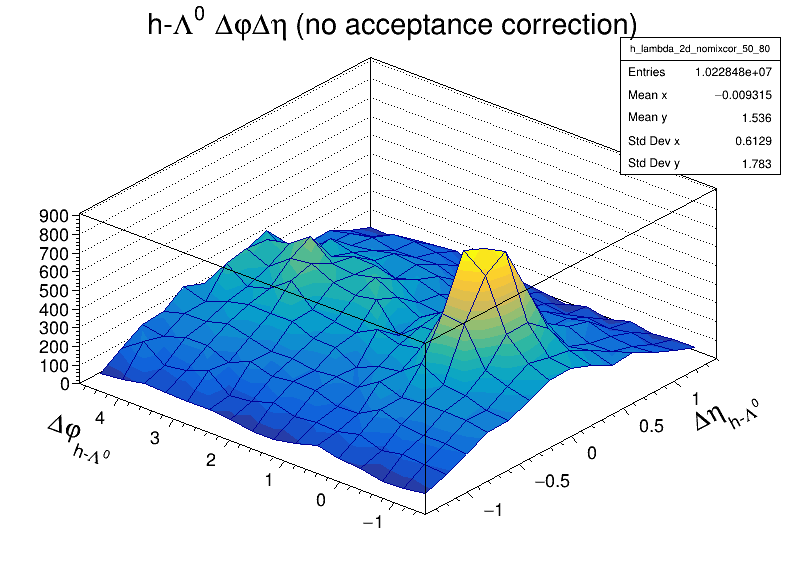

In [653]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_nomixcor_50_80.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_2d_nomixcor_50_80.Draw("SURF1")
c.Draw()

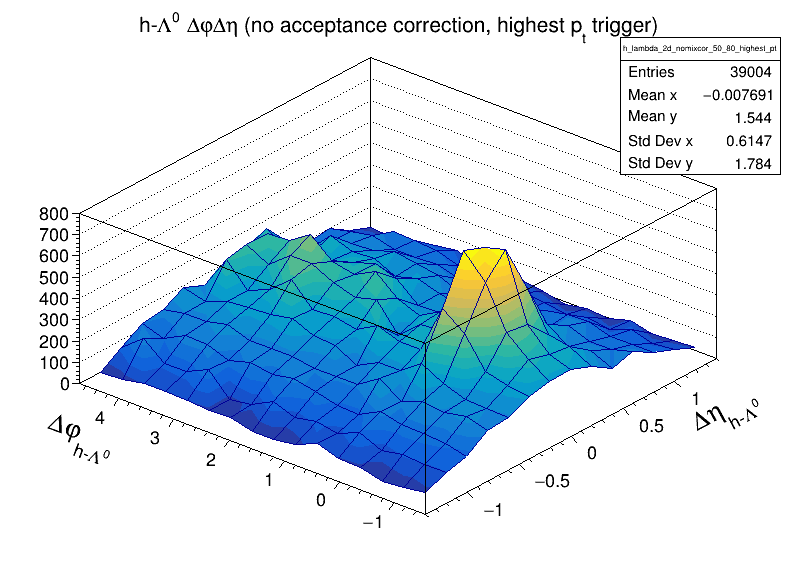

In [654]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_nomixcor_50_80_highest_pt.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_2d_nomixcor_50_80_highest_pt.Draw("SURF1")
c.Draw()

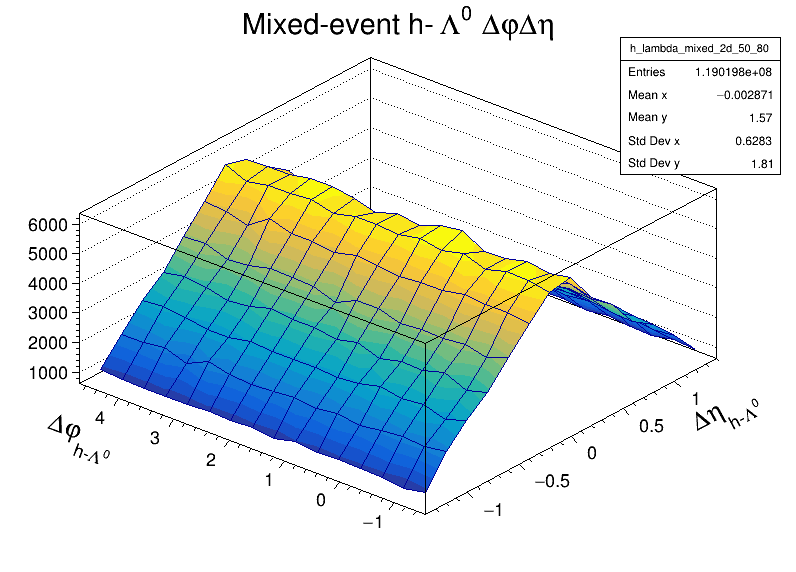

In [655]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_mixed_2d_50_80.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_mixed_2d_50_80.Draw("SURF1")
c.Draw()

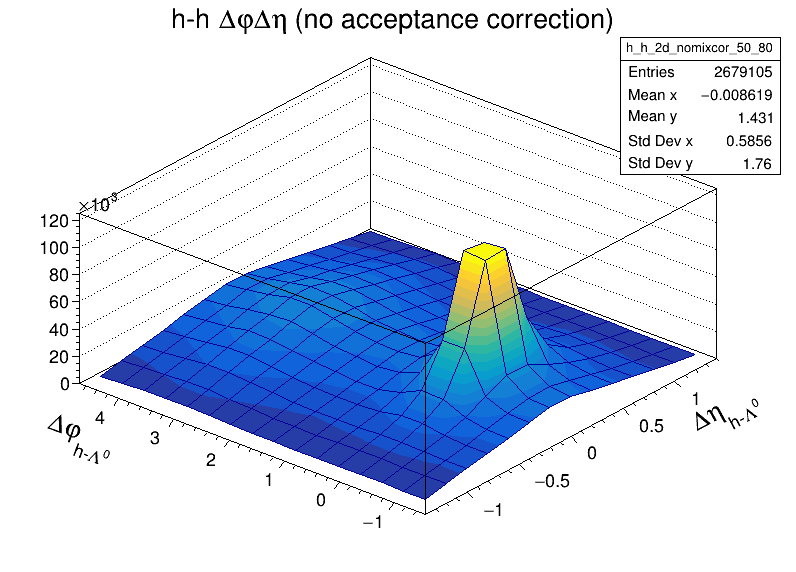

In [656]:
c.SetTheta(50)
c.SetPhi(50)
h_h_2d_nomixcor_50_80.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_2d_nomixcor_50_80.Draw("SURF1")
c.Draw()

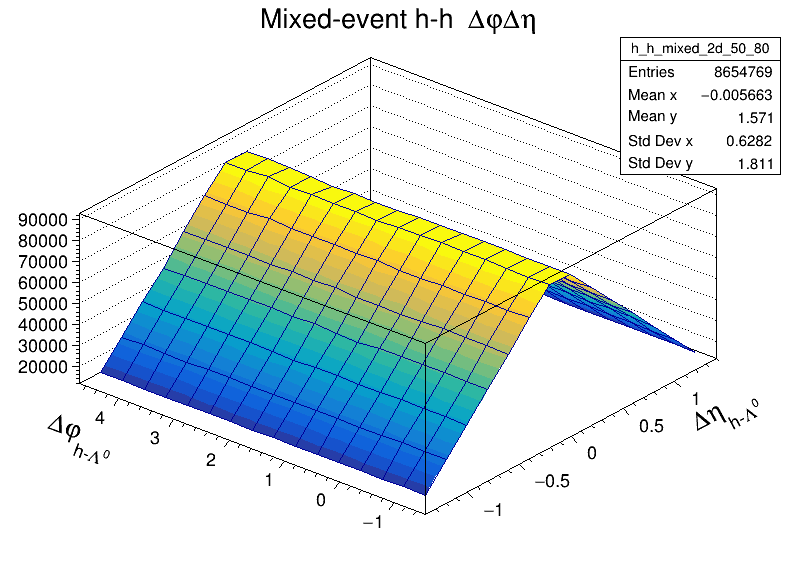

In [657]:
c.SetTheta(50)
c.SetPhi(50)
h_h_mixed_2d_50_80.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_mixed_2d_50_80.Draw("SURF1")
c.Draw()

In [658]:
h_lambda_2d_mixcor_sig_50_80 = make_mixed_corrections(h_lambda_50_80, h_lambda_mixed_50_80, SIG_MIN, SIG_MAX)

Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaEff_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaMixed_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created


In [659]:
h_lambda_2d_mixcor_sig_50_80_highest_pt = make_mixed_corrections(h_lambda_50_80_highest_pt, h_lambda_mixed_50_80_highest_pt, SIG_MIN, SIG_MAX)

Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaEff_highestPt_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: fDphiHLambdaMixed_highestPt_proj_2_3_4_5_proj_0_1_3 (Potential memory leak).
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created


In [660]:
h_h_2d_mixcor_50_80 = make_mixed_corrections(h_h_50_80, h_h_mixed_50_80, SIG_MIN, SIG_MAX, is_hh=True)
h_h_2d_mixcor_50_80_highest_pt = make_mixed_corrections(h_h_50_80_highest_pt, h_h_mixed_50_80_highest_pt, SIG_MIN, SIG_MAX, is_hh=True)

Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH3D::Sumw2>: Sum of squares of weights structure already created


In [661]:
h_lambda_2d_mixcor_sig_50_80.SetTitle("h-#Lambda^{0} #Delta#varphi#Delta#eta correlation (SIG, acceptance corrected)")
h_lambda_2d_mixcor_sig_50_80.GetYaxis().SetTitle("#Delta#varphi_{h-#Lambda^{0}}")
h_lambda_2d_mixcor_sig_50_80.GetXaxis().SetTitle("#Delta#eta_{h-#Lambda^{0}}")
h_lambda_2d_mixcor_sig_50_80.GetXaxis().SetTitleSize(0.05)
h_lambda_2d_mixcor_sig_50_80.GetXaxis().SetTitleOffset(1.3)
h_lambda_2d_mixcor_sig_50_80.GetYaxis().SetTitleSize(0.05)
h_lambda_2d_mixcor_sig_50_80.GetYaxis().SetTitleOffset(1.3)

In [662]:
h_h_2d_mixcor_50_80.SetTitle("h-h #Delta#varphi#Delta#eta correlation (acceptance corrected)")
h_h_2d_mixcor_50_80.GetYaxis().SetTitle("#Delta#varphi_{h-h}")
h_h_2d_mixcor_50_80.GetXaxis().SetTitle("#Delta#eta_{h-h}")
h_h_2d_mixcor_50_80.GetXaxis().SetTitleSize(0.05)
h_h_2d_mixcor_50_80.GetXaxis().SetTitleOffset(1.3)
h_h_2d_mixcor_50_80.GetYaxis().SetTitleSize(0.05)
h_h_2d_mixcor_50_80.GetYaxis().SetTitleOffset(1.3)

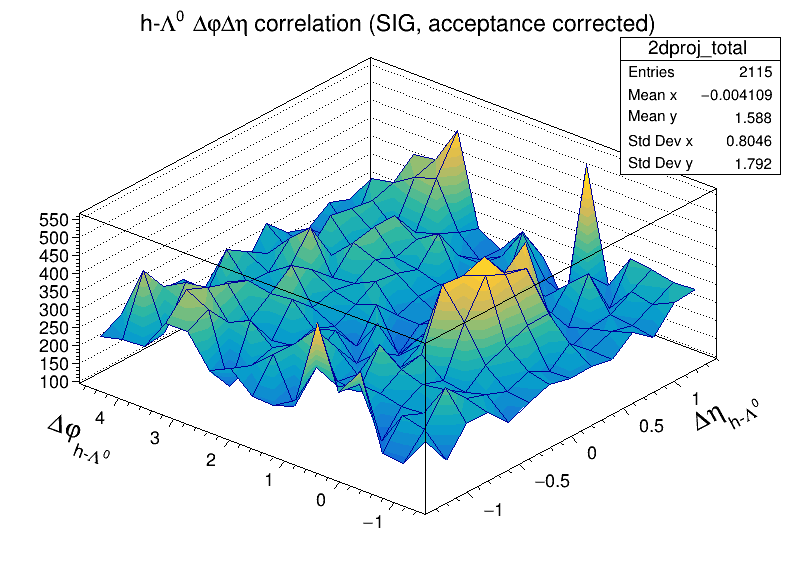

In [663]:
c.SetTheta(50)
c.SetPhi(50)
h_lambda_2d_mixcor_sig_50_80.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_lambda_2d_mixcor_sig_50_80.Draw("SURF1")
c.Draw()

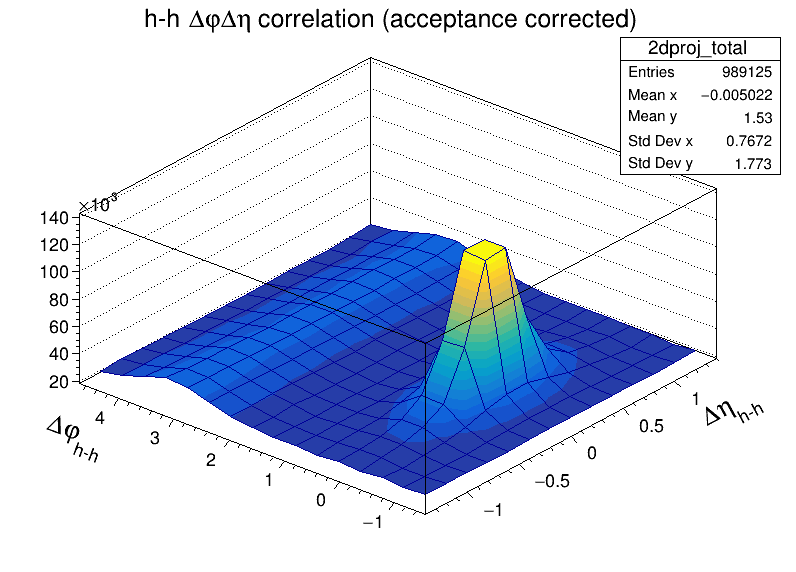

In [664]:
c.SetTheta(50)
c.SetPhi(50)
h_h_2d_mixcor_50_80.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_2d_mixcor_50_80.Draw("SURF1")
c.Draw()

In [665]:
h_lambda_2d_mixcor_sig_50_80_highest_pt.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)
h_h_2d_mixcor_50_80_highest_pt.GetXaxis().SetRangeUser(-DELTA_ETA_MAX, DELTA_ETA_MAX)

In [666]:
# per-trigger normalization done here
h_lambda_2d_mixcor_sig_50_80.Scale(1.0/num_trigs_50_80)
h_lambda_2d_mixcor_sig_50_80_highest_pt.Scale(1.0/num_trigs_50_80_highest_pt)
h_h_2d_mixcor_50_80.Scale(1.0/num_trigs_50_80)
h_h_2d_mixcor_50_80_highest_pt.Scale(1.0/num_trigs_50_80_highest_pt)

In [667]:
h_lambda_2d_subtracted_50_80 = h_lambda_2d_mixcor_sig_50_80
h_lambda_2d_subtracted_50_80_highest_pt = h_lambda_2d_mixcor_sig_50_80_highest_pt

### Integral and ratio section

In [668]:
h_lambda_dphi_subtracted_50_80 = h_lambda_2d_subtracted_50_80.ProjectionY("h_lambda_dphi_subtracted_50_80")
h_lambda_dphi_subtracted_50_80.SetTitle("h-#Lambda^{0} #Delta#varphi distribution (50 - 80 multiplicty bin)")
h_lambda_dphi_subtracted_50_80.SetLineColor(rt.kViolet - 6)
h_lambda_dphi_subtracted_50_80.SetLineWidth(3)
h_lambda_dphi_subtracted_50_80.GetYaxis().SetTitle("#frac{dN_{h-#Lambda^{0}}}{d#Delta#varphi}")
h_lambda_dphi_subtracted_50_80.GetXaxis().SetTitleSize(0.05)
h_lambda_dphi_subtracted_50_80.GetXaxis().SetTitleOffset(0.5)

In [669]:
h_lambda_dphi_subtracted_50_80_highest_pt = h_lambda_2d_subtracted_50_80_highest_pt.ProjectionY("h_lambda_dphi_subtracted_50_80_highest_pt")
h_lambda_dphi_subtracted_50_80_highest_pt.SetTitle("h-#Lambda^{0} #Delta#varphi distribution (50 - 80 multiplicty bin)")
h_lambda_dphi_subtracted_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
h_lambda_dphi_subtracted_50_80_highest_pt.SetLineWidth(3)
h_lambda_dphi_subtracted_50_80_highest_pt.GetYaxis().SetTitle("#frac{dN_{h-#Lambda^{0}}}{d#Delta#varphi}")
h_lambda_dphi_subtracted_50_80_highest_pt.GetXaxis().SetTitleSize(0.05)
h_lambda_dphi_subtracted_50_80_highest_pt.GetXaxis().SetTitleOffset(0.5)

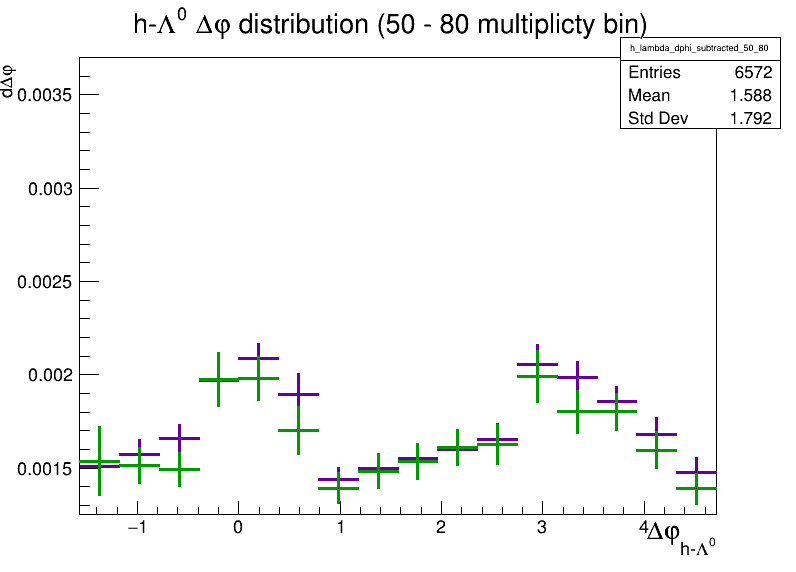

In [670]:
h_lambda_dphi_subtracted_50_80.GetYaxis().SetRangeUser(h_lambda_dphi_subtracted_50_80_highest_pt.GetMinimum()*0.9, 
                                                      h_lambda_dphi_subtracted_50_80.GetMaximum()*1.10)
h_lambda_dphi_subtracted_50_80.Draw()
h_lambda_dphi_subtracted_50_80_highest_pt.SetLineColor(rt.kGreen + 2)
h_lambda_dphi_subtracted_50_80_highest_pt.Draw("SAME")
c.Draw()

In [671]:
if USE_AVG_4:
    ue_line_50_80 = rt.TF1("ue_line_50_80", "pol0", -2, 6)
    ue_upper_line_50_80 = rt.TF1("ue_upper_line_50_80", "pol0", -2, 6)
    ue_lower_line_50_80 = rt.TF1("ue_lower_line_50_80", "pol0", -2, 6)
    zero_line_50_80 = rt.TF1("zero_line_50_80", "pol0", -2, 6)
    zero_upper_line_50_80 = rt.TF1("zero_upper_line_50_80", "pol0", -2, 6)
    zero_lower_line_50_80 = rt.TF1("zero_lower_line_50_80", "pol0", -2, 6)
    ue_avg_50_80 = (h_lambda_dphi_subtracted_50_80.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_50_80.GetBinContent(8)
                   + h_lambda_dphi_subtracted_50_80.GetBinContent(9)
                   + h_lambda_dphi_subtracted_50_80.GetBinContent(16))/4

    ue_avg_error_50_80 = (1/4)*(math.sqrt(h_lambda_dphi_subtracted_50_80.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_50_80.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_50_80.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_50_80.GetBinError(16)**2))


    ue_line_50_80.SetParameter(0, ue_avg_50_80)
    ue_line_50_80.SetLineColor(rt.kViolet - 6)
    ue_line_50_80.SetLineWidth(3)
    ue_line_50_80.SetLineStyle(rt.kSolid)

    ue_upper_line_50_80.SetParameter(0, ue_avg_50_80 + ue_avg_error_50_80)
    ue_upper_line_50_80.SetLineColor(rt.kViolet - 6)
    ue_upper_line_50_80.SetLineStyle(rt.kDashed)

    ue_lower_line_50_80.SetParameter(0, ue_avg_50_80 - ue_avg_error_50_80)
    ue_lower_line_50_80.SetLineColor(rt.kViolet - 6)
    ue_lower_line_50_80.SetLineStyle(rt.kDashed)

    zero_line_50_80.SetParameter(0, 0)
    zero_line_50_80.SetLineColor(rt.kViolet - 6)
    zero_line_50_80.SetLineWidth(3)
    zero_line_50_80.SetLineStyle(rt.kSolid)
    zero_upper_line_50_80.SetParameter(0, ue_avg_error_50_80)
    zero_upper_line_50_80.SetLineColor(rt.kViolet - 6)
    zero_upper_line_50_80.SetLineStyle(rt.kDashed)
    zero_lower_line_50_80.SetParameter(0, -ue_avg_error_50_80)
    zero_lower_line_50_80.SetLineColor(rt.kViolet - 6)
    zero_lower_line_50_80.SetLineStyle(rt.kDashed)
elif USE_AVG_6:
    ue_line_50_80 = rt.TF1("ue_line_50_80", "pol0", -2, 6)
    ue_upper_line_50_80 = rt.TF1("ue_upper_line_50_80", "pol0", -2, 6)
    ue_lower_line_50_80 = rt.TF1("ue_lower_line_50_80", "pol0", -2, 6)
    zero_line_50_80 = rt.TF1("zero_line_50_80", "pol0", -2, 6)
    zero_upper_line_50_80 = rt.TF1("zero_upper_line_50_80", "pol0", -2, 6)
    zero_lower_line_50_80 = rt.TF1("zero_lower_line_50_80", "pol0", -2, 6)
    ue_avg_50_80 = (h_lambda_dphi_subtracted_50_80.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_50_80.GetBinContent(2)
                   + h_lambda_dphi_subtracted_50_80.GetBinContent(7)
                   + h_lambda_dphi_subtracted_50_80.GetBinContent(8)
                   + h_lambda_dphi_subtracted_50_80.GetBinContent(9)
                   + h_lambda_dphi_subtracted_50_80.GetBinContent(16))/6

    ue_avg_error_50_80 = (1/6)*(math.sqrt(h_lambda_dphi_subtracted_50_80.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_50_80.GetBinError(2)**2
                   + h_lambda_dphi_subtracted_50_80.GetBinError(7)**2
                   + h_lambda_dphi_subtracted_50_80.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_50_80.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_50_80.GetBinError(16)**2))


    ue_line_50_80.SetParameter(0, ue_avg_50_80)
    ue_line_50_80.SetLineColor(rt.kViolet - 6)
    ue_line_50_80.SetLineWidth(3)
    ue_line_50_80.SetLineStyle(rt.kSolid)

    ue_upper_line_50_80.SetParameter(0, ue_avg_50_80 + ue_avg_error_50_80)
    ue_upper_line_50_80.SetLineColor(rt.kViolet - 6)
    ue_upper_line_50_80.SetLineStyle(rt.kDashed)

    ue_lower_line_50_80.SetParameter(0, ue_avg_50_80 - ue_avg_error_50_80)
    ue_lower_line_50_80.SetLineColor(rt.kViolet - 6)
    ue_lower_line_50_80.SetLineStyle(rt.kDashed)

    zero_line_50_80.SetParameter(0, 0)
    zero_line_50_80.SetLineColor(rt.kViolet - 6)
    zero_line_50_80.SetLineWidth(3)
    zero_line_50_80.SetLineStyle(rt.kSolid)
    zero_upper_line_50_80.SetParameter(0, ue_avg_error_50_80)
    zero_upper_line_50_80.SetLineColor(rt.kViolet - 6)
    zero_upper_line_50_80.SetLineStyle(rt.kDashed)
    zero_lower_line_50_80.SetParameter(0, -ue_avg_error_50_80)
    zero_lower_line_50_80.SetLineColor(rt.kViolet - 6)
    zero_lower_line_50_80.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    ue_line_50_80 = rt.TF1("ue_line_50_80", "pol0", -2, 6)
    ue_upper_line_50_80 = rt.TF1("ue_upper_line_50_80", "pol0", -2, 6)
    ue_lower_line_50_80 = rt.TF1("ue_lower_line_50_80", "pol0", -2, 6)
    zero_line_50_80 = rt.TF1("zero_line_50_80", "pol0", -2, 6)
    zero_upper_line_50_80 = rt.TF1("zero_upper_line_50_80", "pol0", -2, 6)
    zero_lower_line_50_80 = rt.TF1("zero_lower_line_50_80", "pol0", -2, 6)
    min_bin = h_lambda_dphi_subtracted_50_80.GetMinimumBin()
    ue_avg_50_80 = h_lambda_dphi_subtracted_50_80.GetBinContent(min_bin)
    ue_avg_error_50_80 = h_lambda_dphi_subtracted_50_80.GetBinError(min_bin)


    ue_line_50_80.SetParameter(0, ue_avg_50_80)
    ue_line_50_80.SetLineColor(rt.kViolet - 6)
    ue_line_50_80.SetLineWidth(3)
    ue_line_50_80.SetLineStyle(rt.kSolid)

    ue_upper_line_50_80.SetParameter(0, ue_avg_50_80 + ue_avg_error_50_80)
    ue_upper_line_50_80.SetLineColor(rt.kViolet - 6)
    ue_upper_line_50_80.SetLineStyle(rt.kDashed)

    ue_lower_line_50_80.SetParameter(0, ue_avg_50_80 - ue_avg_error_50_80)
    ue_lower_line_50_80.SetLineColor(rt.kViolet - 6)
    ue_lower_line_50_80.SetLineStyle(rt.kDashed)

    zero_line_50_80.SetParameter(0, 0)
    zero_line_50_80.SetLineColor(rt.kViolet - 6)
    zero_line_50_80.SetLineWidth(3)
    zero_line_50_80.SetLineStyle(rt.kSolid)
    zero_upper_line_50_80.SetParameter(0, ue_avg_error_50_80)
    zero_upper_line_50_80.SetLineColor(rt.kViolet - 6)
    zero_upper_line_50_80.SetLineStyle(rt.kDashed)
    zero_lower_line_50_80.SetParameter(0, -ue_avg_error_50_80)
    zero_lower_line_50_80.SetLineColor(rt.kViolet - 6)
    zero_lower_line_50_80.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

In [672]:
if USE_AVG_4:
    ue_line_50_80_highest_pt = rt.TF1("ue_line_50_80_highest_pt", "pol0", -2, 6)
    ue_upper_line_50_80_highest_pt = rt.TF1("ue_upper_line_50_80_highest_pt", "pol0", -2, 6)
    ue_lower_line_50_80_highest_pt = rt.TF1("ue_lower_line_50_80_highest_pt", "pol0", -2, 6)
    zero_line_50_80_highest_pt = rt.TF1("zero_line_50_80_highest_pt", "pol0", -2, 6)
    zero_upper_line_50_80_highest_pt = rt.TF1("zero_upper_line_50_80_highest_pt", "pol0", -2, 6)
    zero_lower_line_50_80_highest_pt = rt.TF1("zero_lower_line_50_80_highest_pt", "pol0", -2, 6)
    ue_avg_50_80_highest_pt = (h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(8)
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(9)
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(16))/4

    ue_avg_error_50_80_highest_pt = (1/4)*(math.sqrt(h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(16)**2))


    ue_line_50_80_highest_pt.SetParameter(0, ue_avg_50_80_highest_pt)
    ue_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_line_50_80_highest_pt.SetLineWidth(3)
    ue_line_50_80_highest_pt.SetLineStyle(rt.kSolid)

    ue_upper_line_50_80_highest_pt.SetParameter(0, ue_avg_50_80_highest_pt + ue_avg_error_50_80_highest_pt)
    ue_upper_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_upper_line_50_80_highest_pt.SetLineStyle(rt.kDashed)

    ue_lower_line_50_80_highest_pt.SetParameter(0, ue_avg_50_80_highest_pt - ue_avg_error_50_80_highest_pt)
    ue_lower_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_lower_line_50_80_highest_pt.SetLineStyle(rt.kDashed)

    zero_line_50_80_highest_pt.SetParameter(0, 0)
    zero_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_line_50_80_highest_pt.SetLineWidth(3)
    zero_line_50_80_highest_pt.SetLineStyle(rt.kSolid)
    zero_upper_line_50_80_highest_pt.SetParameter(0, ue_avg_error_50_80_highest_pt)
    zero_upper_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_upper_line_50_80_highest_pt.SetLineStyle(rt.kDashed)
    zero_lower_line_50_80_highest_pt.SetParameter(0, -ue_avg_error_50_80_highest_pt)
    zero_lower_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_lower_line_50_80_highest_pt.SetLineStyle(rt.kDashed)
elif USE_AVG_6:
    ue_line_50_80_highest_pt = rt.TF1("ue_line_50_80_highest_pt", "pol0", -2, 6)
    ue_upper_line_50_80_highest_pt = rt.TF1("ue_upper_line_50_80_highest_pt", "pol0", -2, 6)
    ue_lower_line_50_80_highest_pt = rt.TF1("ue_lower_line_50_80_highest_pt", "pol0", -2, 6)
    zero_line_50_80_highest_pt = rt.TF1("zero_line_50_80_highest_pt", "pol0", -2, 6)
    zero_upper_line_50_80_highest_pt = rt.TF1("zero_upper_line_50_80_highest_pt", "pol0", -2, 6)
    zero_lower_line_50_80_highest_pt = rt.TF1("zero_lower_line_50_80_highest_pt", "pol0", -2, 6)
    ue_avg_50_80_highest_pt = (h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(1) 
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(2)
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(7)
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(8)
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(9)
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(16))/6

    ue_avg_error_50_80_highest_pt = (1/6)*(math.sqrt(h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(1)**2 
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(2)**2
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(7)**2
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(8)**2
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(9)**2
                   + h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(16)**2))


    ue_line_50_80_highest_pt.SetParameter(0, ue_avg_50_80_highest_pt)
    ue_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_line_50_80_highest_pt.SetLineWidth(3)
    ue_line_50_80_highest_pt.SetLineStyle(rt.kSolid)

    ue_upper_line_50_80_highest_pt.SetParameter(0, ue_avg_50_80_highest_pt + ue_avg_error_50_80_highest_pt)
    ue_upper_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_upper_line_50_80_highest_pt.SetLineStyle(rt.kDashed)

    ue_lower_line_50_80_highest_pt.SetParameter(0, ue_avg_50_80_highest_pt - ue_avg_error_50_80_highest_pt)
    ue_lower_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_lower_line_50_80_highest_pt.SetLineStyle(rt.kDashed)

    zero_line_50_80_highest_pt.SetParameter(0, 0)
    zero_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_line_50_80_highest_pt.SetLineWidth(3)
    zero_line_50_80_highest_pt.SetLineStyle(rt.kSolid)
    zero_upper_line_50_80_highest_pt.SetParameter(0, ue_avg_error_50_80_highest_pt)
    zero_upper_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_upper_line_50_80_highest_pt.SetLineStyle(rt.kDashed)
    zero_lower_line_50_80_highest_pt.SetParameter(0, -ue_avg_error_50_80_highest_pt)
    zero_lower_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_lower_line_50_80_highest_pt.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    ue_line_50_80_highest_pt = rt.TF1("ue_line_50_80_highest_pt", "pol0", -2, 6)
    ue_upper_line_50_80_highest_pt = rt.TF1("ue_upper_line_50_80_highest_pt", "pol0", -2, 6)
    ue_lower_line_50_80_highest_pt = rt.TF1("ue_lower_line_50_80_highest_pt", "pol0", -2, 6)
    zero_line_50_80_highest_pt = rt.TF1("zero_line_50_80_highest_pt", "pol0", -2, 6)
    zero_upper_line_50_80_highest_pt = rt.TF1("zero_upper_line_50_80_highest_pt", "pol0", -2, 6)
    zero_lower_line_50_80_highest_pt = rt.TF1("zero_lower_line_50_80_highest_pt", "pol0", -2, 6)
    min_bin = h_lambda_dphi_subtracted_50_80_highest_pt.GetMinimumBin()
    ue_avg_50_80_highest_pt = h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(min_bin)
    ue_avg_error_50_80_highest_pt = h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(min_bin)


    ue_line_50_80_highest_pt.SetParameter(0, ue_avg_50_80_highest_pt)
    ue_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_line_50_80_highest_pt.SetLineWidth(3)
    ue_line_50_80_highest_pt.SetLineStyle(rt.kSolid)

    ue_upper_line_50_80_highest_pt.SetParameter(0, ue_avg_50_80_highest_pt + ue_avg_error_50_80_highest_pt)
    ue_upper_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_upper_line_50_80_highest_pt.SetLineStyle(rt.kDashed)

    ue_lower_line_50_80_highest_pt.SetParameter(0, ue_avg_50_80_highest_pt - ue_avg_error_50_80_highest_pt)
    ue_lower_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    ue_lower_line_50_80_highest_pt.SetLineStyle(rt.kDashed)

    zero_line_50_80_highest_pt.SetParameter(0, 0)
    zero_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_line_50_80_highest_pt.SetLineWidth(3)
    zero_line_50_80_highest_pt.SetLineStyle(rt.kSolid)
    zero_upper_line_50_80_highest_pt.SetParameter(0, ue_avg_error_50_80_highest_pt)
    zero_upper_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_upper_line_50_80_highest_pt.SetLineStyle(rt.kDashed)
    zero_lower_line_50_80_highest_pt.SetParameter(0, -ue_avg_error_50_80_highest_pt)
    zero_lower_line_50_80_highest_pt.SetLineColor(rt.kViolet - 6)
    zero_lower_line_50_80_highest_pt.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

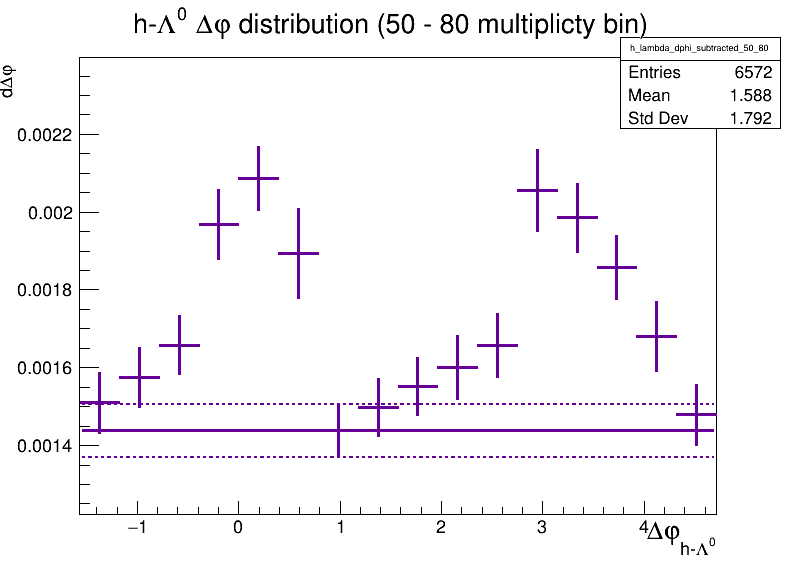

In [673]:
min_bin = h_lambda_dphi_subtracted_50_80.GetMinimumBin()
min_val = h_lambda_dphi_subtracted_50_80.GetBinContent(min_bin)
max_bin = h_lambda_dphi_subtracted_50_80.GetMaximumBin()
max_val = h_lambda_dphi_subtracted_50_80.GetBinContent(max_bin)

h_lambda_dphi_subtracted_50_80.GetYaxis().SetRangeUser(0.85*min_val, 1.15*max_val)
h_lambda_dphi_subtracted_50_80.Draw()
ue_line_50_80.Draw("SAME")
ue_upper_line_50_80.Draw("SAME")
ue_lower_line_50_80.Draw("SAME")
c.Draw()

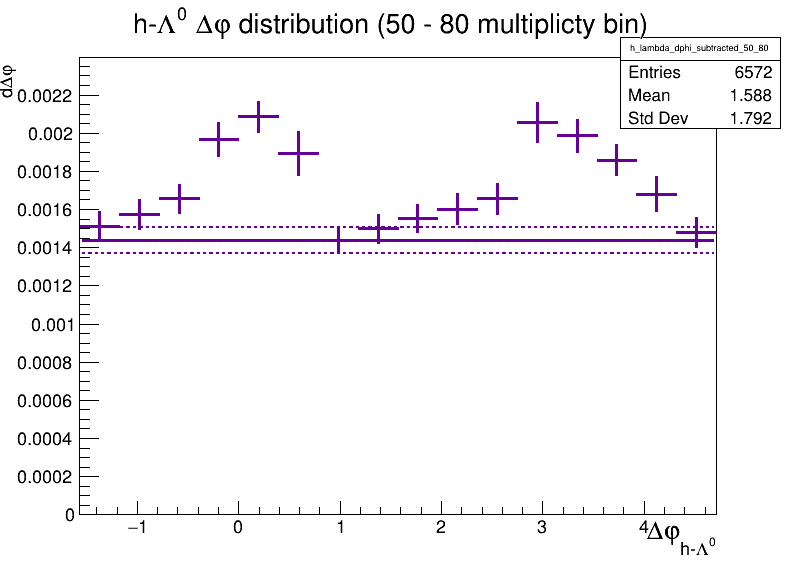

In [674]:
h_lambda_dphi_subtracted_50_80.GetYaxis().SetRangeUser(0, 1.15*max_val)
h_lambda_dphi_subtracted_50_80.Draw()
ue_line_50_80.Draw("SAME")
ue_upper_line_50_80.Draw("SAME")
ue_lower_line_50_80.Draw("SAME")
c.Draw()

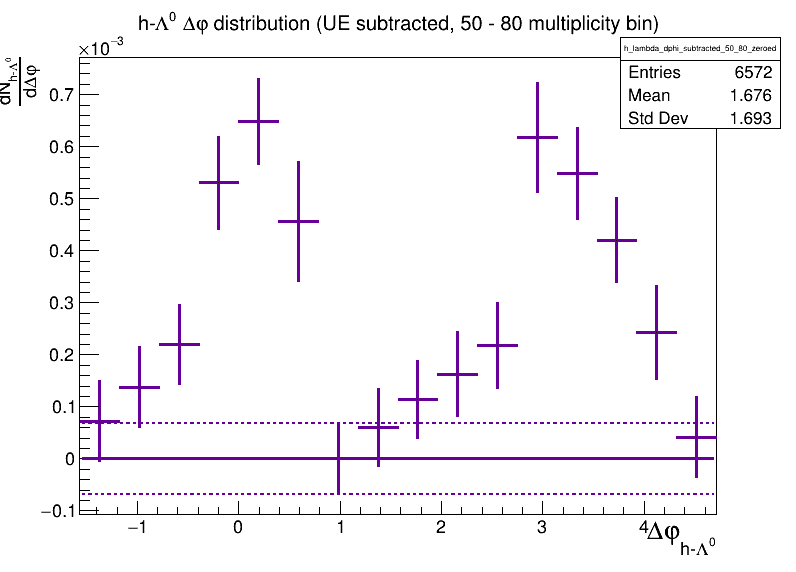

In [675]:
h_lambda_dphi_subtracted_50_80_zeroed = h_lambda_dphi_subtracted_50_80.Clone("h_lambda_dphi_subtracted_50_80_zeroed")
h_lambda_dphi_subtracted_50_80_zeroed.SetTitle("h-#Lambda^{0} #Delta#varphi distribution (UE subtracted, 50 - 80 multiplicity bin)")
h_lambda_dphi_subtracted_50_80_zeroed.Add(ue_line_50_80, -1)
h_lambda_dphi_subtracted_50_80_zeroed.Draw()
zero_line_50_80.Draw("SAME")
zero_upper_line_50_80.Draw("SAME")
zero_lower_line_50_80.Draw("SAME")
c.Draw()

In [676]:
DPHI_BINS = h_lambda_dphi_subtracted_50_80.GetNbinsX()

In [677]:
h_lambda_total_integral_50_80 = 0
h_lambda_near_integral_50_80 = 0
h_lambda_away_integral_50_80 = 0
h_lambda_ue_integral_50_80 = ue_avg_50_80*DPHI_BINS

h_lambda_total_integral_error_50_80 = 0
h_lambda_near_integral_error_50_80 = 0
h_lambda_away_integral_error_50_80 = 0
h_lambda_ue_integral_error_50_80 = ue_avg_error_50_80*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_lambda_total_integral_50_80 += h_lambda_dphi_subtracted_50_80.GetBinContent(bin_num)
    h_lambda_total_integral_error_50_80 += h_lambda_dphi_subtracted_50_80.GetBinError(bin_num)**2
    part = h_lambda_dphi_subtracted_50_80.GetBinContent(bin_num) - ue_avg_50_80
    if part < 0:
        continue
    if bin_num < 9:
        h_lambda_near_integral_50_80 += part
        h_lambda_near_integral_error_50_80 += h_lambda_dphi_subtracted_50_80.GetBinError(bin_num)**2
        h_lambda_near_integral_error_50_80 += ue_avg_error_50_80**2
    else:
        h_lambda_away_integral_50_80 += part
        h_lambda_away_integral_error_50_80 += h_lambda_dphi_subtracted_50_80.GetBinError(bin_num)**2
        h_lambda_away_integral_error_50_80 += ue_avg_error_50_80**2
h_lambda_total_integral_error_50_80 = math.sqrt(h_lambda_total_integral_error_50_80)
h_lambda_near_integral_error_50_80 = math.sqrt(h_lambda_near_integral_error_50_80)
h_lambda_away_integral_error_50_80 = math.sqrt(h_lambda_away_integral_error_50_80)
print(h_lambda_total_integral_50_80, h_lambda_total_integral_error_50_80)
print(h_lambda_near_integral_50_80, h_lambda_near_integral_error_50_80)
print(h_lambda_away_integral_50_80, h_lambda_away_integral_error_50_80)


0.02749410495407461 0.0003391429901438279
0.0021248984515912783 0.00030434689727892763
0.0023672025737908236 0.00030886845424286344


In [678]:
h_lambda_total_integral_50_80_highest_pt = 0
h_lambda_near_integral_50_80_highest_pt = 0
h_lambda_away_integral_50_80_highest_pt = 0
h_lambda_ue_integral_50_80_highest_pt = ue_avg_50_80_highest_pt*DPHI_BINS

h_lambda_total_integral_error_50_80_highest_pt = 0
h_lambda_near_integral_error_50_80_highest_pt = 0
h_lambda_away_integral_error_50_80_highest_pt = 0
h_lambda_ue_integral_error_50_80_highest_pt = ue_avg_error_50_80_highest_pt*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_lambda_total_integral_50_80_highest_pt += h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(bin_num)
    h_lambda_total_integral_error_50_80_highest_pt += h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(bin_num)**2
    part = h_lambda_dphi_subtracted_50_80_highest_pt.GetBinContent(bin_num) - ue_avg_50_80_highest_pt
    if part < 0:
        continue
    if bin_num < 9:
        h_lambda_near_integral_50_80_highest_pt += part 
        h_lambda_near_integral_error_50_80_highest_pt += h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(bin_num)**2
        h_lambda_near_integral_error_50_80_highest_pt += ue_avg_error_50_80_highest_pt**2
    else:
        h_lambda_away_integral_50_80_highest_pt += part 
        h_lambda_away_integral_error_50_80_highest_pt += h_lambda_dphi_subtracted_50_80_highest_pt.GetBinError(bin_num)**2
        h_lambda_away_integral_error_50_80_highest_pt += ue_avg_error_50_80_highest_pt**2
h_lambda_total_integral_error_50_80_highest_pt = math.sqrt(h_lambda_total_integral_error_50_80_highest_pt)
h_lambda_near_integral_error_50_80_highest_pt = math.sqrt(h_lambda_near_integral_error_50_80_highest_pt)
h_lambda_away_integral_error_50_80_highest_pt = math.sqrt(h_lambda_away_integral_error_50_80_highest_pt)

In [679]:
h_h_dphi_50_80 = h_h_2d_mixcor_50_80.ProjectionY("h_h_dphi_50_80")
h_h_dphi_50_80.SetTitle("h-h #Delta#varphi distribution (50 - 80 multiplicty bin)")
h_h_dphi_50_80.SetLineColor(rt.kBlue)
h_h_dphi_50_80.SetLineWidth(3)
h_h_dphi_50_80.GetYaxis().SetTitle("#frac{dN_{h-h}}{d#Delta#varphi}")
h_h_dphi_50_80.GetXaxis().SetTitleSize(0.05)
h_h_dphi_50_80.GetXaxis().SetTitleOffset(0.5)

In [680]:
h_h_dphi_50_80_highest_pt = h_h_2d_mixcor_50_80_highest_pt.ProjectionY("h_h_dphi_50_80_highest_pt")
h_h_dphi_50_80_highest_pt.SetTitle("h-h #Delta#varphi distribution (50 - 80 multiplicty bin)")
h_h_dphi_50_80_highest_pt.SetLineColor(rt.kBlue)
h_h_dphi_50_80_highest_pt.SetLineWidth(3)
h_h_dphi_50_80_highest_pt.GetYaxis().SetTitle("#frac{dN_{h-h}}{d#Delta#varphi}")
h_h_dphi_50_80_highest_pt.GetXaxis().SetTitleSize(0.05)
h_h_dphi_50_80_highest_pt.GetXaxis().SetTitleOffset(0.5)

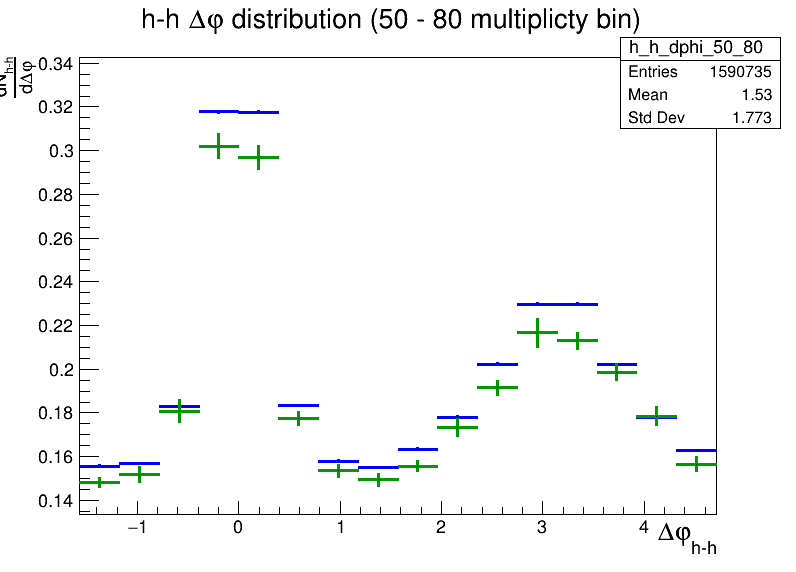

In [681]:
h_h_dphi_50_80.GetYaxis().SetRangeUser(h_h_dphi_50_80_highest_pt.GetMinimum()*0.9, 
                                       h_h_dphi_50_80.GetMaximum()*1.1)
h_h_dphi_50_80_highest_pt.SetLineColor(rt.kGreen + 2)
h_h_dphi_50_80.Draw()
h_h_dphi_50_80_highest_pt.Draw("SAME")
c.Draw()

In [682]:
if USE_AVG_4:
    hh_ue_line_50_80 = rt.TF1("hh_ue_line_50_80", "pol0", -2, 6)
    hh_ue_upper_line_50_80 = rt.TF1("hh_ue_upper_line_50_80", "pol0", -2, 6)
    hh_ue_lower_line_50_80 = rt.TF1("hh_ue_lower_line_50_80", "pol0", -2, 6)
    hh_zero_line_50_80 = rt.TF1("hh_zero_line_50_80", "pol0", -2, 6)
    hh_zero_upper_line_50_80 = rt.TF1("hh_zero_upper_line_50_80", "pol0", -2, 6)
    hh_zero_lower_line_50_80 = rt.TF1("hh_zero_lower_line_50_80", "pol0", -2, 6)
    hh_ue_avg_50_80 = (h_h_dphi_50_80.GetBinContent(1) 
                   + h_h_dphi_50_80.GetBinContent(8)
                   + h_h_dphi_50_80.GetBinContent(9)
                   + h_h_dphi_50_80.GetBinContent(16))/4

    hh_ue_avg_error_50_80 = (1/4)*(math.sqrt(h_h_dphi_50_80.GetBinError(1)**2 
                   + h_h_dphi_50_80.GetBinError(8)**2
                   + h_h_dphi_50_80.GetBinError(9)**2
                   + h_h_dphi_50_80.GetBinError(16)**2))


    hh_ue_line_50_80.SetParameter(0, hh_ue_avg_50_80)
    hh_ue_line_50_80.SetLineColor(rt.kBlue)
    hh_ue_line_50_80.SetLineWidth(3)
    hh_ue_line_50_80.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_50_80.SetParameter(0, hh_ue_avg_50_80 + hh_ue_avg_error_50_80)
    hh_ue_upper_line_50_80.SetLineColor(rt.kBlue)
    hh_ue_upper_line_50_80.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_50_80.SetParameter(0, hh_ue_avg_50_80 - hh_ue_avg_error_50_80)
    hh_ue_lower_line_50_80.SetLineColor(rt.kBlue)
    hh_ue_lower_line_50_80.SetLineStyle(rt.kDashed)

    hh_zero_line_50_80.SetParameter(0, 0)
    hh_zero_line_50_80.SetLineColor(rt.kBlue)
    hh_zero_line_50_80.SetLineWidth(3)
    hh_zero_line_50_80.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_50_80.SetParameter(0, hh_ue_avg_error_50_80)
    hh_zero_upper_line_50_80.SetLineColor(rt.kBlue)
    hh_zero_upper_line_50_80.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_50_80.SetParameter(0, -hh_ue_avg_error_50_80)
    hh_zero_lower_line_50_80.SetLineColor(rt.kBlue)
    hh_zero_lower_line_50_80.SetLineStyle(rt.kDashed)
elif USE_AVG_6:
    hh_ue_line_50_80 = rt.TF1("hh_ue_line_50_80", "pol0", -2, 6)
    hh_ue_upper_line_50_80 = rt.TF1("hh_ue_upper_line_50_80", "pol0", -2, 6)
    hh_ue_lower_line_50_80 = rt.TF1("hh_ue_lower_line_50_80", "pol0", -2, 6)
    hh_zero_line_50_80 = rt.TF1("hh_zero_line_50_80", "pol0", -2, 6)
    hh_zero_upper_line_50_80 = rt.TF1("hh_zero_upper_line_50_80", "pol0", -2, 6)
    hh_zero_lower_line_50_80 = rt.TF1("hh_zero_lower_line_50_80", "pol0", -2, 6)
    hh_ue_avg_50_80 = (h_h_dphi_50_80.GetBinContent(1) 
                   + h_h_dphi_50_80.GetBinContent(2)
                   + h_h_dphi_50_80.GetBinContent(7)
                   + h_h_dphi_50_80.GetBinContent(8)
                   + h_h_dphi_50_80.GetBinContent(9)
                   + h_h_dphi_50_80.GetBinContent(16))/6

    hh_ue_avg_error_50_80 = (1/6)*(math.sqrt(h_h_dphi_50_80.GetBinError(1)**2 
                   + h_h_dphi_50_80.GetBinError(2)**2
                   + h_h_dphi_50_80.GetBinError(7)**2
                   + h_h_dphi_50_80.GetBinError(8)**2
                   + h_h_dphi_50_80.GetBinError(9)**2
                   + h_h_dphi_50_80.GetBinError(16)**2))


    hh_ue_line_50_80.SetParameter(0, hh_ue_avg_50_80)
    hh_ue_line_50_80.SetLineColor(rt.kBlue)
    hh_ue_line_50_80.SetLineWidth(3)
    hh_ue_line_50_80.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_50_80.SetParameter(0, hh_ue_avg_50_80 + hh_ue_avg_error_50_80)
    hh_ue_upper_line_50_80.SetLineColor(rt.kBlue)
    hh_ue_upper_line_50_80.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_50_80.SetParameter(0, hh_ue_avg_50_80 - hh_ue_avg_error_50_80)
    hh_ue_lower_line_50_80.SetLineColor(rt.kBlue)
    hh_ue_lower_line_50_80.SetLineStyle(rt.kDashed)

    hh_zero_line_50_80.SetParameter(0, 0)
    hh_zero_line_50_80.SetLineColor(rt.kBlue)
    hh_zero_line_50_80.SetLineWidth(3)
    hh_zero_line_50_80.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_50_80.SetParameter(0, hh_ue_avg_error_50_80)
    hh_zero_upper_line_50_80.SetLineColor(rt.kBlue)
    hh_zero_upper_line_50_80.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_50_80.SetParameter(0, -hh_ue_avg_error_50_80)
    hh_zero_lower_line_50_80.SetLineColor(rt.kBlue)
    hh_zero_lower_line_50_80.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    hh_ue_line_50_80 = rt.TF1("hh_ue_line_50_80", "pol0", -2, 6)
    hh_ue_upper_line_50_80 = rt.TF1("hh_ue_upper_line_50_80", "pol0", -2, 6)
    hh_ue_lower_line_50_80 = rt.TF1("hh_ue_lower_line_50_80", "pol0", -2, 6)
    hh_zero_line_50_80 = rt.TF1("hh_zero_line_50_80", "pol0", -2, 6)
    hh_zero_upper_line_50_80 = rt.TF1("hh_zero_upper_line_50_80", "pol0", -2, 6)
    hh_zero_lower_line_50_80 = rt.TF1("hh_zero_lower_line_50_80", "pol0", -2, 6)
    
    min_bin = h_h_dphi_50_80.GetMinimumBin()
    hh_ue_avg_50_80 = h_h_dphi_50_80.GetBinContent(min_bin)
    hh_ue_avg_error_50_80 = h_h_dphi_50_80.GetBinError(min_bin)

    hh_ue_line_50_80.SetParameter(0, hh_ue_avg_50_80)
    hh_ue_line_50_80.SetLineColor(rt.kBlue)
    hh_ue_line_50_80.SetLineWidth(3)
    hh_ue_line_50_80.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_50_80.SetParameter(0, hh_ue_avg_50_80 + hh_ue_avg_error_50_80)
    hh_ue_upper_line_50_80.SetLineColor(rt.kBlue)
    hh_ue_upper_line_50_80.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_50_80.SetParameter(0, hh_ue_avg_50_80 - hh_ue_avg_error_50_80)
    hh_ue_lower_line_50_80.SetLineColor(rt.kBlue)
    hh_ue_lower_line_50_80.SetLineStyle(rt.kDashed)

    hh_zero_line_50_80.SetParameter(0, 0)
    hh_zero_line_50_80.SetLineColor(rt.kBlue)
    hh_zero_line_50_80.SetLineWidth(3)
    hh_zero_line_50_80.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_50_80.SetParameter(0, hh_ue_avg_error_50_80)
    hh_zero_upper_line_50_80.SetLineColor(rt.kBlue)
    hh_zero_upper_line_50_80.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_50_80.SetParameter(0, -hh_ue_avg_error_50_80)
    hh_zero_lower_line_50_80.SetLineColor(rt.kBlue)
    hh_zero_lower_line_50_80.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

In [683]:
if USE_AVG_4:
    hh_ue_line_50_80_highest_pt = rt.TF1("hh_ue_line_50_80_highest_pt", "pol0", -2, 6)
    hh_ue_upper_line_50_80_highest_pt = rt.TF1("hh_ue_upper_line_50_80_highest_pt", "pol0", -2, 6)
    hh_ue_lower_line_50_80_highest_pt = rt.TF1("hh_ue_lower_line_50_80_highest_pt", "pol0", -2, 6)
    hh_zero_line_50_80_highest_pt = rt.TF1("hh_zero_line_50_80_highest_pt", "pol0", -2, 6)
    hh_zero_upper_line_50_80_highest_pt = rt.TF1("hh_zero_upper_line_50_80_highest_pt", "pol0", -2, 6)
    hh_zero_lower_line_50_80_highest_pt = rt.TF1("hh_zero_lower_line_50_80_highest_pt", "pol0", -2, 6)
    hh_ue_avg_50_80_highest_pt = (h_h_dphi_50_80_highest_pt.GetBinContent(1) 
                   + h_h_dphi_50_80_highest_pt.GetBinContent(8)
                   + h_h_dphi_50_80_highest_pt.GetBinContent(9)
                   + h_h_dphi_50_80_highest_pt.GetBinContent(16))/4

    hh_ue_avg_error_50_80_highest_pt = (1/4)*(math.sqrt(h_h_dphi_50_80_highest_pt.GetBinError(1)**2 
                   + h_h_dphi_50_80_highest_pt.GetBinError(8)**2
                   + h_h_dphi_50_80_highest_pt.GetBinError(9)**2
                   + h_h_dphi_50_80_highest_pt.GetBinError(16)**2))


    hh_ue_line_50_80_highest_pt.SetParameter(0, hh_ue_avg_50_80_highest_pt)
    hh_ue_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_line_50_80_highest_pt.SetLineWidth(3)
    hh_ue_line_50_80_highest_pt.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_50_80_highest_pt.SetParameter(0, hh_ue_avg_50_80_highest_pt + hh_ue_avg_error_50_80_highest_pt)
    hh_ue_upper_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_upper_line_50_80_highest_pt.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_50_80_highest_pt.SetParameter(0, hh_ue_avg_50_80_highest_pt - hh_ue_avg_error_50_80_highest_pt)
    hh_ue_lower_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_lower_line_50_80_highest_pt.SetLineStyle(rt.kDashed)

    hh_zero_line_50_80_highest_pt.SetParameter(0, 0)
    hh_zero_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_line_50_80_highest_pt.SetLineWidth(3)
    hh_zero_line_50_80_highest_pt.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_50_80_highest_pt.SetParameter(0, hh_ue_avg_error_50_80_highest_pt)
    hh_zero_upper_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_upper_line_50_80_highest_pt.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_50_80_highest_pt.SetParameter(0, -hh_ue_avg_error_50_80_highest_pt)
    hh_zero_lower_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_lower_line_50_80_highest_pt.SetLineStyle(rt.kDashed)
elif USE_AVG_6:
    hh_ue_line_50_80_highest_pt = rt.TF1("hh_ue_line_50_80_highest_pt", "pol0", -2, 6)
    hh_ue_upper_line_50_80_highest_pt = rt.TF1("hh_ue_upper_line_50_80_highest_pt", "pol0", -2, 6)
    hh_ue_lower_line_50_80_highest_pt = rt.TF1("hh_ue_lower_line_50_80_highest_pt", "pol0", -2, 6)
    hh_zero_line_50_80_highest_pt = rt.TF1("hh_zero_line_50_80_highest_pt", "pol0", -2, 6)
    hh_zero_upper_line_50_80_highest_pt = rt.TF1("hh_zero_upper_line_50_80_highest_pt", "pol0", -2, 6)
    hh_zero_lower_line_50_80_highest_pt = rt.TF1("hh_zero_lower_line_50_80_highest_pt", "pol0", -2, 6)
    hh_ue_avg_50_80_highest_pt = (h_h_dphi_50_80_highest_pt.GetBinContent(1) 
                   + h_h_dphi_50_80_highest_pt.GetBinContent(2)
                   + h_h_dphi_50_80_highest_pt.GetBinContent(7)
                   + h_h_dphi_50_80_highest_pt.GetBinContent(8)
                   + h_h_dphi_50_80_highest_pt.GetBinContent(9)
                   + h_h_dphi_50_80_highest_pt.GetBinContent(16))/6

    hh_ue_avg_error_50_80_highest_pt = (1/6)*(math.sqrt(h_h_dphi_50_80_highest_pt.GetBinError(1)**2 
                   + h_h_dphi_50_80_highest_pt.GetBinError(2)**2
                   + h_h_dphi_50_80_highest_pt.GetBinError(7)**2
                   + h_h_dphi_50_80_highest_pt.GetBinError(8)**2
                   + h_h_dphi_50_80_highest_pt.GetBinError(9)**2
                   + h_h_dphi_50_80_highest_pt.GetBinError(16)**2))


    hh_ue_line_50_80_highest_pt.SetParameter(0, hh_ue_avg_50_80_highest_pt)
    hh_ue_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_line_50_80_highest_pt.SetLineWidth(3)
    hh_ue_line_50_80_highest_pt.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_50_80_highest_pt.SetParameter(0, hh_ue_avg_50_80_highest_pt + hh_ue_avg_error_50_80_highest_pt)
    hh_ue_upper_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_upper_line_50_80_highest_pt.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_50_80_highest_pt.SetParameter(0, hh_ue_avg_50_80_highest_pt - hh_ue_avg_error_50_80_highest_pt)
    hh_ue_lower_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_lower_line_50_80_highest_pt.SetLineStyle(rt.kDashed)

    hh_zero_line_50_80_highest_pt.SetParameter(0, 0)
    hh_zero_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_line_50_80_highest_pt.SetLineWidth(3)
    hh_zero_line_50_80_highest_pt.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_50_80_highest_pt.SetParameter(0, hh_ue_avg_error_50_80_highest_pt)
    hh_zero_upper_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_upper_line_50_80_highest_pt.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_50_80_highest_pt.SetParameter(0, -hh_ue_avg_error_50_80_highest_pt)
    hh_zero_lower_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_lower_line_50_80_highest_pt.SetLineStyle(rt.kDashed)
elif USE_ZYAM:
    hh_ue_line_50_80_highest_pt = rt.TF1("hh_ue_line_50_80_highest_pt", "pol0", -2, 6)
    hh_ue_upper_line_50_80_highest_pt = rt.TF1("hh_ue_upper_line_50_80_highest_pt", "pol0", -2, 6)
    hh_ue_lower_line_50_80_highest_pt = rt.TF1("hh_ue_lower_line_50_80_highest_pt", "pol0", -2, 6)
    hh_zero_line_50_80_highest_pt = rt.TF1("hh_zero_line_50_80_highest_pt", "pol0", -2, 6)
    hh_zero_upper_line_50_80_highest_pt = rt.TF1("hh_zero_upper_line_50_80_highest_pt", "pol0", -2, 6)
    hh_zero_lower_line_50_80_highest_pt = rt.TF1("hh_zero_lower_line_50_80_highest_pt", "pol0", -2, 6)
    
    min_bin = h_h_dphi_50_80_highest_pt.GetMinimumBin()
    hh_ue_avg_50_80_highest_pt = h_h_dphi_50_80_highest_pt.GetBinContent(min_bin)
    hh_ue_avg_error_50_80_highest_pt = h_h_dphi_50_80_highest_pt.GetBinError(min_bin)

    hh_ue_line_50_80_highest_pt.SetParameter(0, hh_ue_avg_50_80_highest_pt)
    hh_ue_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_line_50_80_highest_pt.SetLineWidth(3)
    hh_ue_line_50_80_highest_pt.SetLineStyle(rt.kSolid)

    hh_ue_upper_line_50_80_highest_pt.SetParameter(0, hh_ue_avg_50_80_highest_pt + hh_ue_avg_error_50_80_highest_pt)
    hh_ue_upper_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_upper_line_50_80_highest_pt.SetLineStyle(rt.kDashed)

    hh_ue_lower_line_50_80_highest_pt.SetParameter(0, hh_ue_avg_50_80_highest_pt - hh_ue_avg_error_50_80_highest_pt)
    hh_ue_lower_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_ue_lower_line_50_80_highest_pt.SetLineStyle(rt.kDashed)

    hh_zero_line_50_80_highest_pt.SetParameter(0, 0)
    hh_zero_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_line_50_80_highest_pt.SetLineWidth(3)
    hh_zero_line_50_80_highest_pt.SetLineStyle(rt.kSolid)
    hh_zero_upper_line_50_80_highest_pt.SetParameter(0, hh_ue_avg_error_50_80_highest_pt)
    hh_zero_upper_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_upper_line_50_80_highest_pt.SetLineStyle(rt.kDashed)
    hh_zero_lower_line_50_80_highest_pt.SetParameter(0, -hh_ue_avg_error_50_80_highest_pt)
    hh_zero_lower_line_50_80_highest_pt.SetLineColor(rt.kBlue)
    hh_zero_lower_line_50_80_highest_pt.SetLineStyle(rt.kDashed)
else:
    raise NotImplementedError("UE line mode not supported")

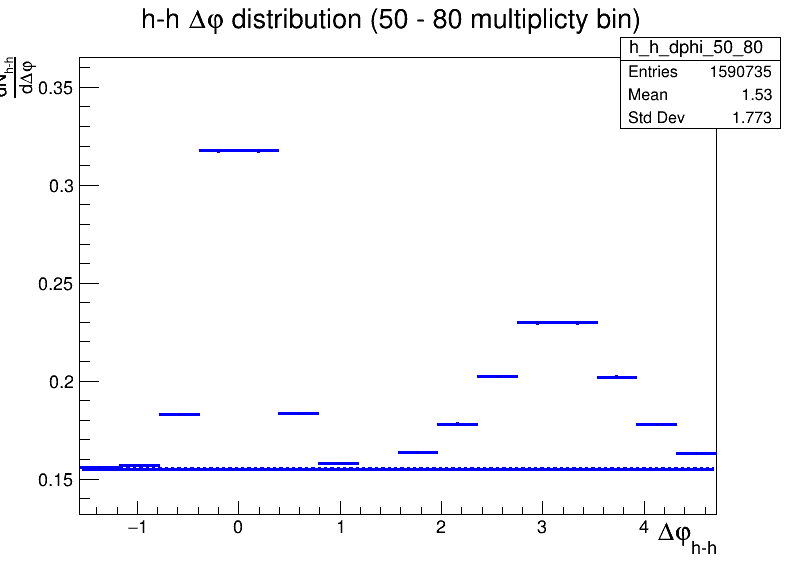

In [684]:
min_bin = h_h_dphi_50_80.GetMinimumBin()
min_val = h_h_dphi_50_80.GetBinContent(min_bin)
max_bin = h_h_dphi_50_80.GetMaximumBin()
max_val = h_h_dphi_50_80.GetBinContent(max_bin)

h_h_dphi_50_80.GetYaxis().SetRangeUser(0.85*min_val, 1.15*max_val)

h_h_dphi_50_80.Draw()
hh_ue_line_50_80.Draw("SAME")
hh_ue_upper_line_50_80.Draw("SAME")
hh_ue_lower_line_50_80.Draw("SAME")
c.Draw()

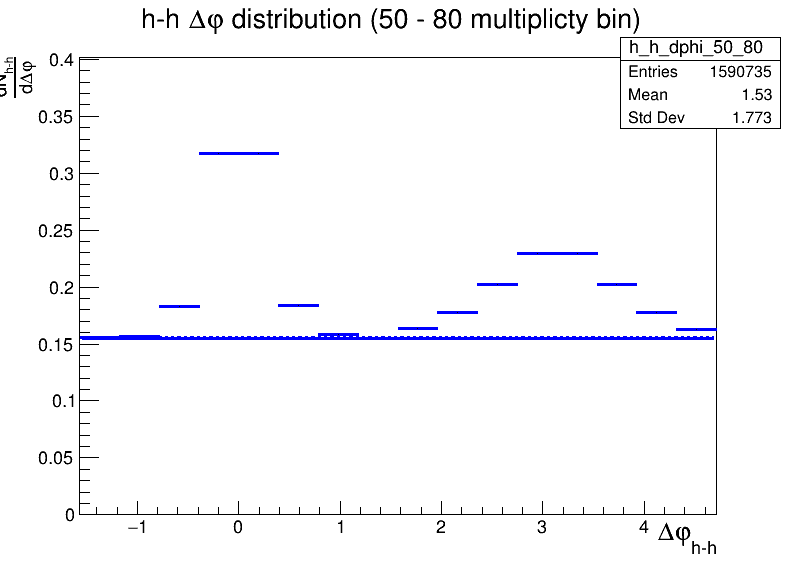

In [685]:
h_h_dphi_50_80.GetYaxis().SetRangeUser(0, h_h_dphi_50_80.GetMaximum()*1.1)
h_h_dphi_50_80.Draw()
hh_ue_line_50_80.Draw("SAME")
hh_ue_upper_line_50_80.Draw("SAME")
hh_ue_lower_line_50_80.Draw("SAME")
c.Draw()

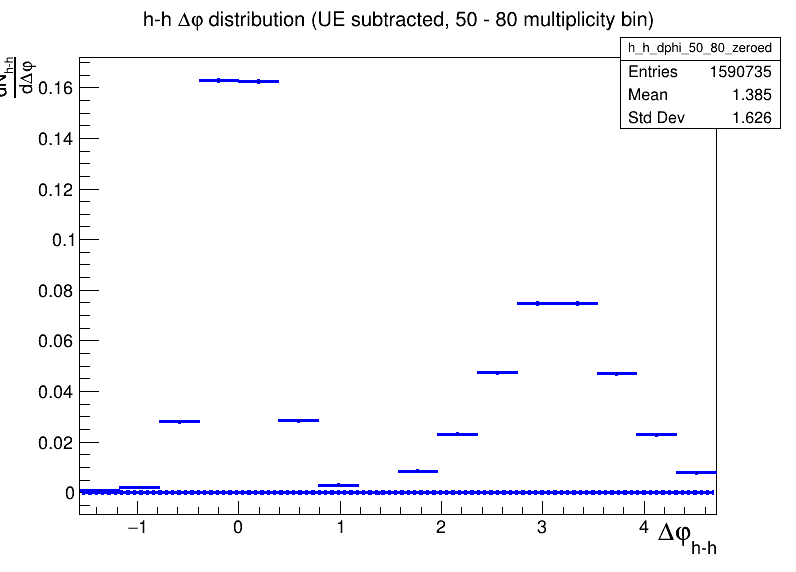

In [686]:
h_h_dphi_50_80_zeroed = h_h_dphi_50_80.Clone("h_h_dphi_50_80_zeroed")
h_h_dphi_50_80_zeroed.SetTitle("h-h #Delta#varphi distribution (UE subtracted, 50 - 80 multiplicity bin)")
h_h_dphi_50_80_zeroed.Add(hh_ue_line_50_80, -1)
h_h_dphi_50_80_zeroed.Draw()
hh_zero_line_50_80.Draw("SAME")
hh_zero_upper_line_50_80.Draw("SAME")
hh_zero_lower_line_50_80.Draw("SAME")
c.Draw()

In [687]:
h_h_total_integral_50_80 = 0
h_h_near_integral_50_80 = 0
h_h_away_integral_50_80 = 0
h_h_ue_integral_50_80 = hh_ue_avg_50_80*DPHI_BINS

h_h_total_integral_error_50_80 = 0
h_h_near_integral_error_50_80 = 0
h_h_away_integral_error_50_80 = 0
h_h_ue_integral_error_50_80 = hh_ue_avg_error_50_80*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_h_total_integral_50_80 += h_h_dphi_50_80.GetBinContent(bin_num)
    h_h_total_integral_error_50_80 += h_h_dphi_50_80.GetBinError(bin_num)**2
    part = h_h_dphi_50_80.GetBinContent(bin_num) - hh_ue_avg_50_80
    if part < 0:
        continue
    if bin_num < 9:
        h_h_near_integral_50_80 += part
        h_h_near_integral_error_50_80 += h_h_dphi_50_80.GetBinError(bin_num)**2
        h_h_near_integral_error_50_80 += hh_ue_avg_error_50_80**2
    else:
        h_h_away_integral_50_80 += part
        h_h_away_integral_error_50_80 += h_h_dphi_50_80.GetBinError(bin_num)**2
        h_h_away_integral_error_50_80 += hh_ue_avg_error_50_80**2
h_h_total_integral_error_50_80 = math.sqrt(h_h_total_integral_error_50_80)
h_h_near_integral_error_50_80 = math.sqrt(h_h_near_integral_error_50_80)
h_h_away_integral_error_50_80 = math.sqrt(h_h_away_integral_error_50_80)
print(h_h_away_integral_50_80)
print(h_h_near_integral_50_80)

0.3061826829781803
0.38741127773588513


In [688]:
h_h_total_integral_50_80_highest_pt = 0
h_h_near_integral_50_80_highest_pt = 0
h_h_away_integral_50_80_highest_pt = 0
h_h_ue_integral_50_80_highest_pt = hh_ue_avg_50_80_highest_pt*DPHI_BINS

h_h_total_integral_error_50_80_highest_pt = 0
h_h_near_integral_error_50_80_highest_pt = 0
h_h_away_integral_error_50_80_highest_pt = 0
h_h_ue_integral_error_50_80_highest_pt = hh_ue_avg_error_50_80_highest_pt*DPHI_BINS

for bin_num in range(1, DPHI_BINS + 1):
    h_h_total_integral_50_80_highest_pt += h_h_dphi_50_80_highest_pt.GetBinContent(bin_num)
    h_h_total_integral_error_50_80_highest_pt += h_h_dphi_50_80_highest_pt.GetBinError(bin_num)**2
    part = h_h_dphi_50_80_highest_pt.GetBinContent(bin_num) - hh_ue_avg_50_80_highest_pt
    if part < 0:
        continue
    if bin_num < 9:
        h_h_near_integral_50_80_highest_pt += part
        h_h_near_integral_error_50_80_highest_pt += h_h_dphi_50_80_highest_pt.GetBinError(bin_num)**2
        h_h_near_integral_error_50_80_highest_pt += hh_ue_avg_error_50_80_highest_pt**2
    else:
        h_h_away_integral_50_80_highest_pt += part
        h_h_away_integral_error_50_80_highest_pt += h_h_dphi_50_80_highest_pt.GetBinError(bin_num)**2
        h_h_away_integral_error_50_80_highest_pt += hh_ue_avg_error_50_80_highest_pt**2
h_h_total_integral_error_50_80_highest_pt = math.sqrt(h_h_total_integral_error_50_80_highest_pt)
h_h_near_integral_error_50_80_highest_pt = math.sqrt(h_h_near_integral_error_50_80_highest_pt)
h_h_away_integral_error_50_80_highest_pt = math.sqrt(h_h_away_integral_error_50_80_highest_pt)

In [689]:
near_ratio_50_80 = h_lambda_near_integral_50_80/h_h_near_integral_50_80
away_ratio_50_80 = h_lambda_away_integral_50_80/h_h_away_integral_50_80
ue_ratio_50_80 = h_lambda_ue_integral_50_80/h_h_ue_integral_50_80
total_ratio_50_80 = h_lambda_total_integral_50_80/h_h_total_integral_50_80

near_ratio_error_50_80 = near_ratio_50_80*math.sqrt((h_lambda_near_integral_error_50_80/h_lambda_near_integral_50_80)**2
                                                 + (h_h_near_integral_error_50_80/h_h_near_integral_50_80)**2)
away_ratio_error_50_80 = away_ratio_50_80*math.sqrt((h_lambda_away_integral_error_50_80/h_lambda_away_integral_50_80)**2
                                                 + (h_h_away_integral_error_50_80/h_h_away_integral_50_80)**2)
ue_ratio_error_50_80 = ue_ratio_50_80*math.sqrt((h_lambda_ue_integral_error_50_80/h_lambda_ue_integral_50_80)**2
                                                 + (h_h_ue_integral_error_50_80/h_h_ue_integral_50_80)**2)
total_ratio_error_50_80 = total_ratio_50_80*math.sqrt((h_lambda_total_integral_error_50_80/h_lambda_total_integral_50_80)**2
                                                 + (h_h_total_integral_error_50_80/h_h_total_integral_50_80)**2)

In [690]:
near_ratio_50_80_highest_pt = h_lambda_near_integral_50_80_highest_pt/h_h_near_integral_50_80_highest_pt
away_ratio_50_80_highest_pt = h_lambda_away_integral_50_80_highest_pt/h_h_away_integral_50_80_highest_pt
ue_ratio_50_80_highest_pt = h_lambda_ue_integral_50_80_highest_pt/h_h_ue_integral_50_80_highest_pt
total_ratio_50_80_highest_pt = h_lambda_total_integral_50_80_highest_pt/h_h_total_integral_50_80_highest_pt

near_ratio_error_50_80_highest_pt = near_ratio_50_80_highest_pt*math.sqrt((h_lambda_near_integral_error_50_80_highest_pt/h_lambda_near_integral_50_80_highest_pt)**2
                                                 + (h_h_near_integral_error_50_80_highest_pt/h_h_near_integral_50_80_highest_pt)**2)
away_ratio_error_50_80_highest_pt = away_ratio_50_80_highest_pt*math.sqrt((h_lambda_away_integral_error_50_80_highest_pt/h_lambda_away_integral_50_80_highest_pt)**2
                                                 + (h_h_away_integral_error_50_80_highest_pt/h_h_away_integral_50_80_highest_pt)**2)
ue_ratio_error_50_80_highest_pt = ue_ratio_50_80_highest_pt*math.sqrt((h_lambda_ue_integral_error_50_80_highest_pt/h_lambda_ue_integral_50_80_highest_pt)**2
                                                 + (h_h_ue_integral_error_50_80_highest_pt/h_h_ue_integral_50_80_highest_pt)**2)
total_ratio_error_50_80_highest_pt = total_ratio_50_80_highest_pt*math.sqrt((h_lambda_total_integral_error_50_80_highest_pt/h_lambda_total_integral_50_80_highest_pt)**2
                                                 + (h_h_total_integral_error_50_80_highest_pt/h_h_total_integral_50_80_highest_pt)**2)

# Final ratio vs multiplicity 

### ALL TRIGGER SECTION

In [713]:
mult_list = arr.array('d', [35, 65, 90])
mult_error_list = arr.array('d', [15, 15, 10])

near_ratio_list = arr.array('d', [near_ratio_50_80, near_ratio_20_50, near_ratio_0_20])
near_ratio_error_list = arr.array('d', [near_ratio_error_0_20, near_ratio_error_20_50, near_ratio_error_50_80])

away_ratio_list = arr.array('d', [away_ratio_50_80, away_ratio_20_50, away_ratio_0_20])
away_ratio_error_list = arr.array('d', [away_ratio_error_50_80, away_ratio_error_20_50, away_ratio_error_0_20])

ue_ratio_list = arr.array('d', [ue_ratio_50_80, ue_ratio_20_50, ue_ratio_0_20])
ue_ratio_error_list = arr.array('d', [ue_ratio_error_50_80, ue_ratio_error_20_50, ue_ratio_error_0_20])

total_ratio_list = arr.array('d', [total_ratio_50_80, total_ratio_20_50, total_ratio_0_20])
total_ratio_error_list = arr.array('d', [total_ratio_error_50_80, total_ratio_error_20_50, total_ratio_error_0_20])

In [714]:
near_ratio_graph = rt.TGraphErrors(3, mult_list, near_ratio_list, mult_error_list, near_ratio_error_list)
near_ratio_graph.SetMarkerStyle(20)
near_ratio_graph.SetMarkerSize(2)
near_ratio_graph.SetMarkerColor(rt.kRed+1)
near_ratio_graph.SetLineColor(rt.kRed+2)
near_ratio_graph.SetLineWidth(2)
near_ratio_graph.GetXaxis().SetTitle("Multiplicity Percentile")
near_ratio_graph.GetXaxis().SetTitleSize(0.05)
near_ratio_graph.GetXaxis().SetLabelSize(0.04)
near_ratio_graph.GetXaxis().SetTitleOffset(0.9)
near_ratio_graph.GetXaxis().SetRangeUser(0.0, 100.0)
near_ratio_graph.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-h}#right)")
near_ratio_graph.GetYaxis().SetTitleSize(0.04)
near_ratio_graph.GetYaxis().SetTitleOffset(1.5)
near_ratio_graph.GetYaxis().SetRangeUser(0.0002, 0.0035)

In [715]:
away_ratio_graph = rt.TGraphErrors(3, mult_list, away_ratio_list, mult_error_list, away_ratio_error_list)
away_ratio_graph.SetMarkerStyle(21)
away_ratio_graph.SetMarkerSize(2)
away_ratio_graph.SetMarkerColor(rt.kBlue+1)
away_ratio_graph.SetLineColor(rt.kBlue+2)
away_ratio_graph.SetLineWidth(2)

In [716]:
ue_ratio_graph = rt.TGraphErrors(3, mult_list, ue_ratio_list, mult_error_list, ue_ratio_error_list)
ue_ratio_graph.SetMarkerStyle(22)
ue_ratio_graph.SetMarkerSize(2)
ue_ratio_graph.SetMarkerColor(rt.kGreen+2)
ue_ratio_graph.SetLineColor(rt.kGreen+3)
ue_ratio_graph.SetLineWidth(2)

In [717]:
total_ratio_graph = rt.TGraphErrors(3, mult_list, total_ratio_list, mult_error_list, total_ratio_error_list)
total_ratio_graph.SetMarkerStyle(29)
total_ratio_graph.SetMarkerSize(2)
total_ratio_graph.SetMarkerColor(rt.kMagenta+2)
total_ratio_graph.SetLineColor(rt.kMagenta+3)
total_ratio_graph.SetLineWidth(2)
total_ratio_graph.SetFillColor(rt.kMagenta+1)
total_ratio_graph.SetFillStyle(3144)

In [718]:
ratios_legend = rt.TLegend(0.183, 0.686, 0.461, 0.928)
ratios_legend.SetMargin(0.35)
ratios_legend.AddEntry(ue_ratio_graph, "Underlying Event", "pl")
ratios_legend.AddEntry(away_ratio_graph, "Away-side (Jet)", "pl")
ratios_legend.AddEntry(near_ratio_graph, "Near-side (Jet)", "pl")
ratios_legend.AddEntry(total_ratio_graph, "Total (Jet + UE)", "f")
ratios_legend.SetLineWidth(0)

In [719]:
pt_range_label = rt.TPaveText(0.6687, 0.6585, 0.9282, 0.7979, "NDC")
pt_range_label.AddText("trigger: 4.0 < p_{T}^{h} < 8.0 GeV/c")
pt_range_label.AddText("assoc: 1.0 < p_{T}^{#Lambda} < 2.0 GeV/c")
pt_range_label.SetTextSizePixels(18)
pt_range_label.SetFillColor(rt.kWhite)
pt_range_label.SetBorderSize(0)

In [720]:
alice_data_label = rt.TPaveText(0.6982, 0.8258, 0.8987, 0.9251, "NDC")
alice_data_label.AddText("ALICE")
alice_data_label.AddText("p-Pb #sqrt{s_{NN}} = 5.02 TeV")
alice_data_label.GetLine(0).SetTextSizePixels(32)
alice_data_label.GetLine(1).SetTextSizePixels(24)
alice_data_label.SetBorderSize(0)
alice_data_label.SetFillColor(rt.kWhite)

In [727]:
mult_bin_widths = arr.array('d', [0.0, 20.0, 50.0, 80.0, 100.0])
near_ratio_hist = rt.TH1D("near_ratio_hist", "", 4, mult_bin_widths)
for i in range(3):
    near_ratio_hist.SetBinContent(i+2, near_ratio_list[i])
    near_ratio_hist.SetBinError(i+2, near_ratio_error_list[i])
near_ratio_hist.SetMarkerStyle(20)
near_ratio_hist.SetMarkerSize(1)
near_ratio_hist.SetMarkerColor(rt.kRed+1)
near_ratio_hist.SetLineColor(rt.kRed+2)
near_ratio_hist.SetLineWidth(2)
near_ratio_hist.GetXaxis().SetTitle("Multiplicity Percentile")
near_ratio_hist.GetXaxis().SetTitleSize(0.05)
near_ratio_hist.GetXaxis().SetLabelSize(0.04)
near_ratio_hist.GetXaxis().SetTitleOffset(1.2)
near_ratio_hist.GetXaxis().SetRangeUser(0.0, 100.0)
near_ratio_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-h}#right)")
near_ratio_hist.GetYaxis().SetTitleSize(0.04)
near_ratio_hist.GetYaxis().SetTitleOffset(1.5)
near_ratio_hist.GetYaxis().SetRangeUser(0.0, 0.02)
near_ratio_hist.SetStats(0)

Warning in <TFile::Append>: Replacing existing TH1: near_ratio_hist (Potential memory leak).


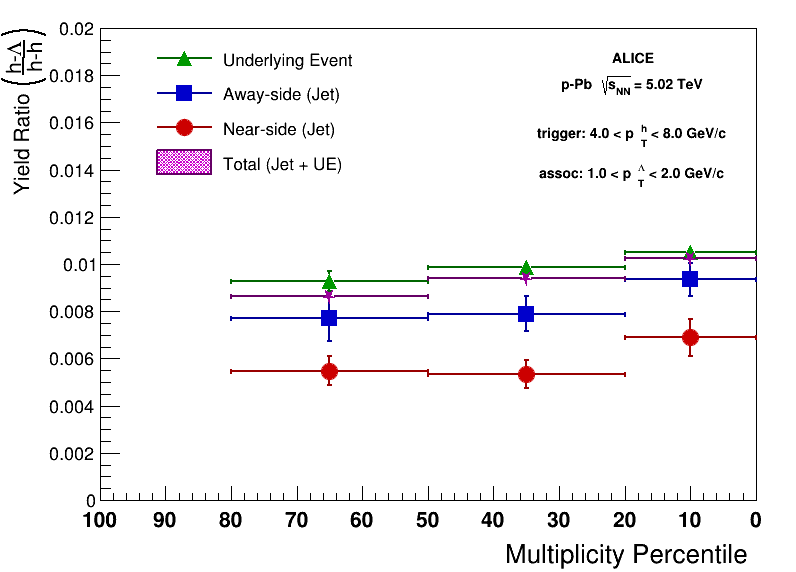

In [728]:
c.SetMargin(0.126, 0.05, 0.125, 0.05)
near_ratio_hist.Draw("PE")
near_ratio_hist.GetXaxis().SetLabelOffset(999)
near_ratio_hist.GetXaxis().SetTickSize(0)
rt.gPad.Update()
new_axis = rt.TGaxis(rt.gPad.GetUxmax(),
        rt.gPad.GetUymin(),
        rt.gPad.GetUxmin(),
        rt.gPad.GetUymin(),
        near_ratio_hist.GetXaxis().GetXmin(),
        near_ratio_hist.GetXaxis().GetXmax(),
        510,"-")
new_axis.SetLabelOffset(-0.03)
new_axis.Draw()
near_ratio_graph.Draw("P")
away_ratio_graph.Draw("P")
ue_ratio_graph.Draw("P")
total_ratio_graph.Draw("P")
ratios_legend.Draw()
pt_range_label.Draw()
alice_data_label.Draw()
c.Draw()

### HIGHEST PT TRIGGER SECTION

In [701]:
mult_list = arr.array('d', [35, 65, 90])
mult_error_list = arr.array('d', [15, 15, 10])

near_ratio_list = arr.array('d', [near_ratio_50_80_highest_pt, near_ratio_20_50_highest_pt, near_ratio_0_20_highest_pt])
near_ratio_error_list = arr.array('d', [near_ratio_error_0_20_highest_pt, near_ratio_error_20_50_highest_pt, near_ratio_error_50_80_highest_pt])

away_ratio_list = arr.array('d', [away_ratio_50_80_highest_pt, away_ratio_20_50_highest_pt, away_ratio_0_20_highest_pt])
away_ratio_error_list = arr.array('d', [away_ratio_error_50_80_highest_pt, away_ratio_error_20_50_highest_pt, away_ratio_error_0_20_highest_pt])

ue_ratio_list = arr.array('d', [ue_ratio_50_80_highest_pt, ue_ratio_20_50_highest_pt, ue_ratio_0_20_highest_pt])
ue_ratio_error_list = arr.array('d', [ue_ratio_error_50_80_highest_pt, ue_ratio_error_20_50_highest_pt, ue_ratio_error_0_20_highest_pt])

total_ratio_list = arr.array('d', [total_ratio_50_80_highest_pt, total_ratio_20_50_highest_pt, total_ratio_0_20_highest_pt])
total_ratio_error_list = arr.array('d', [total_ratio_error_50_80_highest_pt, total_ratio_error_20_50_highest_pt, total_ratio_error_0_20_highest_pt])

In [702]:
near_ratio_graph = rt.TGraphErrors(3, mult_list, near_ratio_list, mult_error_list, near_ratio_error_list)
near_ratio_graph.SetMarkerStyle(20)
near_ratio_graph.SetMarkerSize(2)
near_ratio_graph.SetMarkerColor(rt.kRed+1)
near_ratio_graph.SetLineColor(rt.kRed+2)
near_ratio_graph.SetLineWidth(2)
near_ratio_graph.GetXaxis().SetTitle("Multiplicity Percentile")
near_ratio_graph.GetXaxis().SetTitleSize(0.05)
near_ratio_graph.GetXaxis().SetLabelSize(0.04)
near_ratio_graph.GetXaxis().SetTitleOffset(0.9)
near_ratio_graph.GetXaxis().SetRangeUser(0.0, 100.0)
near_ratio_graph.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-h}#right)")
near_ratio_graph.GetYaxis().SetTitleSize(0.04)
near_ratio_graph.GetYaxis().SetTitleOffset(1.5)
near_ratio_graph.GetYaxis().SetRangeUser(0.0002, 0.0035)

In [703]:
away_ratio_graph = rt.TGraphErrors(3, mult_list, away_ratio_list, mult_error_list, away_ratio_error_list)
away_ratio_graph.SetMarkerStyle(21)
away_ratio_graph.SetMarkerSize(2)
away_ratio_graph.SetMarkerColor(rt.kBlue+1)
away_ratio_graph.SetLineColor(rt.kBlue+2)
away_ratio_graph.SetLineWidth(2)

In [704]:
ue_ratio_graph = rt.TGraphErrors(3, mult_list, ue_ratio_list, mult_error_list, ue_ratio_error_list)
ue_ratio_graph.SetMarkerStyle(22)
ue_ratio_graph.SetMarkerSize(2)
ue_ratio_graph.SetMarkerColor(rt.kGreen+2)
ue_ratio_graph.SetLineColor(rt.kGreen+3)
ue_ratio_graph.SetLineWidth(2)

In [705]:
total_ratio_graph = rt.TGraphErrors(3, mult_list, total_ratio_list, mult_error_list, total_ratio_error_list)
total_ratio_graph.SetMarkerStyle(29)
total_ratio_graph.SetMarkerSize(2)
total_ratio_graph.SetMarkerColor(rt.kMagenta+2)
total_ratio_graph.SetLineColor(rt.kMagenta+3)
total_ratio_graph.SetLineWidth(2)
total_ratio_graph.SetFillColor(rt.kMagenta+1)
total_ratio_graph.SetFillStyle(3144)

In [706]:
ratios_legend = rt.TLegend(0.183, 0.686, 0.461, 0.928)
ratios_legend.SetMargin(0.35)
ratios_legend.AddEntry(ue_ratio_graph, "Underlying Event", "pl")
ratios_legend.AddEntry(away_ratio_graph, "Away-side (Jet)", "pl")
ratios_legend.AddEntry(near_ratio_graph, "Near-side (Jet)", "pl")
ratios_legend.AddEntry(total_ratio_graph, "Total (Jet + UE)", "f")
ratios_legend.SetLineWidth(0)

In [707]:
pt_range_label = rt.TPaveText(0.6687, 0.6585, 0.9282, 0.7979, "NDC")
pt_range_label.AddText("trigger: 4.0 < p_{T}^{h} < 8.0 GeV/c")
pt_range_label.AddText("assoc: 2.0 < p_{T}^{#Lambda} < 4.0 GeV/c")
pt_range_label.SetTextSizePixels(18)
pt_range_label.SetFillColor(rt.kWhite)
pt_range_label.SetBorderSize(0)

In [708]:
alice_data_label = rt.TPaveText(0.6982, 0.8258, 0.8987, 0.9251, "NDC")
alice_data_label.AddText("ALICE")
alice_data_label.AddText("p-Pb #sqrt{s_{NN}} = 5.02 TeV")
alice_data_label.GetLine(0).SetTextSizePixels(32)
alice_data_label.GetLine(1).SetTextSizePixels(24)
alice_data_label.SetBorderSize(0)
alice_data_label.SetFillColor(rt.kWhite)

In [709]:
mult_bin_widths = arr.array('d', [0.0, 20.0, 50.0, 80.0, 100.0])
near_ratio_hist = rt.TH1D("near_ratio_hist", "", 4, mult_bin_widths)
for i in range(3):
    near_ratio_hist.SetBinContent(i+2, near_ratio_list[i])
    near_ratio_hist.SetBinError(i+2, near_ratio_error_list[i])
near_ratio_hist.SetMarkerStyle(20)
near_ratio_hist.SetMarkerSize(1)
near_ratio_hist.SetMarkerColor(rt.kRed+1)
near_ratio_hist.SetLineColor(rt.kRed+2)
near_ratio_hist.SetLineWidth(2)
near_ratio_hist.GetXaxis().SetTitle("Multiplicity Percentile")
near_ratio_hist.GetXaxis().SetTitleSize(0.05)
near_ratio_hist.GetXaxis().SetLabelSize(0.04)
near_ratio_hist.GetXaxis().SetTitleOffset(1.2)
near_ratio_hist.GetXaxis().SetRangeUser(0.0, 100.0)
near_ratio_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-h}#right)")
near_ratio_hist.GetYaxis().SetTitleSize(0.04)
near_ratio_hist.GetYaxis().SetTitleOffset(1.5)
near_ratio_hist.GetYaxis().SetRangeUser(0.0, 0.07)
near_ratio_hist.SetStats(0)

Warning in <TROOT::Append>: Replacing existing TH1: near_ratio_hist (Potential memory leak).


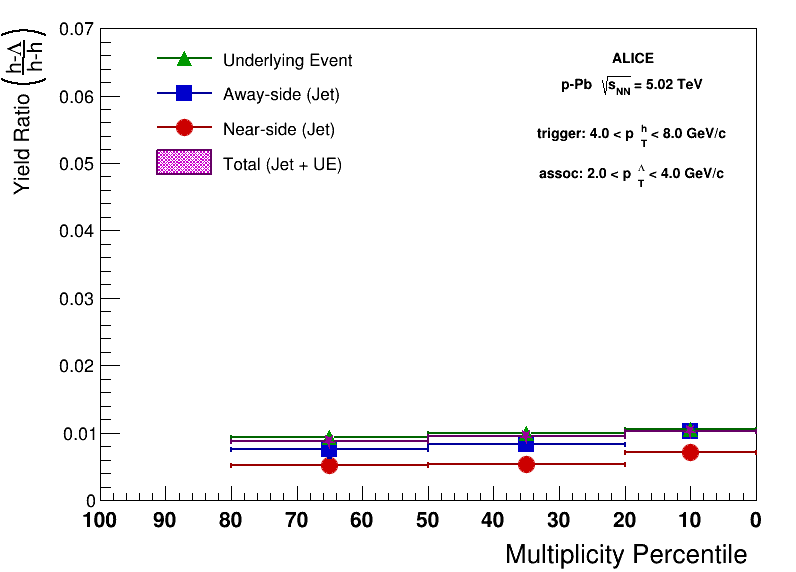

In [710]:
c.SetMargin(0.126, 0.05, 0.125, 0.05)
near_ratio_hist.Draw("PE")
near_ratio_hist.GetXaxis().SetLabelOffset(999)
near_ratio_hist.GetXaxis().SetTickSize(0)
rt.gPad.Update()
new_axis = rt.TGaxis(rt.gPad.GetUxmax(),
        rt.gPad.GetUymin(),
        rt.gPad.GetUxmin(),
        rt.gPad.GetUymin(),
        near_ratio_hist.GetXaxis().GetXmin(),
        near_ratio_hist.GetXaxis().GetXmax(),
        510,"-")
new_axis.SetLabelOffset(-0.03)
new_axis.Draw()
near_ratio_graph.Draw("P")
away_ratio_graph.Draw("P")
ue_ratio_graph.Draw("P")
total_ratio_graph.Draw("P")
ratios_legend.Draw()
pt_range_label.Draw()
alice_data_label.Draw()
c.Draw()

In [711]:

outfile = rt.TFile("v0_output.root", "RECREATE")
h_lambda_dphi_subtracted_0_20.Write()
h_lambda_dphi_subtracted_20_50.Write()
h_lambda_dphi_subtracted_50_80.Write()
h_h_dphi_0_20.Write()
h_h_dphi_20_50.Write()
h_h_dphi_50_80.Write()

1105